In [1]:
# Basic Libraries
import numpy as np
import random
import datetime
import pandas as pd
import scipy.stats as stats
# Visulization Libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px

# preprocessing and Model biulding Libraries
from numpy import sort
from pandas import set_option
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.impute import SimpleImputer
from matplotlib.cbook import boxplot_stats
from imblearn.over_sampling import SMOTE, RandomOverSampler, BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler
from mlxtend.plotting import plot_confusion_matrix
from collections import Counter
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from sklearn.feature_selection import VarianceThreshold, SelectFromModel
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, fbeta_score, make_scorer, recall_score  
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import cross_validate, cross_val_score, KFold, StratifiedKFold, RepeatedKFold, LeaveOneOut
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier,RadiusNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier 
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from xgboost import XGBClassifier
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv(r'D:/Case study/Data_cleaned.csv')

In [4]:
data.head()

sensor_0  sensor_1   sensor_2   sensor_3  sensor_4  sensor_8  sensor_9  \
0   3030.93   2564.00  2187.7333  1411.1265    1.3602    1.5005    0.0162   
1   3095.78   2465.14  2230.4222  1463.6606    0.8294    1.4966   -0.0005   
2   2932.61   2559.94  2186.4111  1698.0172    1.5102    1.4436    0.0041   
3   2988.72   2479.90  2199.0333   909.7926    1.3204    1.4882   -0.0124   
4   3032.24   2502.87  2233.3667  1326.5200    1.5334    1.5031   -0.0031   

   sensor_10  sensor_11  sensor_14  ...  sensor_570  sensor_571  sensor_572  \
0    -0.0034     0.9455     7.9558  ...    533.8500      2.1113        8.95   
1    -0.0148     0.9627    10.1548  ...    535.0164      2.4335        5.92   
2     0.0013     0.9615     9.5157  ...    535.0245      2.0293       11.21   
3    -0.0033     0.9629     9.6052  ...    530.5682      2.0253        9.33   
4    -0.0072     0.9569    10.5661  ...    532.0155      2.0275        8.83   

   sensor_578  sensor_582  sensor_583  sensor_586  sensor_587  sensor_589  \
0      0.0000      0.5005      0.0118      0.0000      0.0000      0.0000   
1      0.0096      0.5019      0.0223      0.0096      0.0201    208.2045   
2      0.0584      0.4958      0.0157      0.0584      0.0484     82.8602   
3      0.0202      0.4990      0.0103      0.0202      0.0149     73.8432   
4      0.0000      0.4800      0.4766      0.0202      0.0149     73.8432   

   Pass_Fail  
0          1  
1          1  
2          0  
3          1  
4          1  

[5 rows x 195 columns]

# Feature Enginnering:
  Here, What we are doing we will check for the,
  1. Feature Transformations:

      **a. Missing Values and Imputaion :** We have take care of it while doing EDA it self.

      **b. Outlier Detection:** We have seen that there are lot of outliers is the columns according to the techniques we have employed. So , its questionable if they have all these outliers. We will perform model buiding with these outliers in the data . Then we will see if we want to remove it or not. 
       
       **c. Feature Scalling :** We have seen that alll the columns has different scales which will make difficult to learn efficintly. So we are employing feature scaling Min_MAX or Standard Scalar.

       **d: PCA for Feature Selection:**. We will redicing the no of features which are having low variance **Write Something Better***

       **e: Applying Tranformers to check the normality:** 
       Homoscadascicity
       For linear models it requires features to behave like normal.

    


  

# 1. Scalling of features:

  **1.1 : Before Normilization: Experiemnt 1:**

In [5]:
sensor=data.iloc[:,0:194]
#sensor.head()
y=data["Pass_Fail"]
col=list(sensor.columns)

In [6]:
#sensor.plot(kind='kde', subplots=True,layout=(52,5), fontsize=10, figsize=(15,150));


<Axes: xlabel='sensor_21', ylabel='Density'>

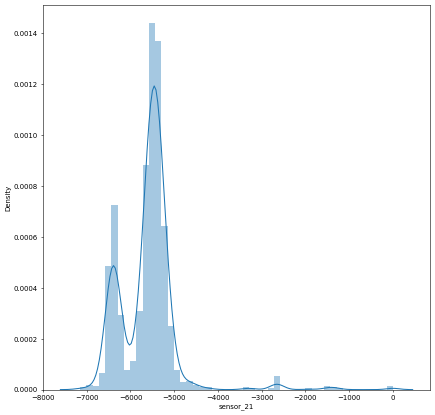

In [7]:
#checking for distribution of a single feature for understanding
plt.figure(figsize=(10,10),dpi=50)
sns.distplot(sensor['sensor_21'])

**Remark 0 :** 
1. features are with distict scales and distrubutions present in data.
2. Skewness is also high in most of the features.

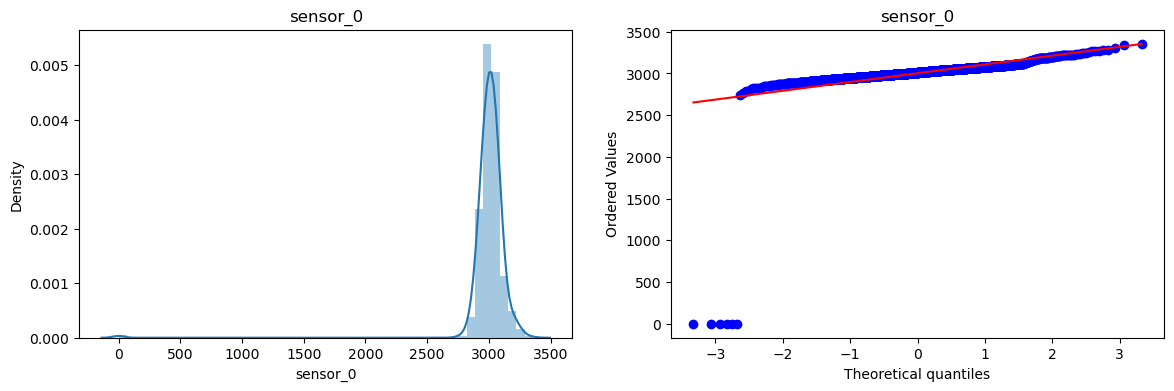

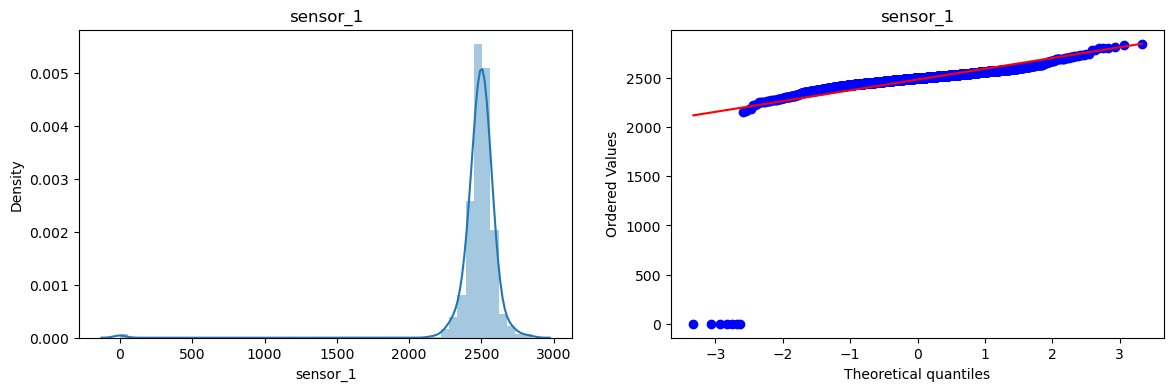

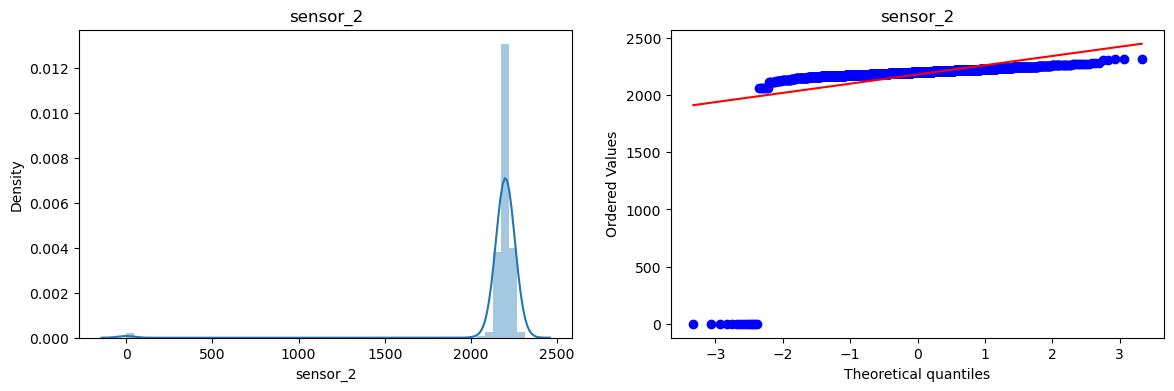

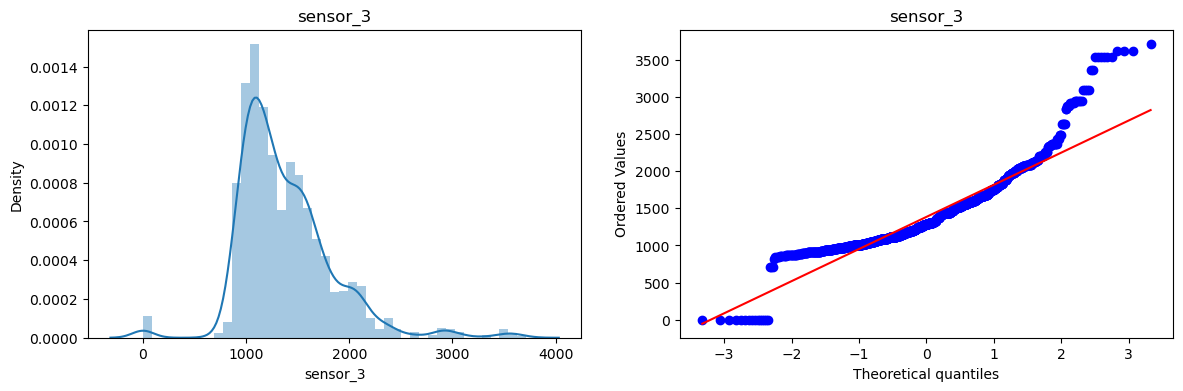

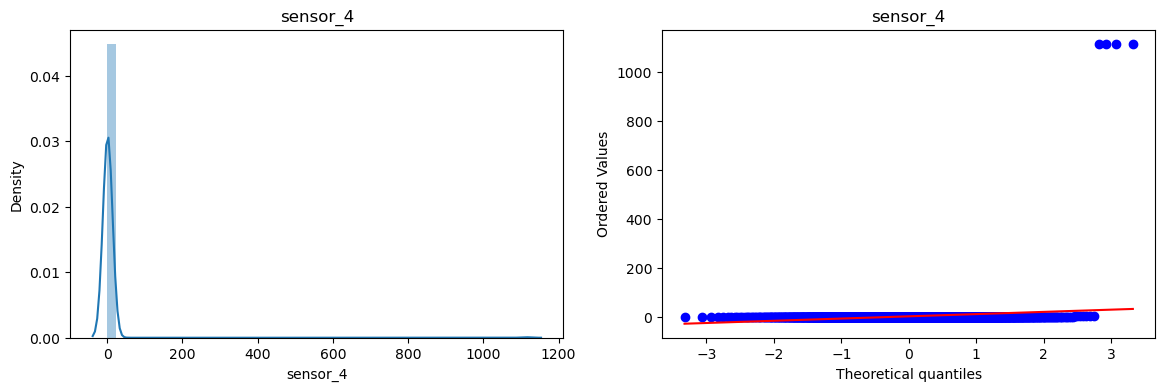

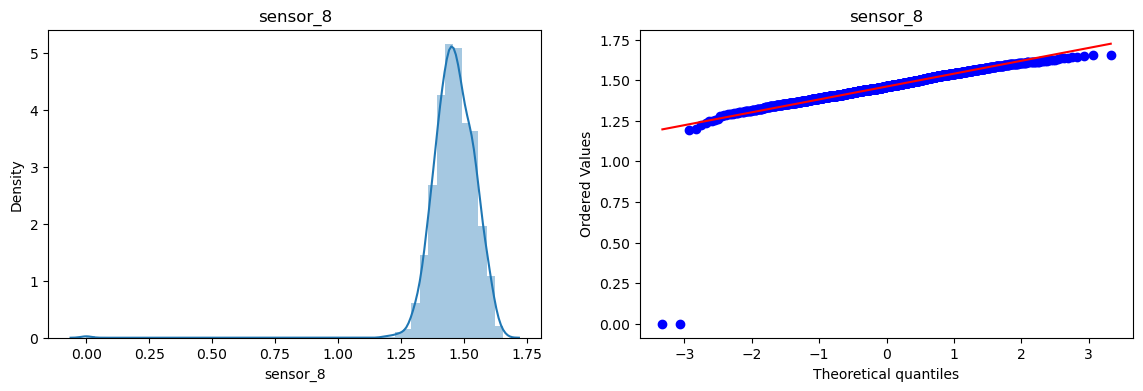

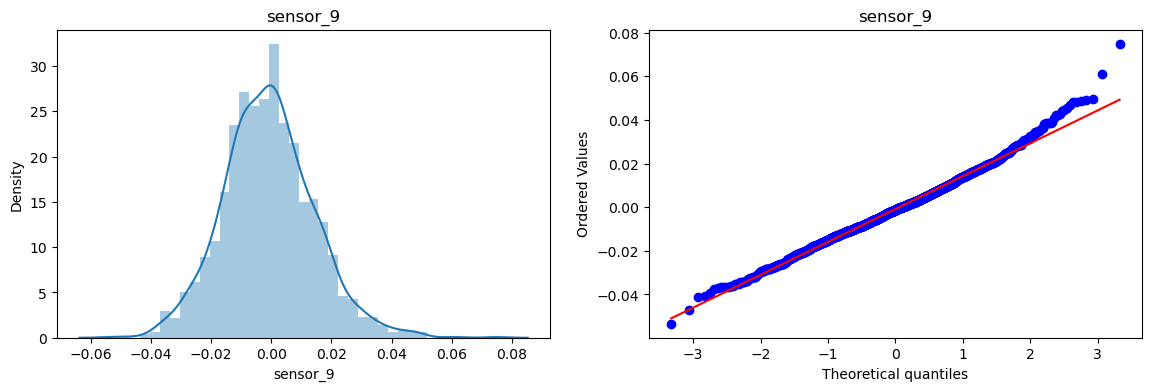

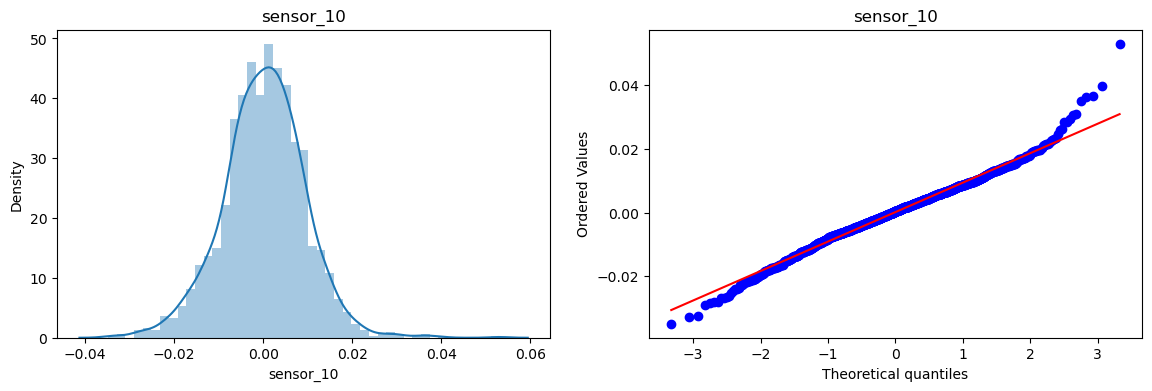

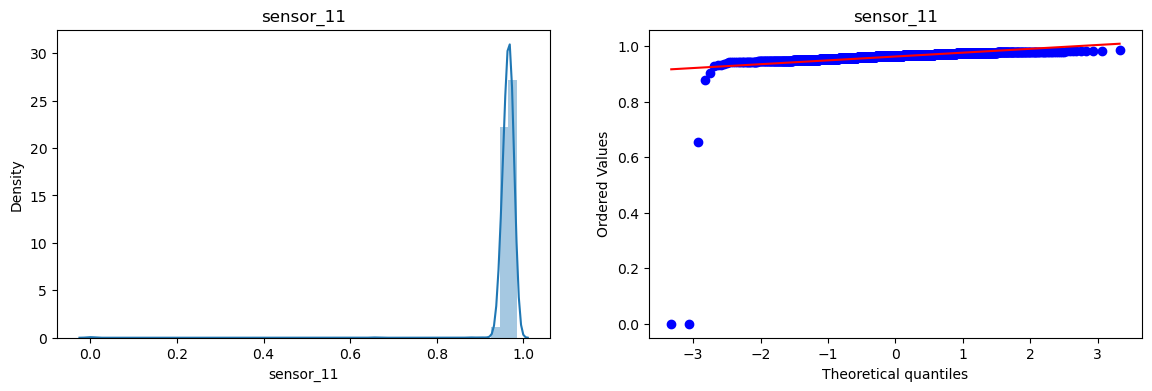

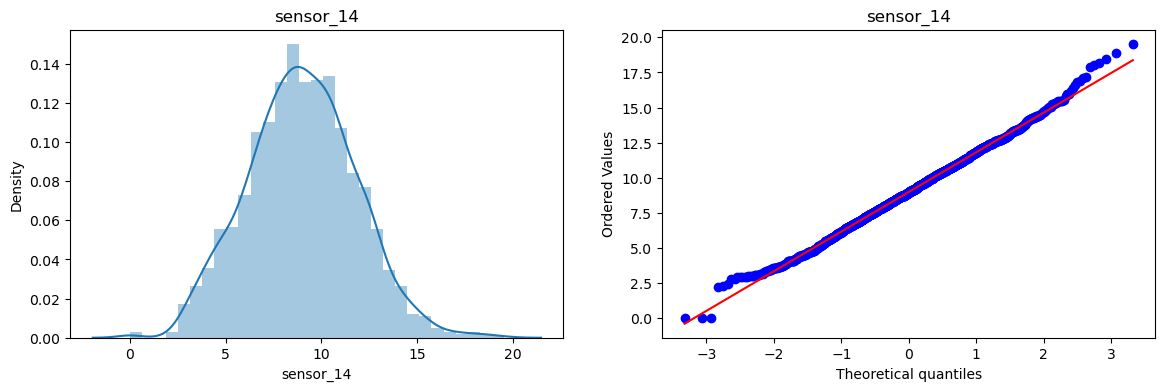

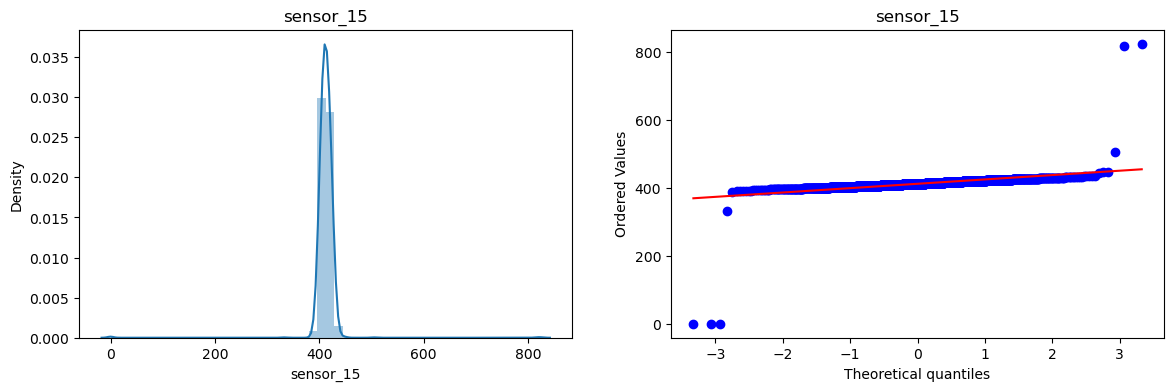

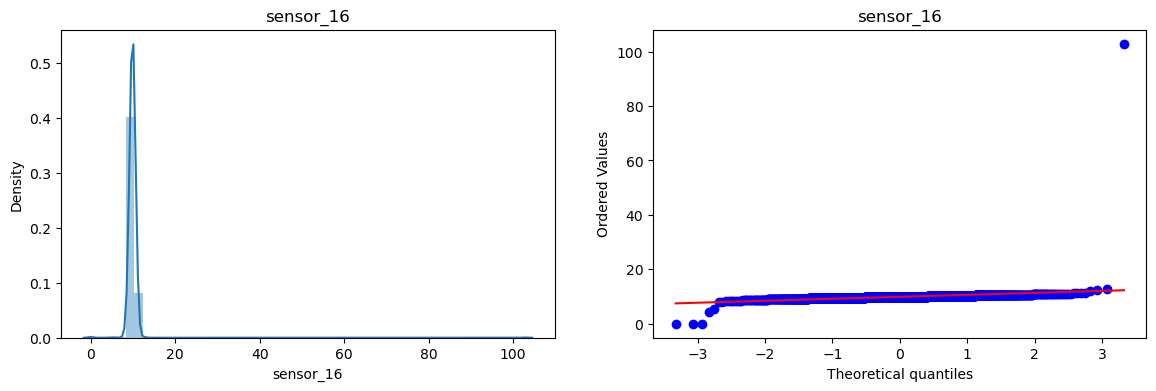

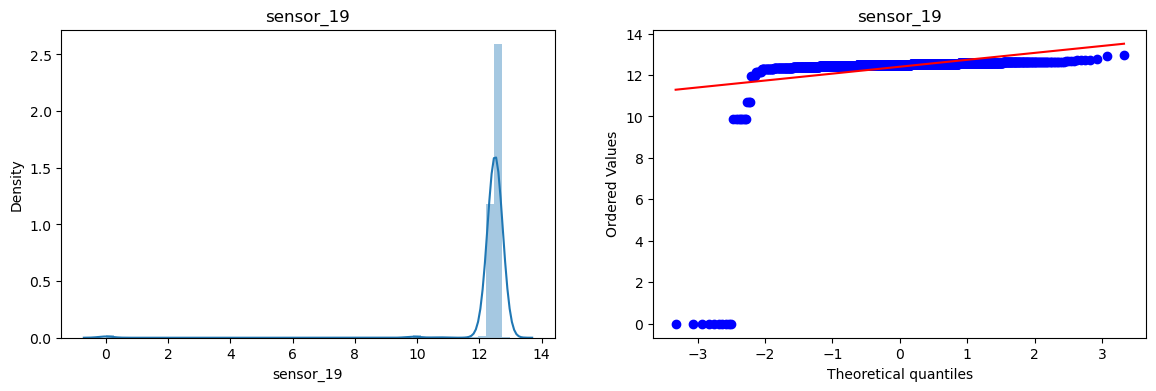

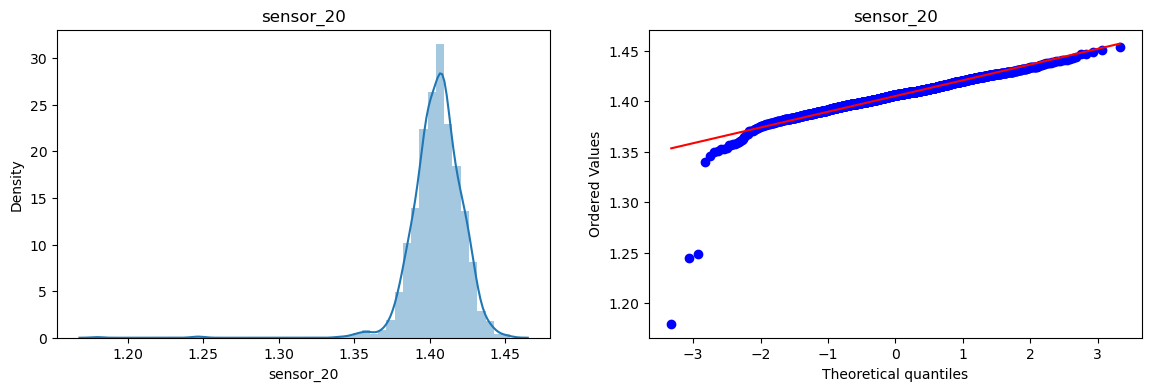

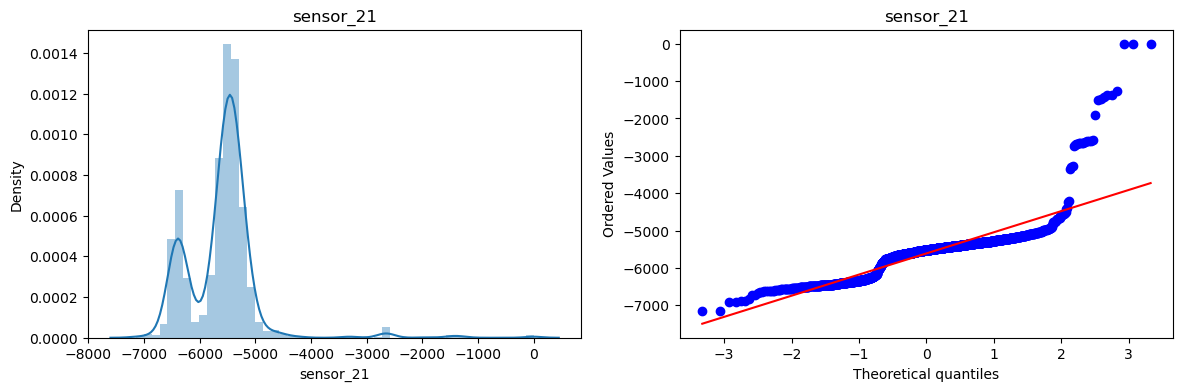

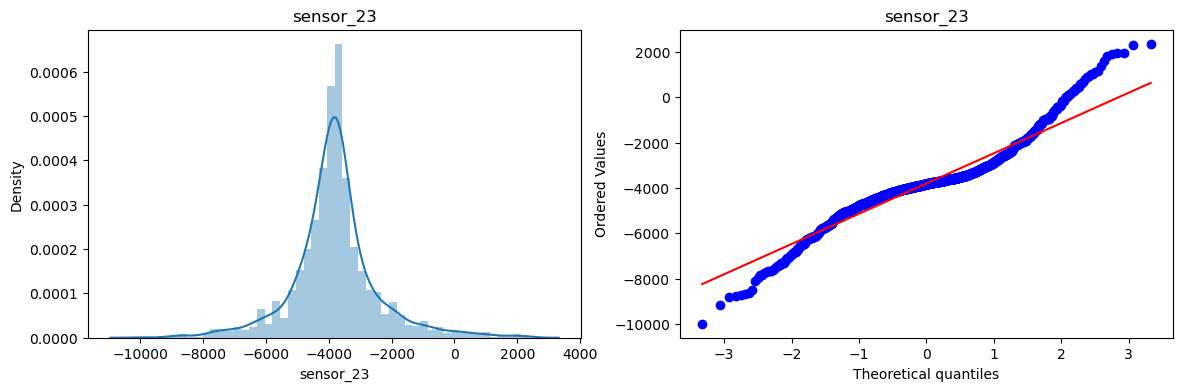

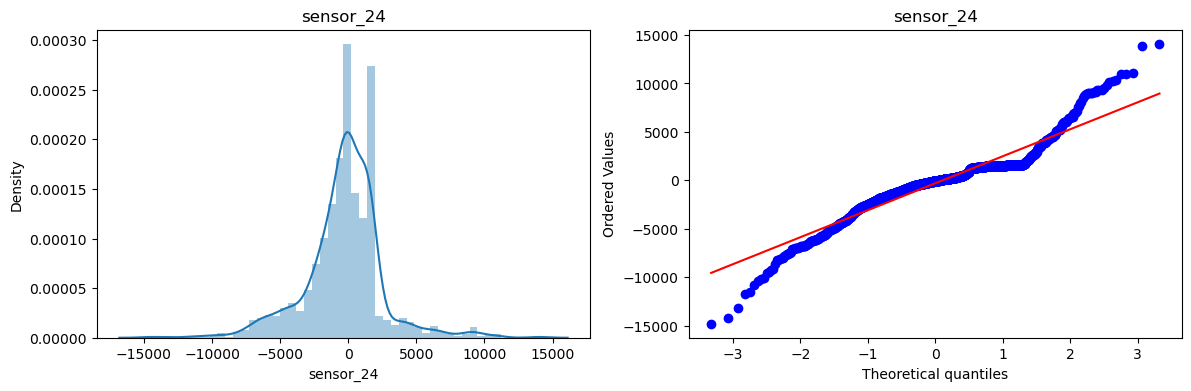

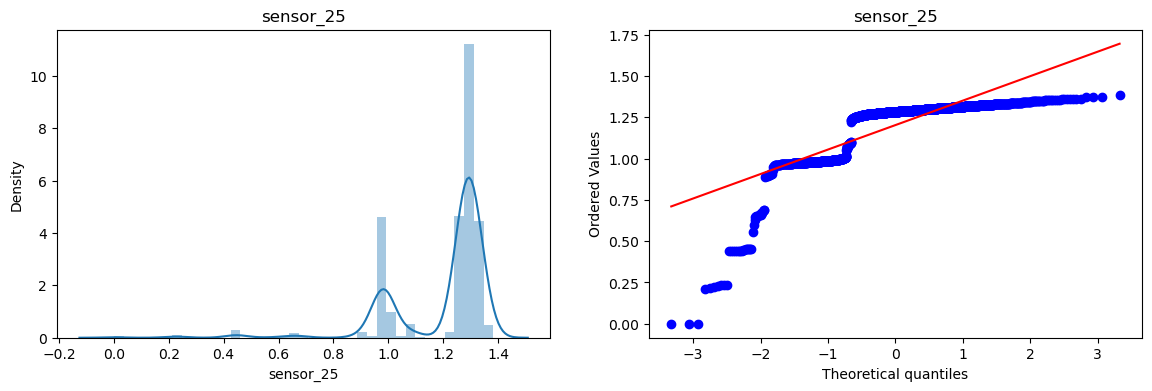

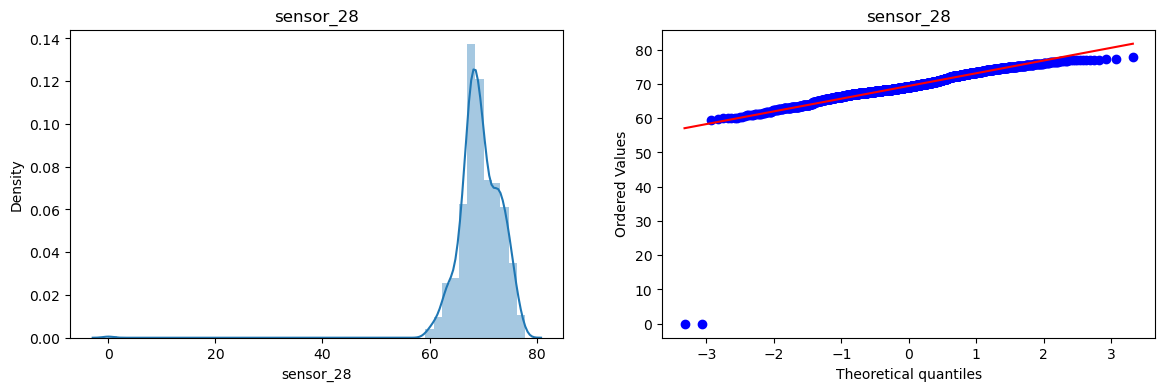

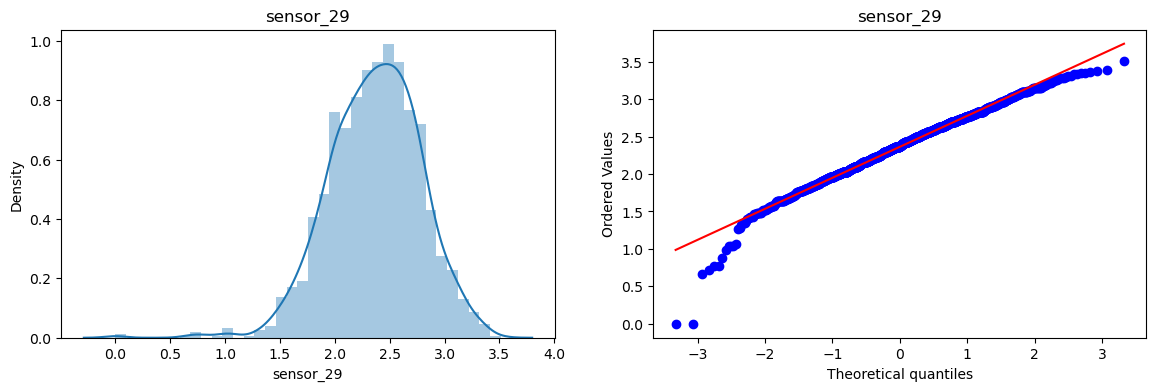

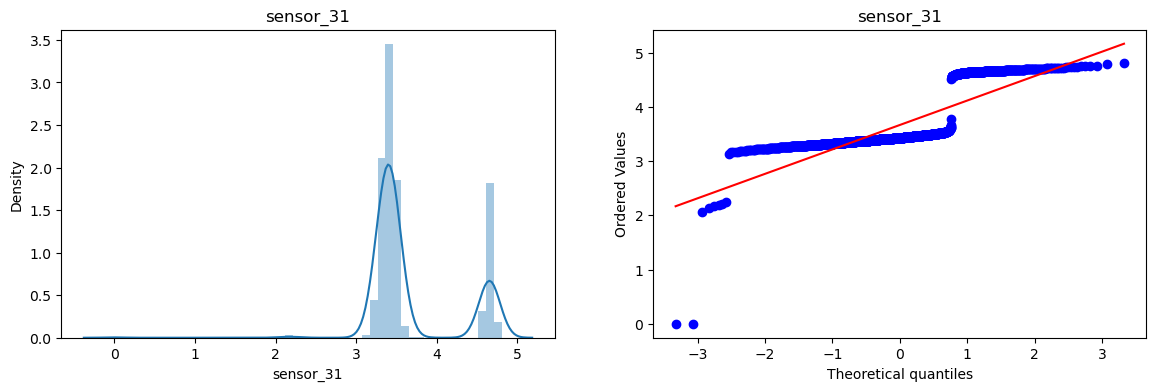

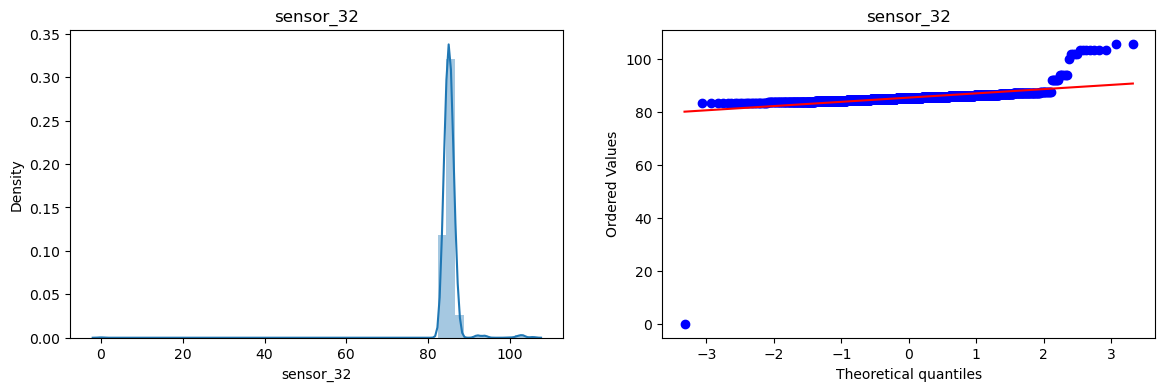

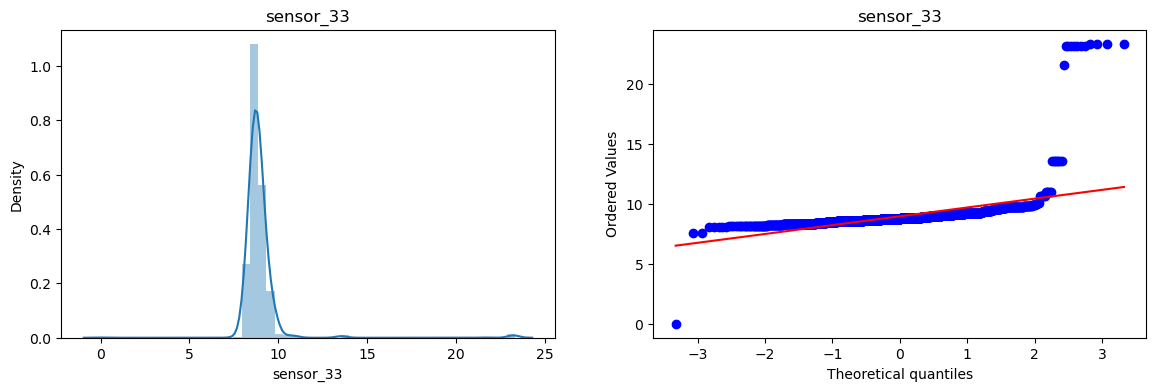

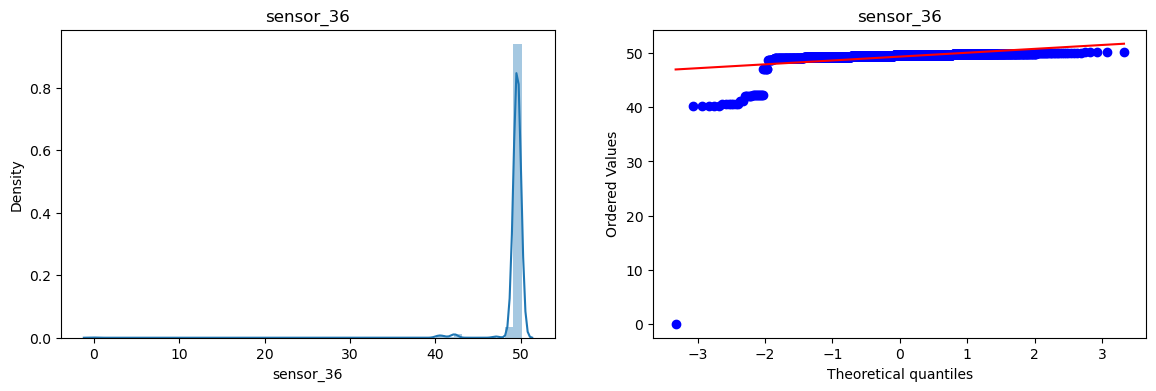

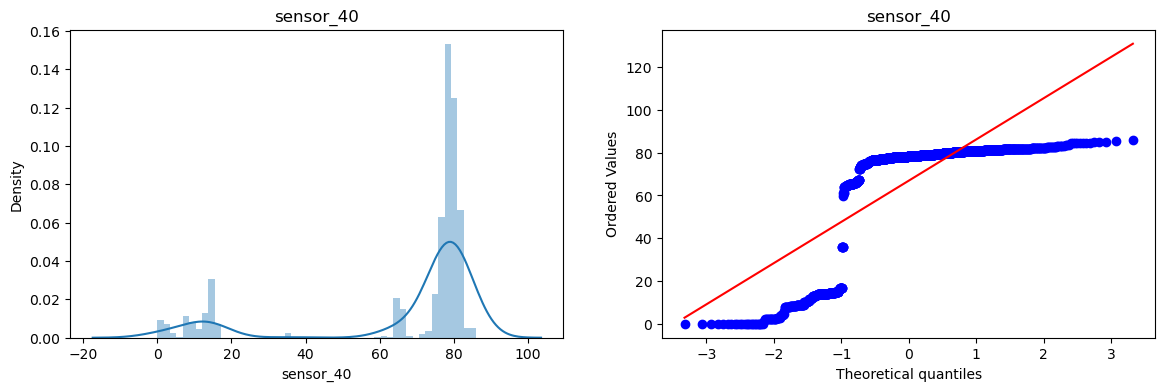

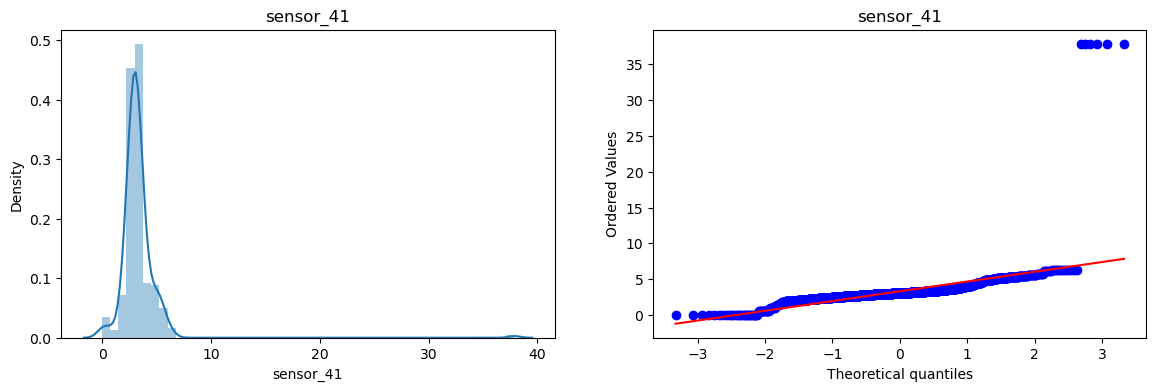

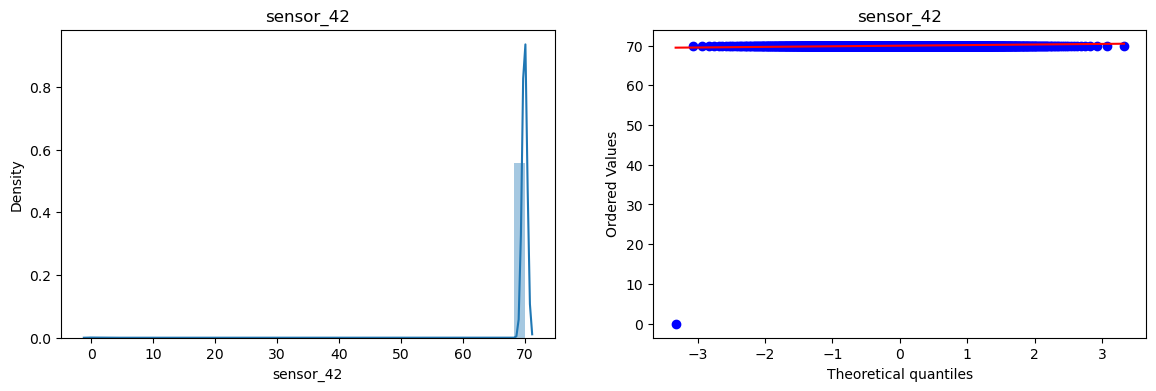

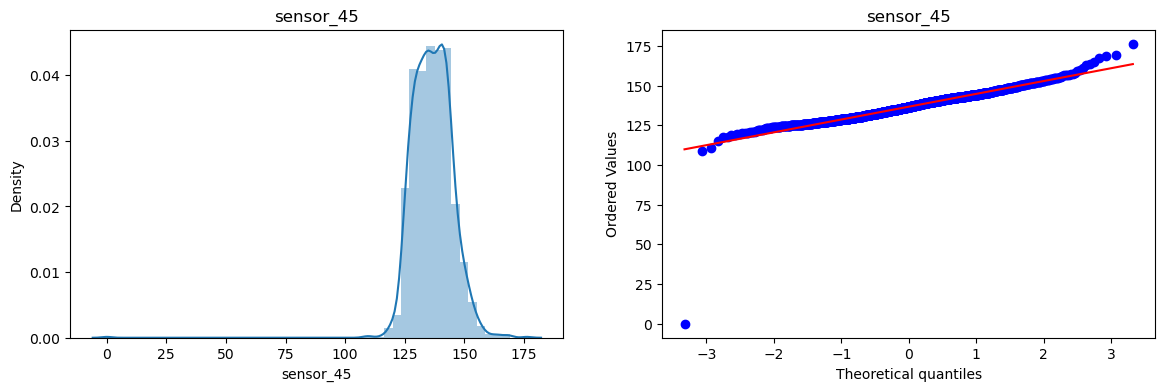

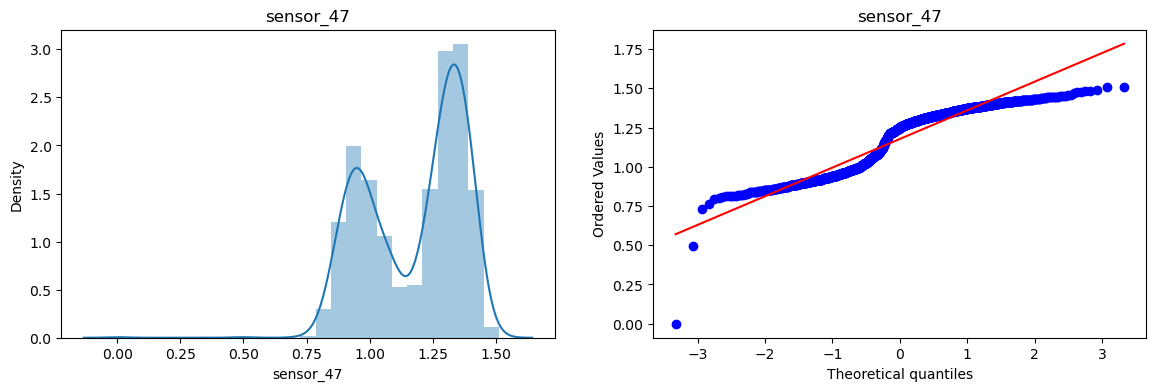

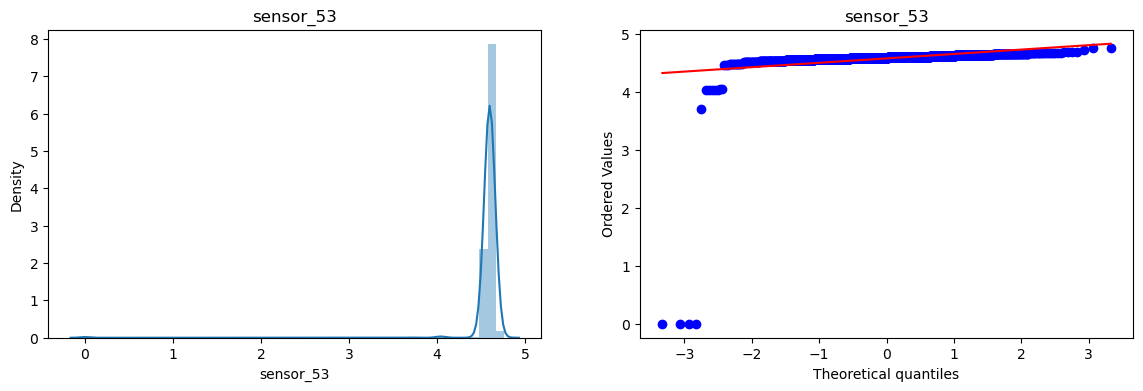

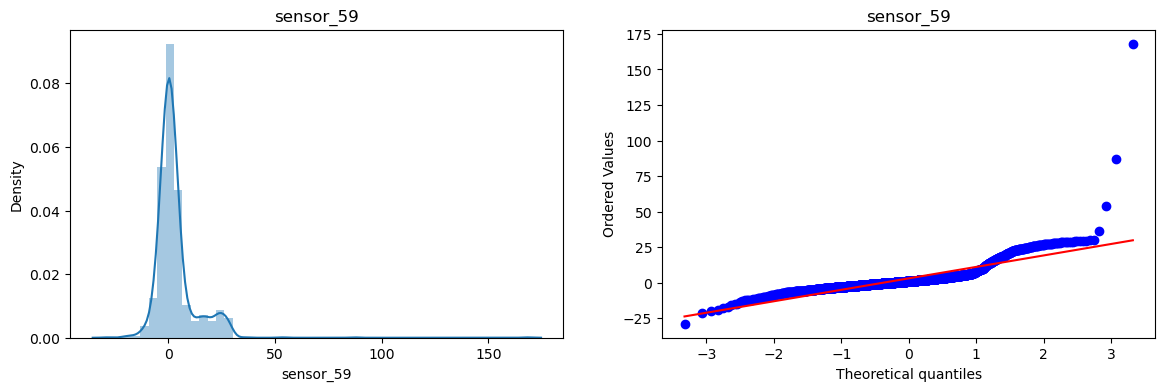

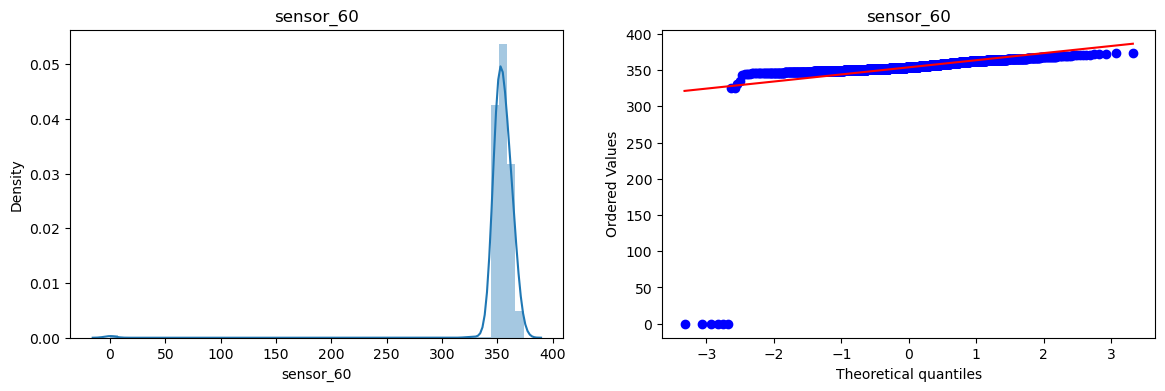

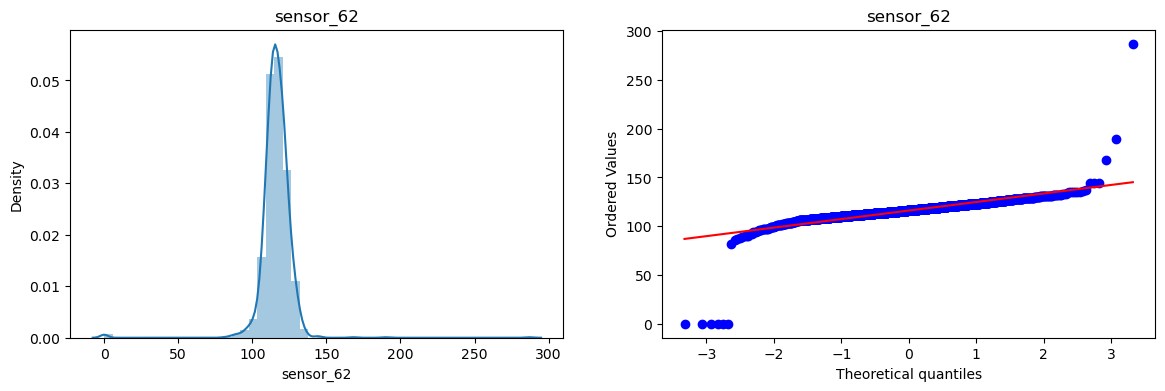

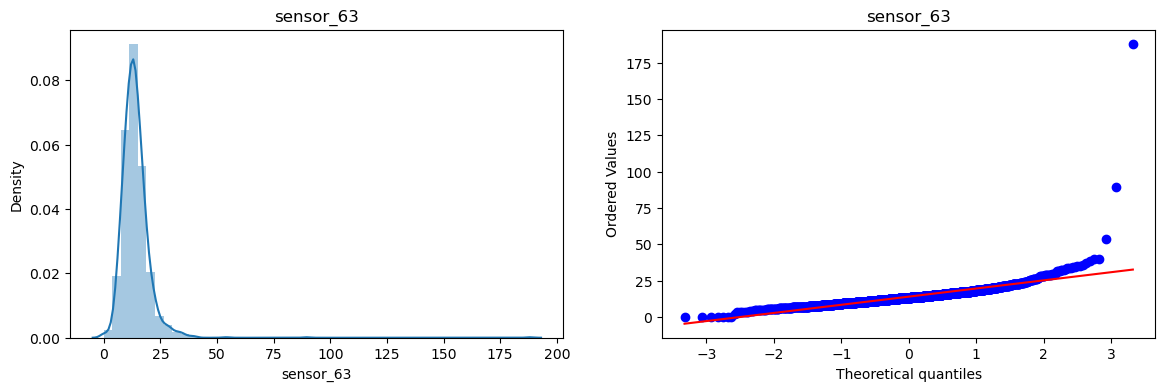

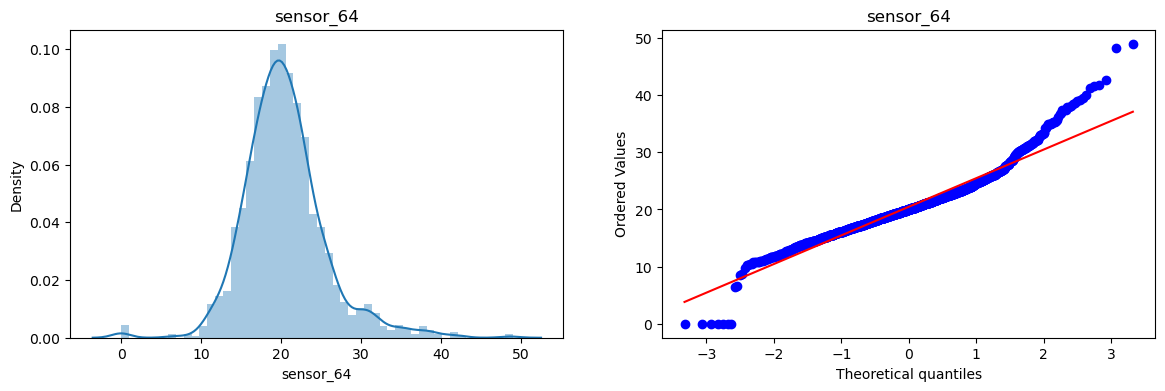

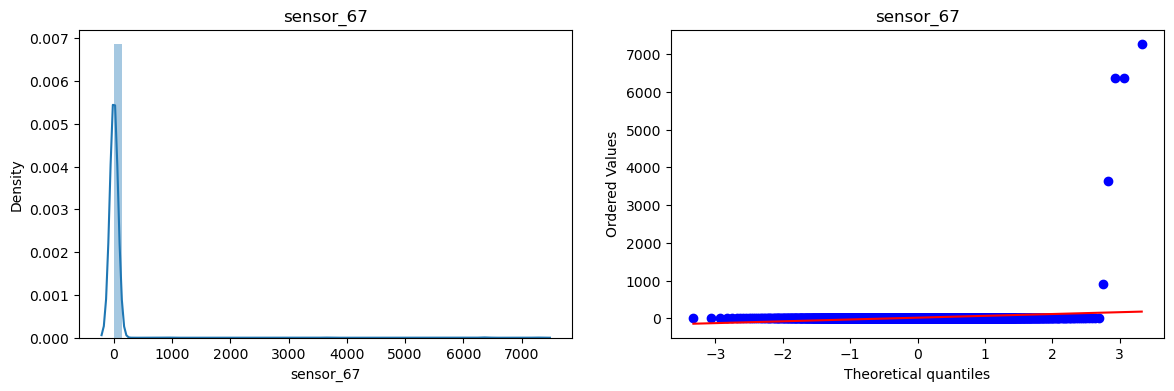

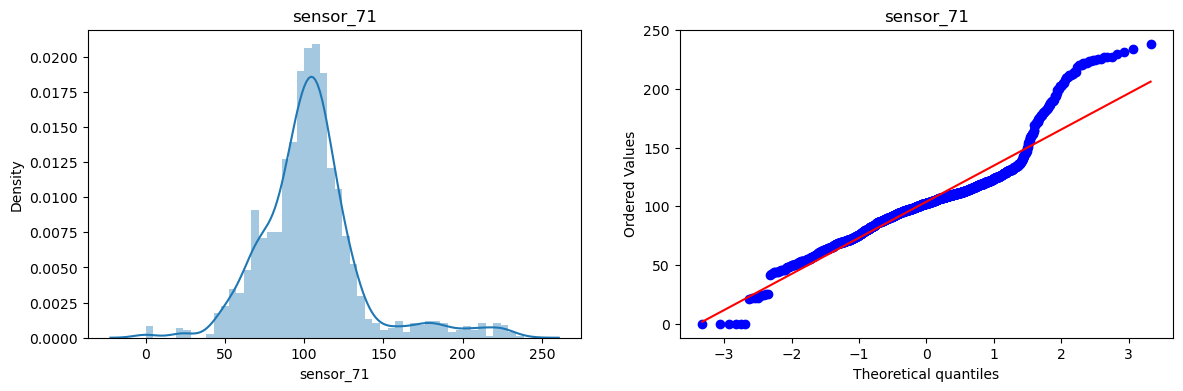

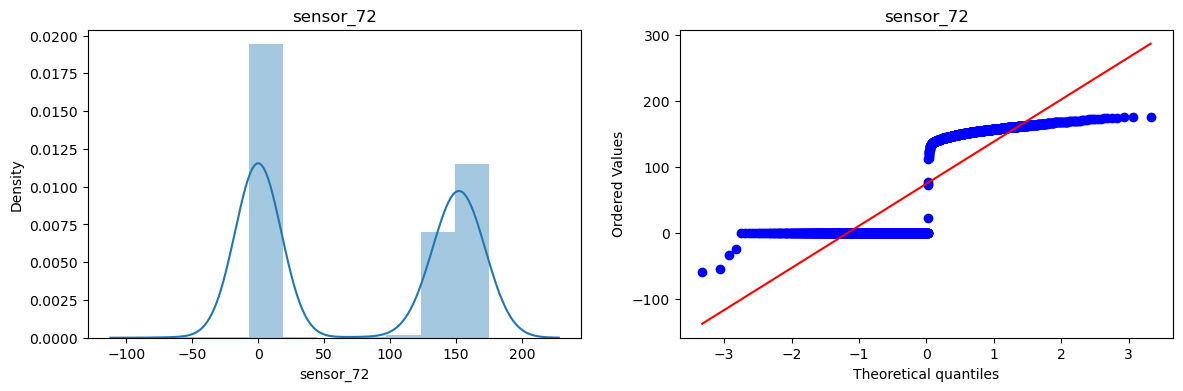

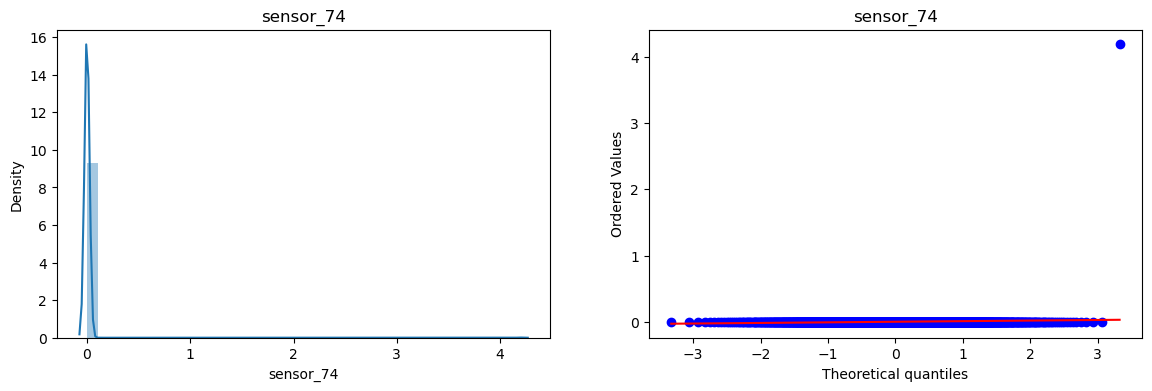

In [8]:
# Plotting the distributions of sample original fetures before normilization and checking for normality:

count=0
for col in sensor.columns:
    count=count +1
    if count < 40:
      plt.figure(figsize=(14,4))
      plt.subplot(121)
      sns.distplot(sensor[col])
      plt.title(col)

      plt.subplot(122)
      stats.probplot(sensor[col], dist="norm", plot=plt)
      plt.title(col)

      plt.show()

**Remark: 1**
 After plotting sample of original featuures we can clearly see that.
 1. Most of the features are highly right and left skewed.
 2. Some feature posses Bimodal distrubutions.
 3. Most of the features are looks like normally distributed but with high no of outliers.
 4. Some features with missing values we have treated by filling them with 'Zeroes' While doing EDA. These zero value dominating features are surelly not distributtes as normal. As we can sse from QQ plots.
 

**1.2 After Min_Max Normilizing:**

Min Max Scalar : We know that we have lot of different distrubutions and not normal distruibution in features. So first we will do min-Max feature.


In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(sensor)
df_norm=scaler.transform(sensor)
df_norm= pd.DataFrame(df_norm,columns=sensor.columns)

In [10]:
df_norm.head()

sensor_0  sensor_1  sensor_2  sensor_3  sensor_4  sensor_8  sensor_9  \
0  0.903043  0.900774  0.944916  0.379841  0.001220  0.905880  0.542479   
1  0.922365  0.866043  0.963354  0.393982  0.000744  0.903526  0.412315   
2  0.873750  0.899348  0.944345  0.457065  0.001355  0.871529  0.448168   
3  0.890467  0.871229  0.949797  0.244894  0.001185  0.898454  0.319564   
4  0.903434  0.879298  0.964626  0.357067  0.001376  0.907450  0.392050   

   sensor_10  sensor_11  sensor_14  ...  sensor_565  sensor_570  sensor_571  \
0   0.358362   0.960093   0.407019  ...    0.000000    0.795609    0.642926   
1   0.228669   0.977559   0.519520  ...    0.000000    0.799892    0.826067   
2   0.411832   0.976340   0.486824  ...    0.902351    0.799922    0.596317   
3   0.359499   0.977762   0.491403  ...    0.236506    0.783557    0.594043   
4   0.315131   0.971669   0.540562  ...    0.000000    0.788872    0.595294   

   sensor_572  sensor_578  sensor_582  sensor_583  sensor_586  sensor_587  \
0    0.011995    0.141186    0.981758    0.024759    0.141186    0.000000   
1    0.005277    0.221387    0.984504    0.046790    0.221387    0.251564   
2    0.017006    0.629073    0.972538    0.032942    0.629073    0.605757   
3    0.012838    0.309942    0.978815    0.021611    0.309942    0.186483   
4    0.011729    0.141186    0.941546    1.000000    0.309942    0.186483   

   sensor_589  
0    0.000000  
1    0.282386  
2    0.112383  
3    0.100153  
4    0.100153  

[5 rows x 194 columns]

In [11]:
#df_norm.plot(kind='kde', subplots=True,layout=(52,5), fontsize=10, figsize=(15,150));

Text(0.5, 1.0, 'After Min_Max Transformation')

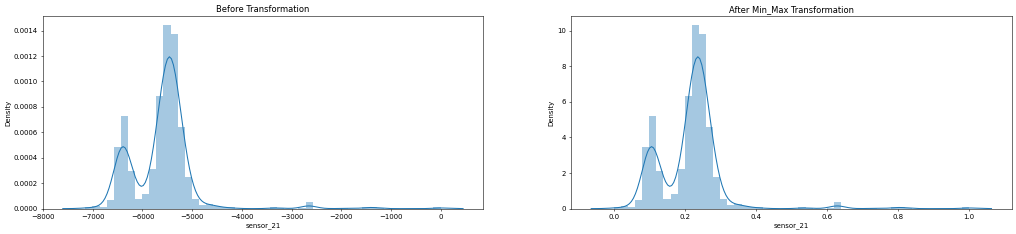

In [12]:
plt.figure(figsize=(25,5),dpi=50)
plt.subplot(121)
sns.distplot(sensor['sensor_21'])
plt.title('Before Transformation')
plt.subplot(122)
sns.distplot(df_norm['sensor_21'])
plt.title('After Min_Max Transformation')

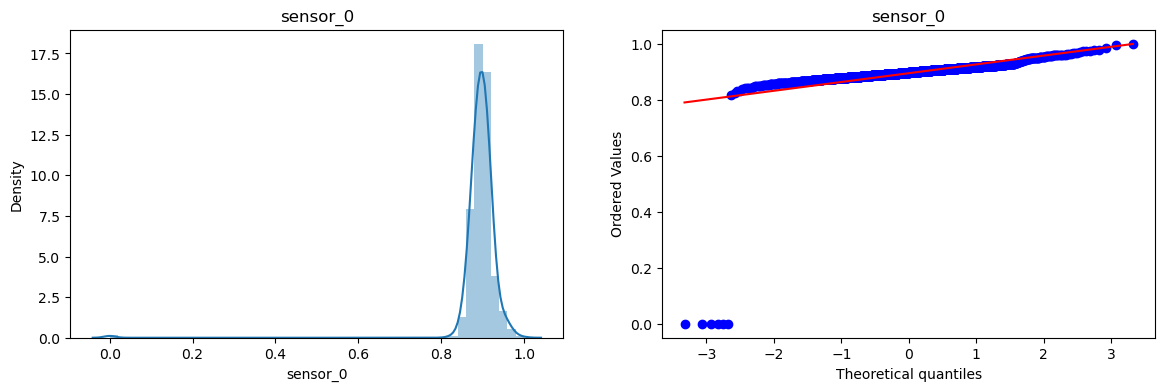

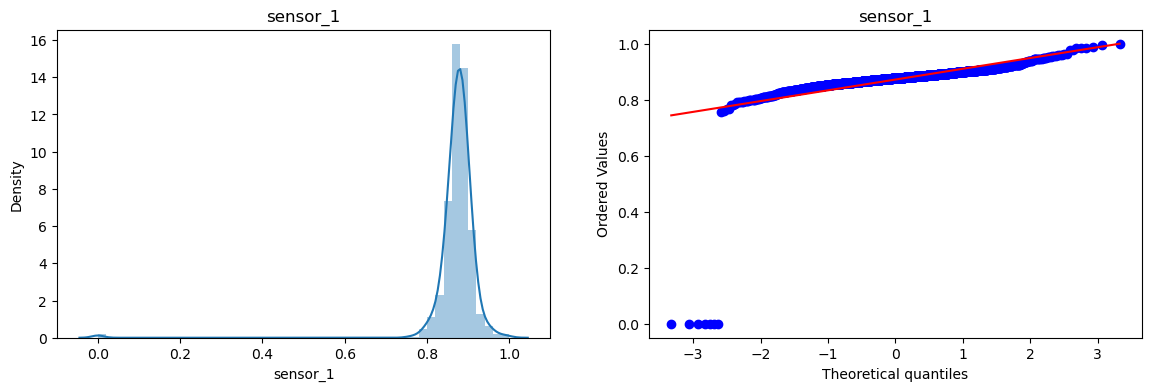

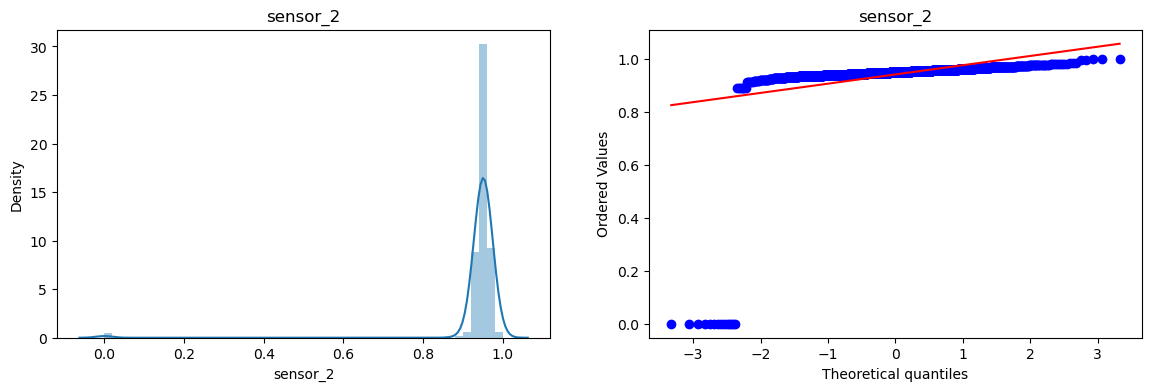

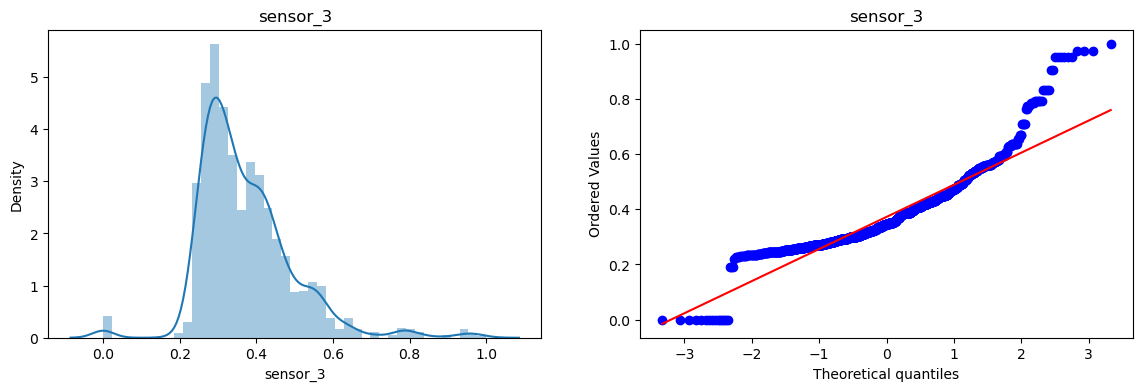

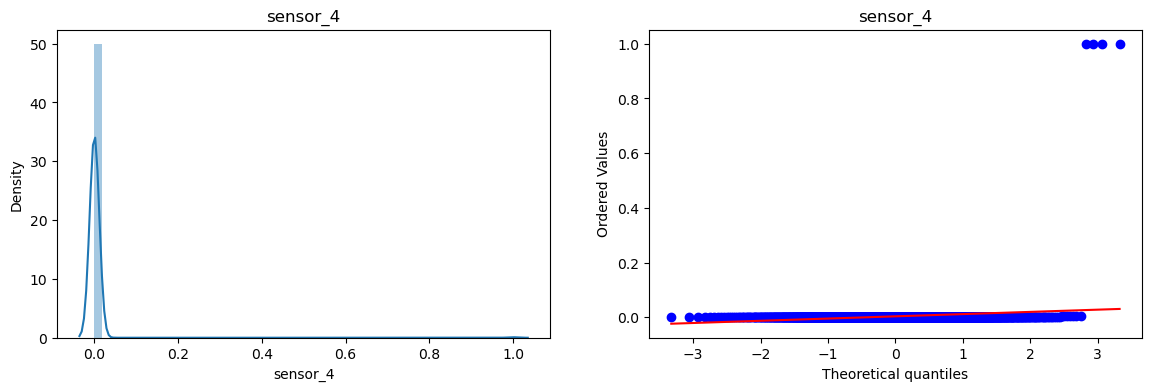

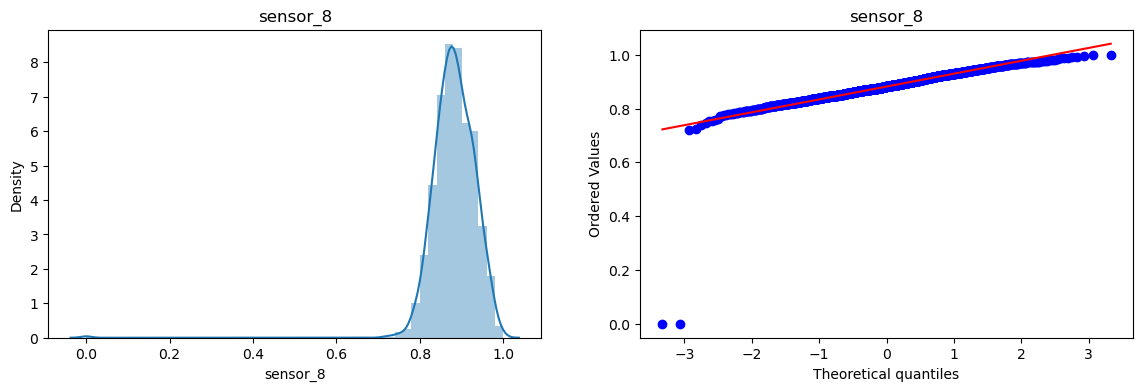

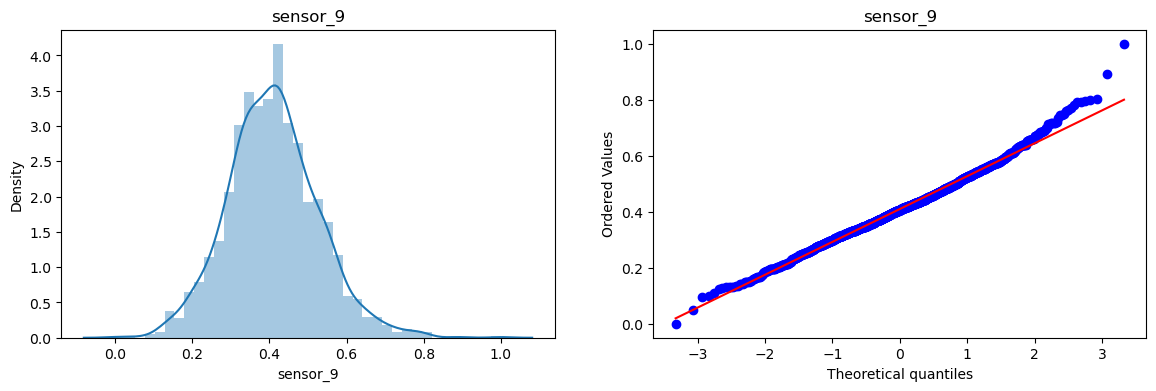

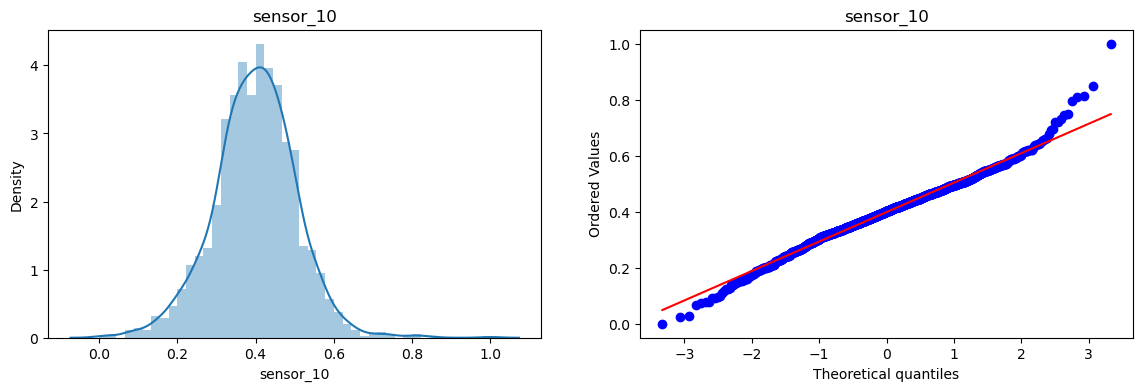

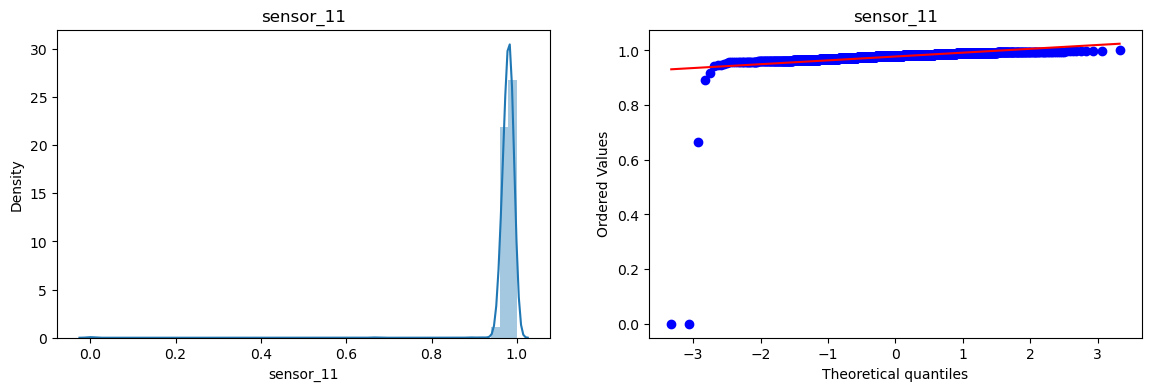

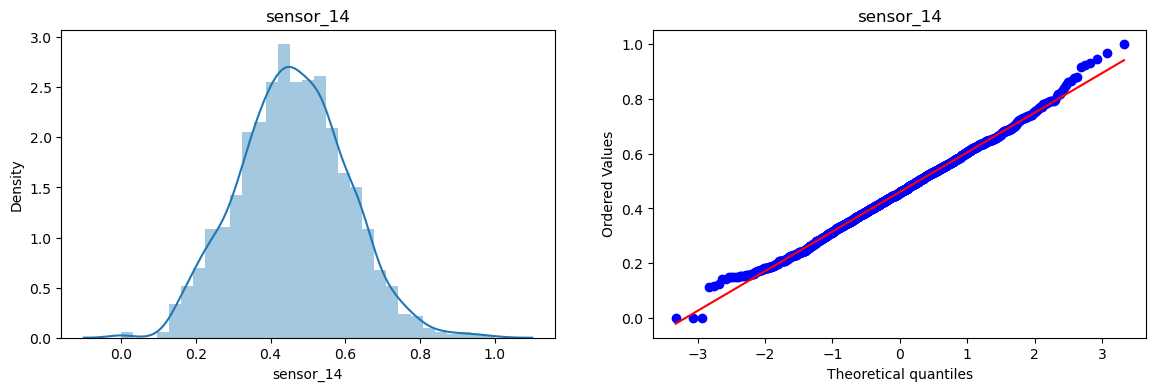

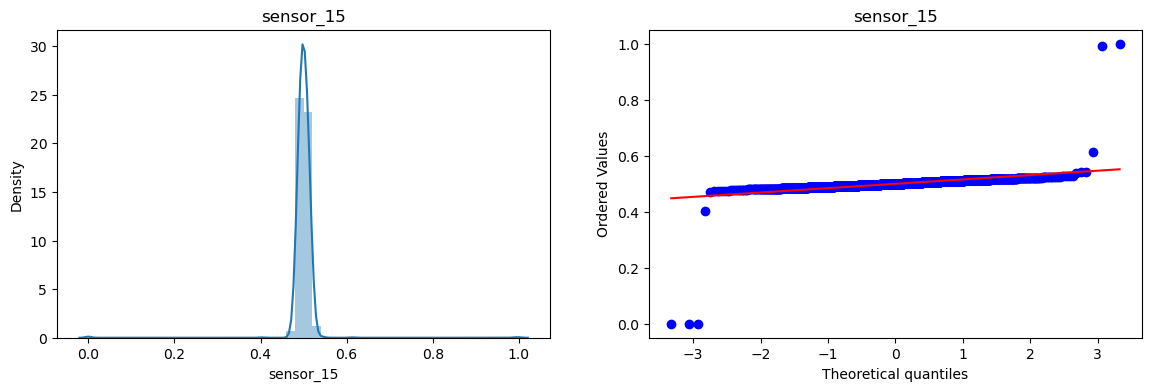

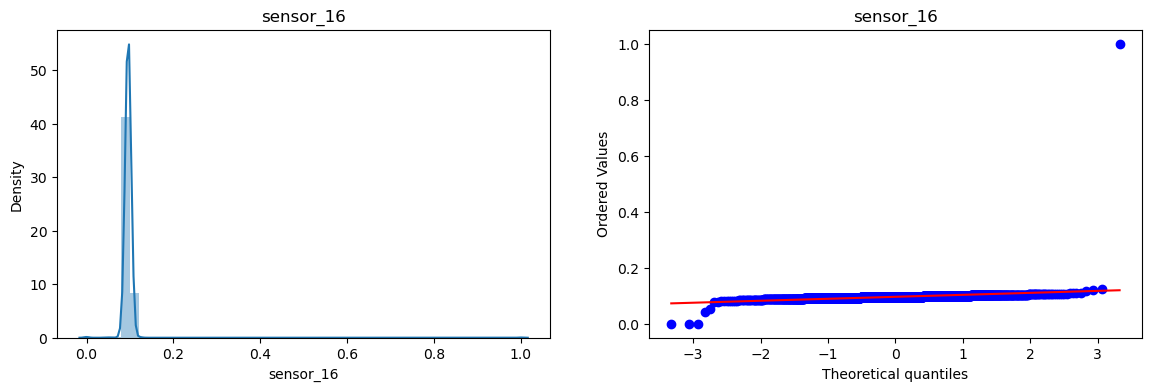

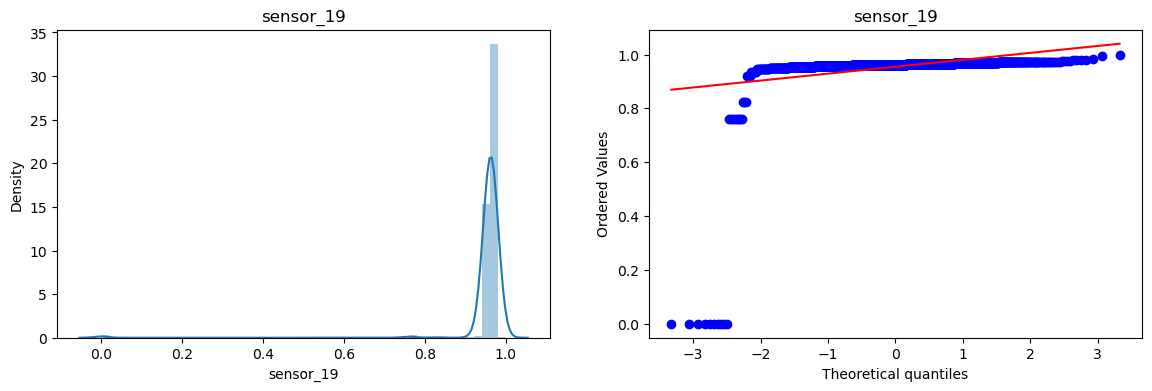

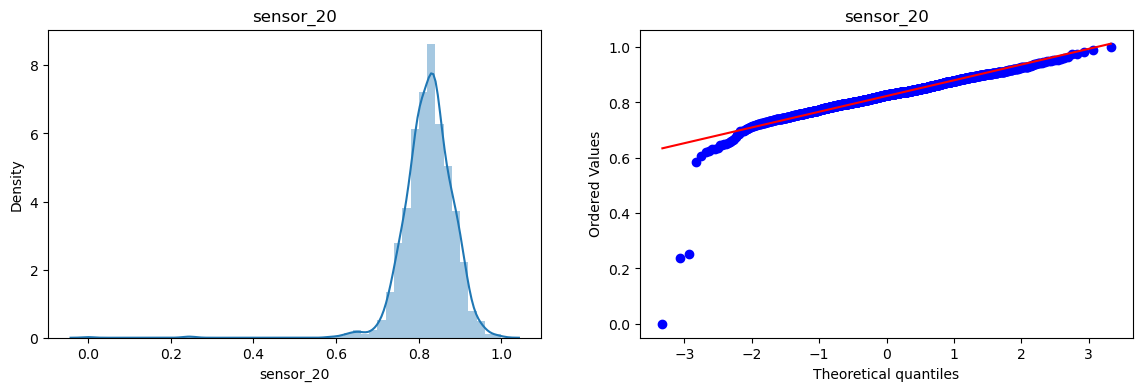

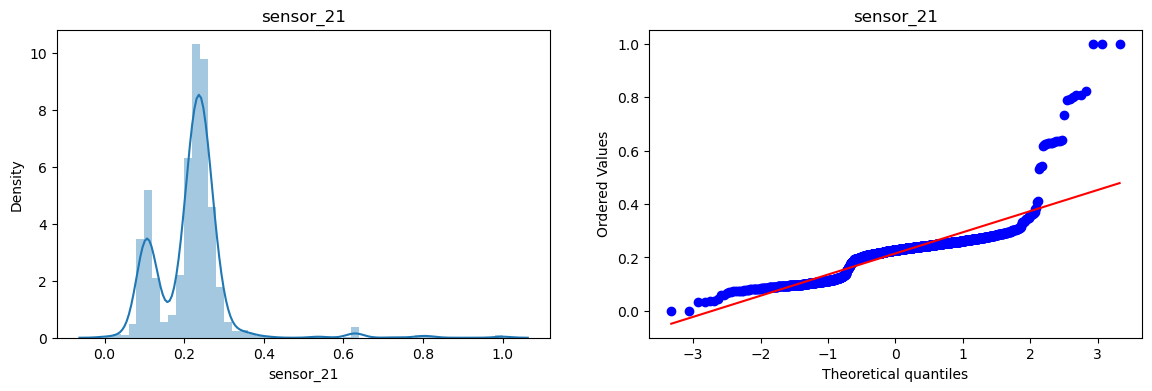

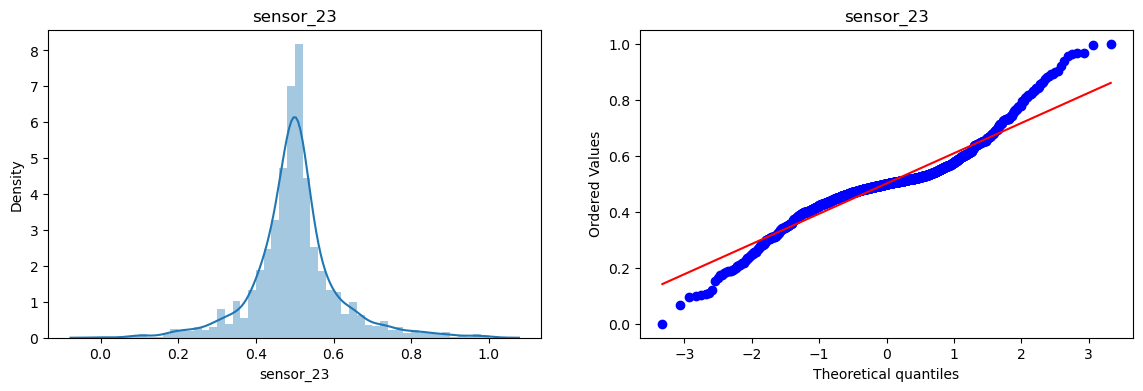

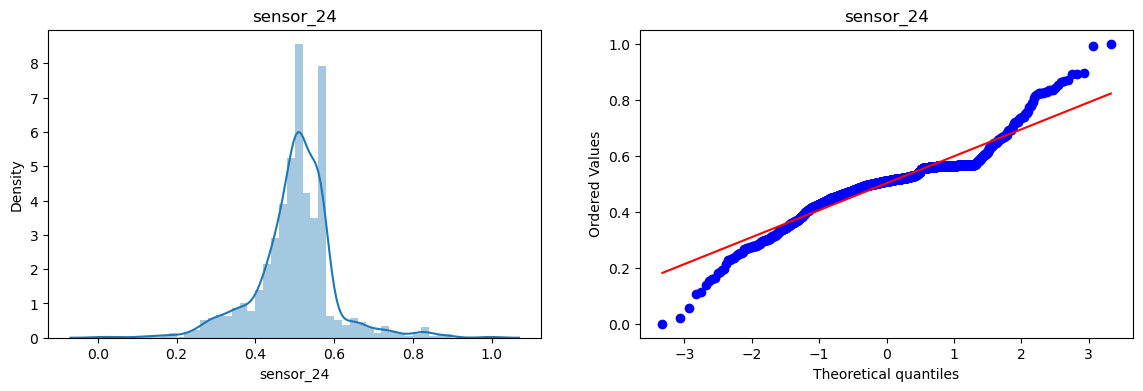

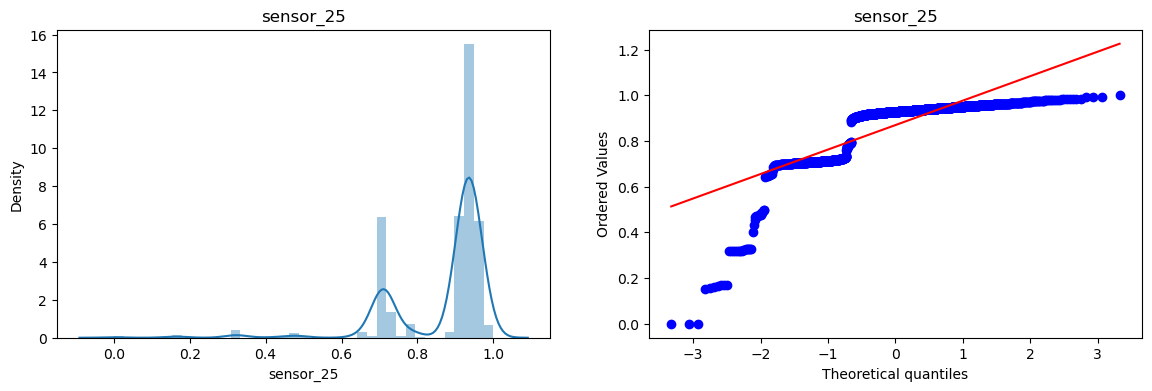

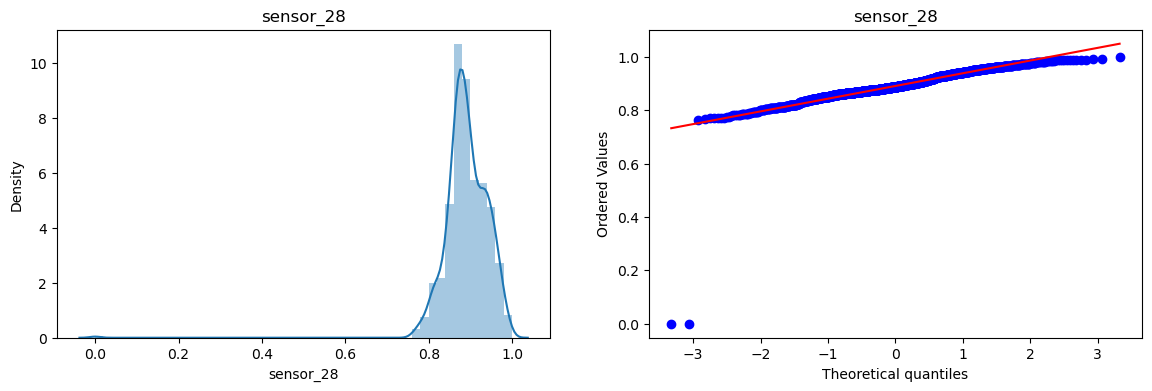

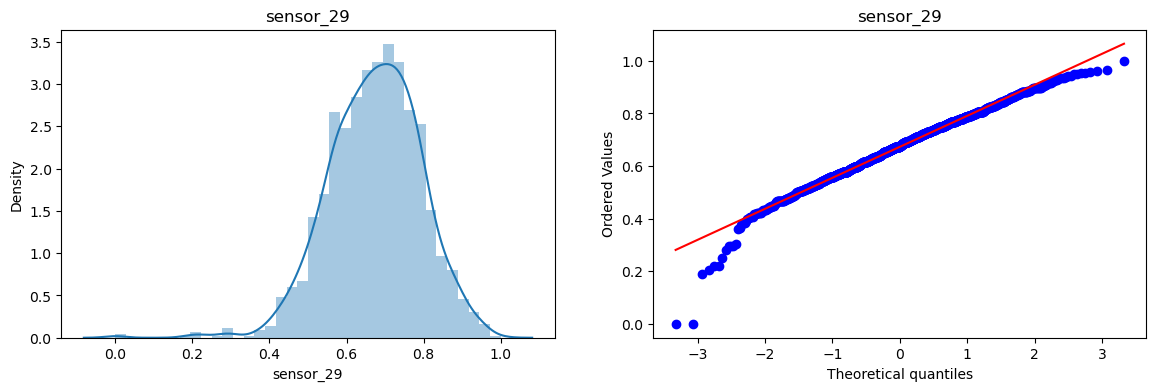

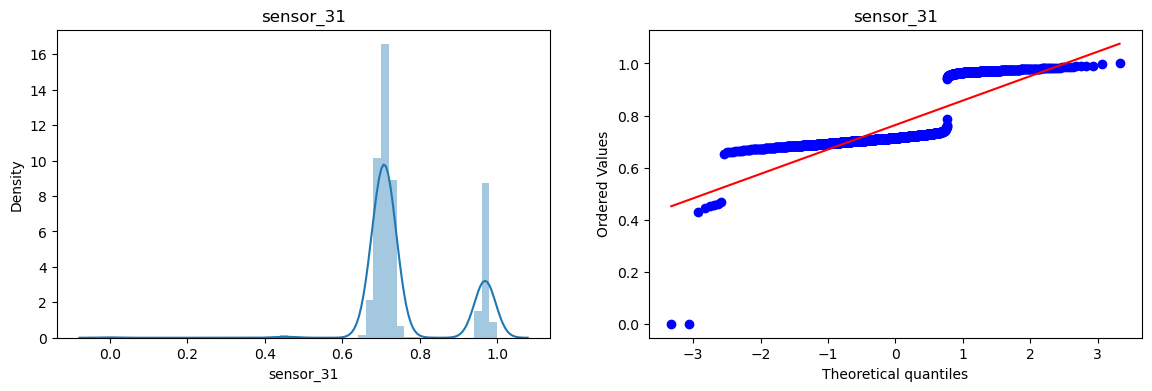

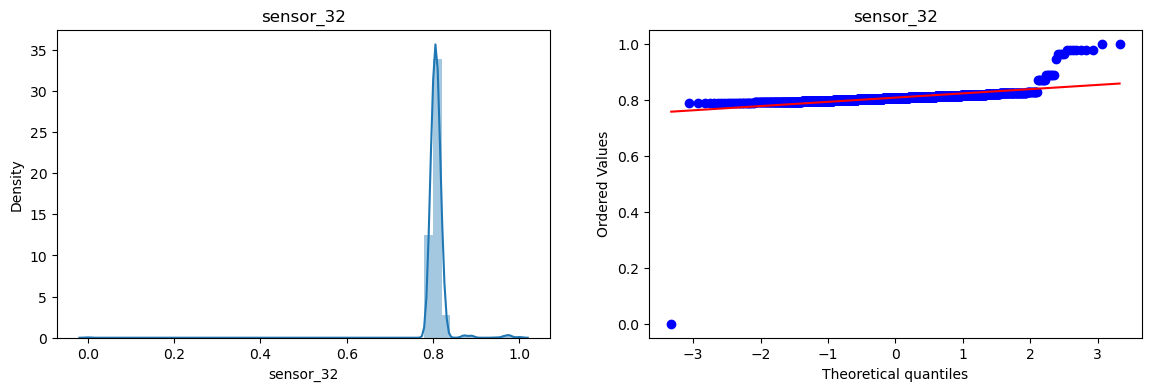

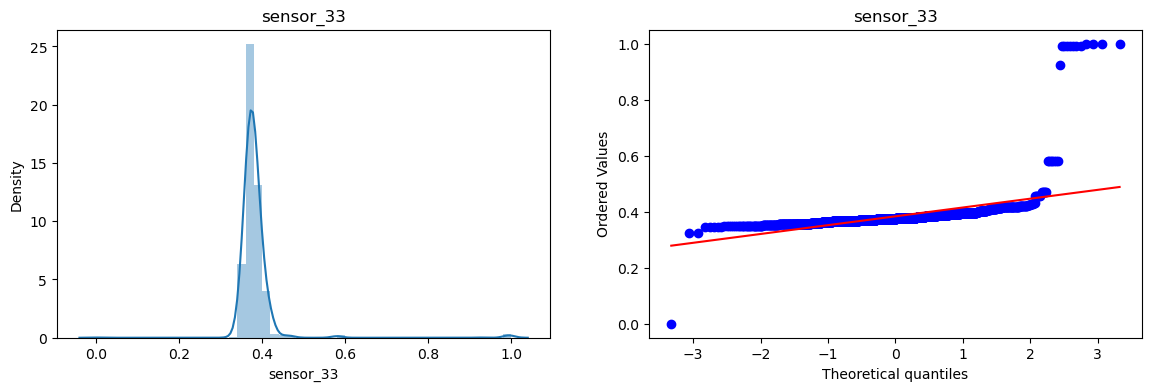

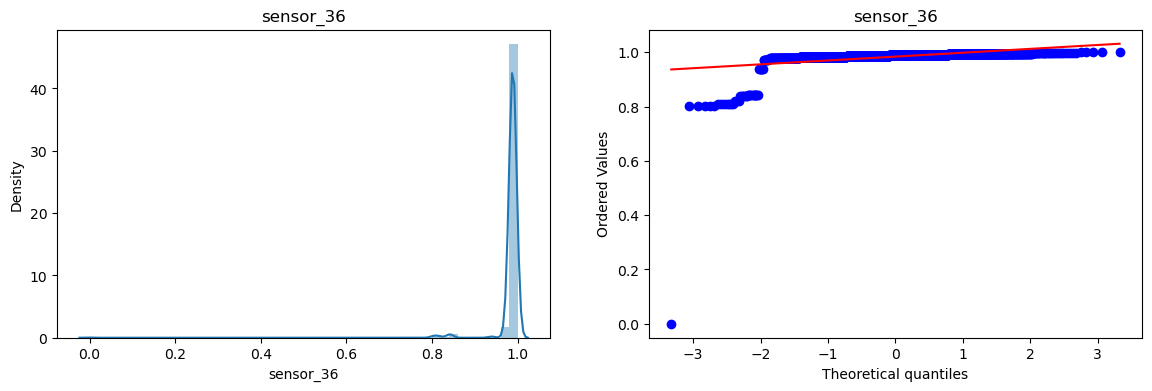

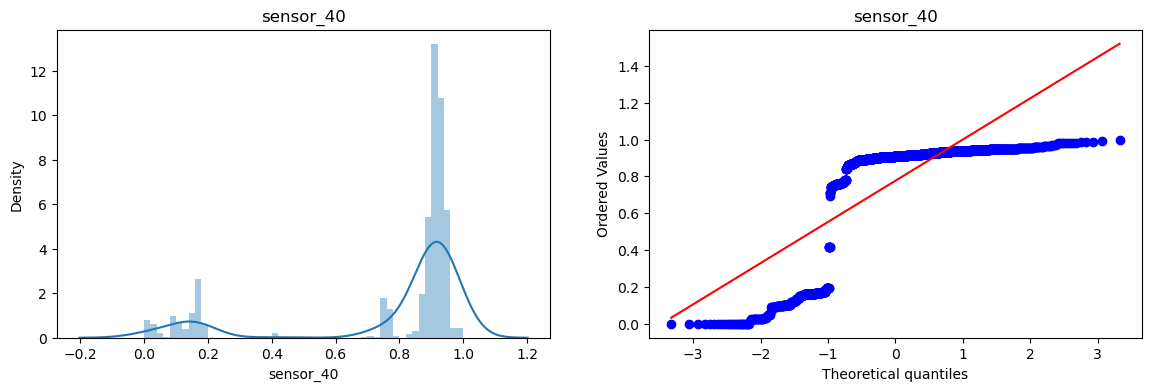

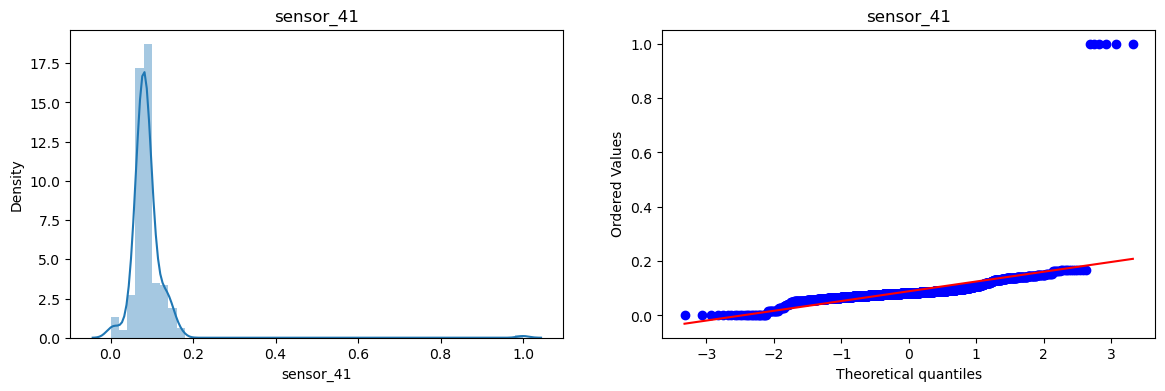

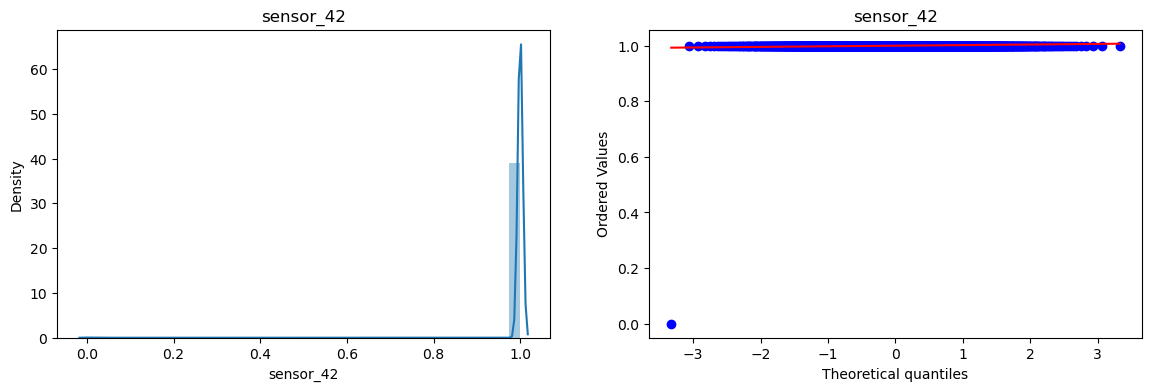

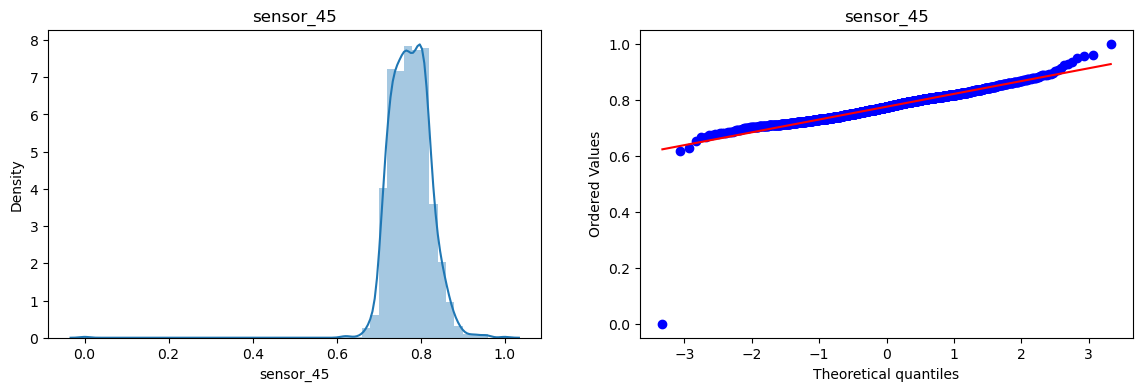

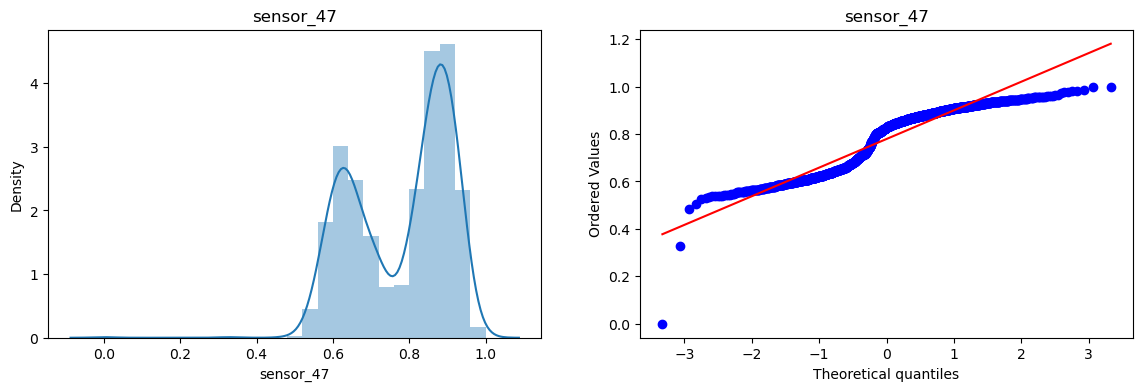

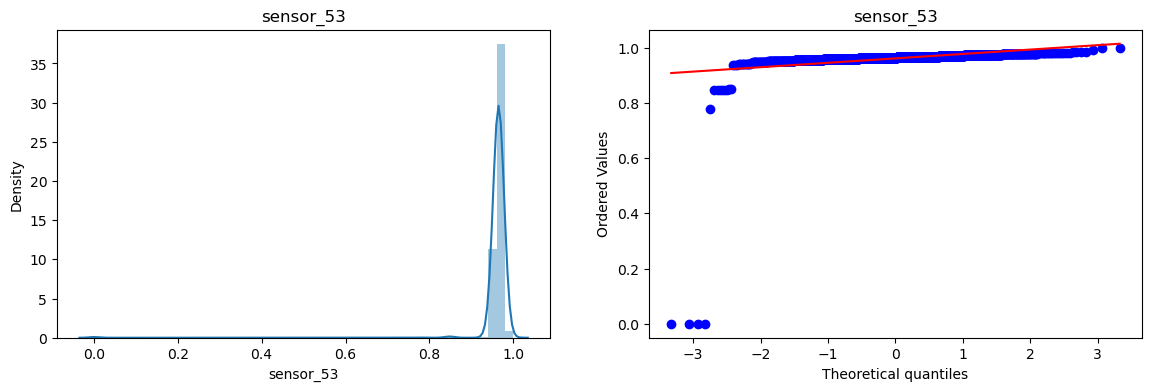

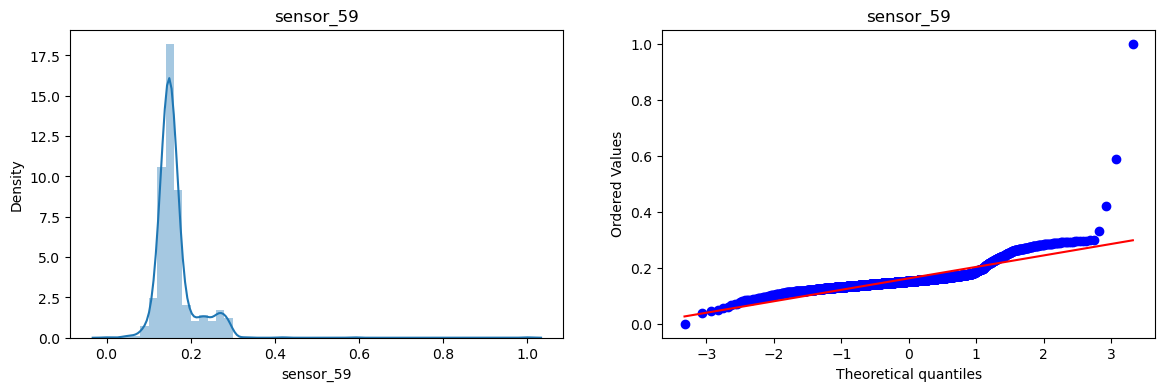

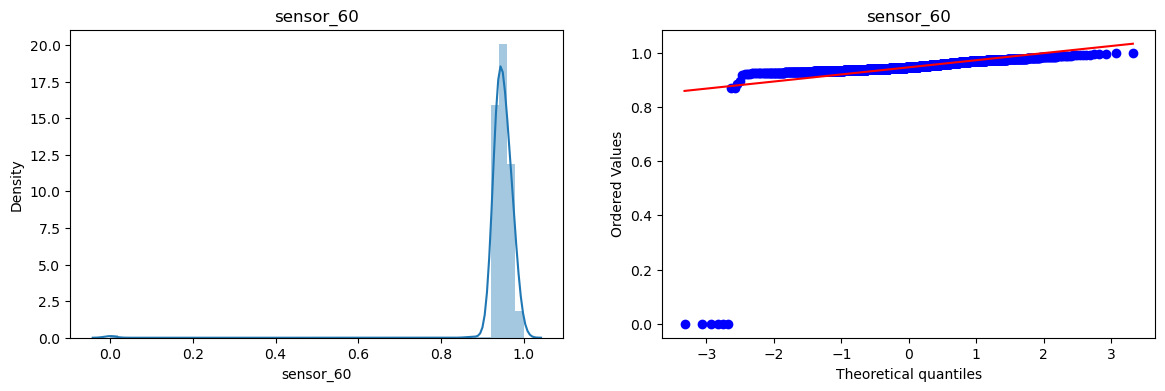

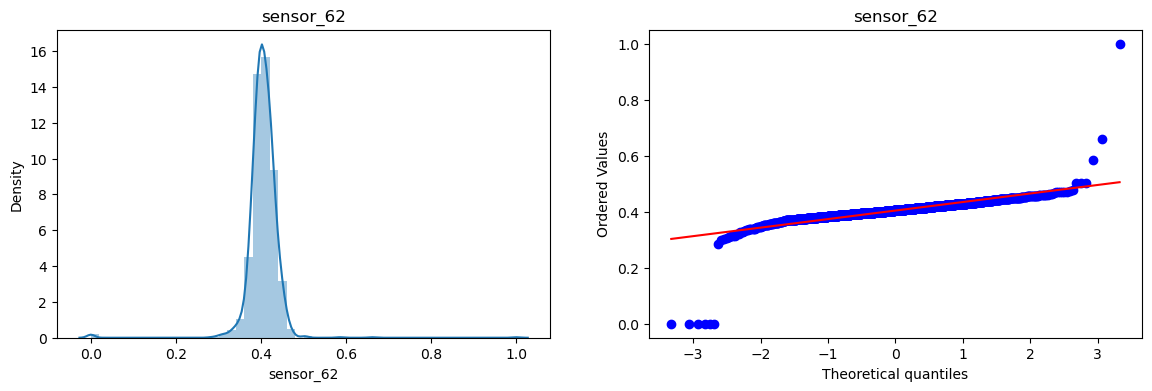

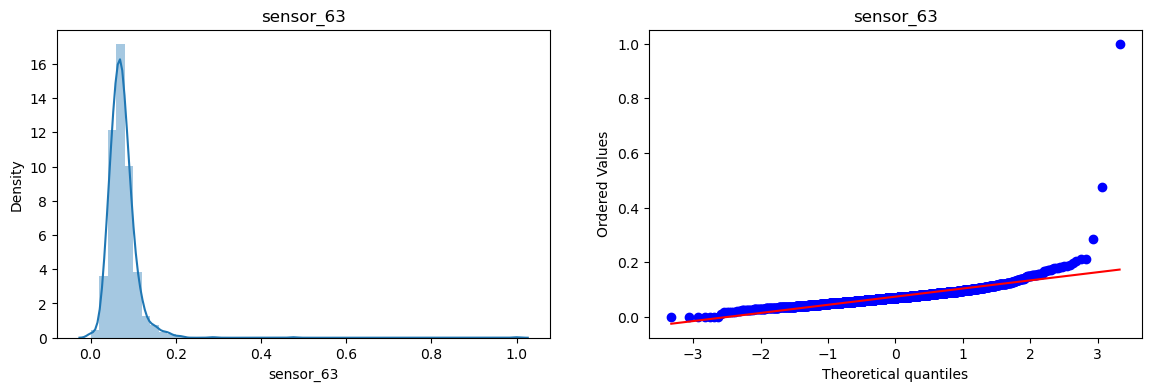

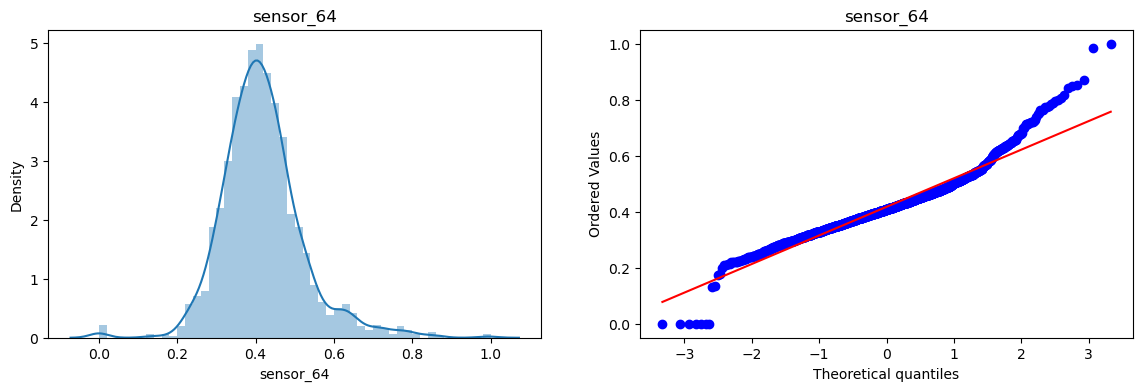

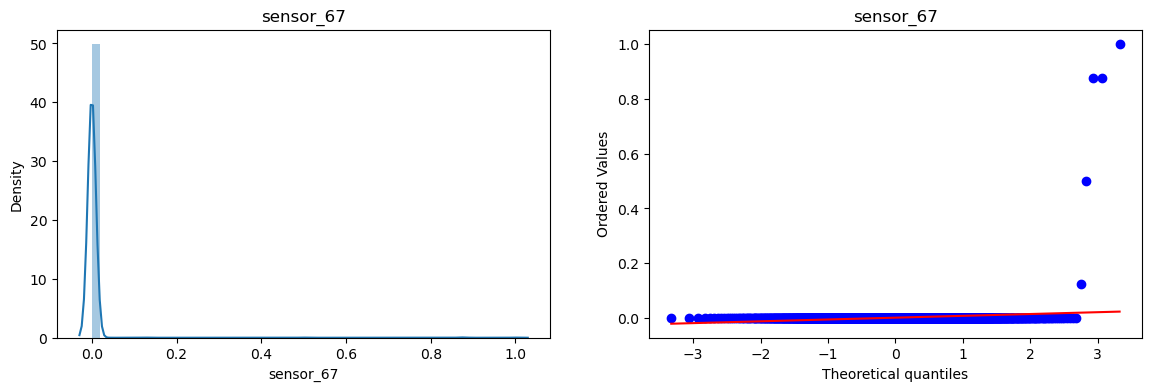

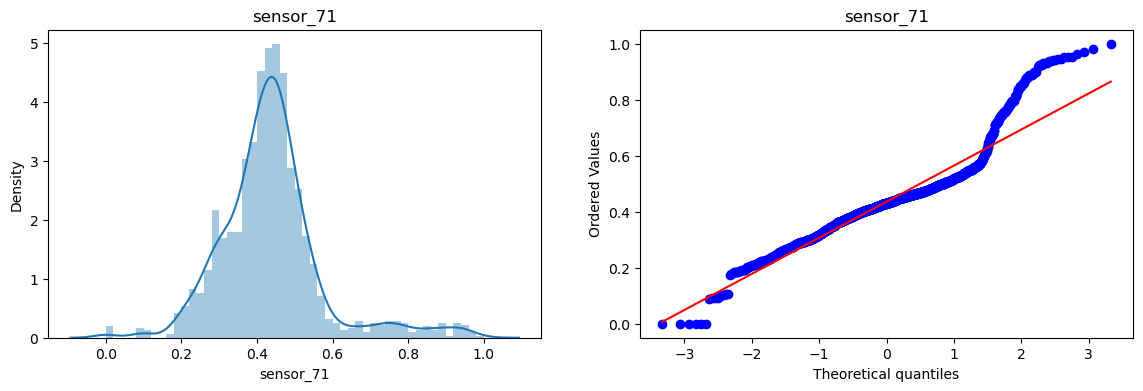

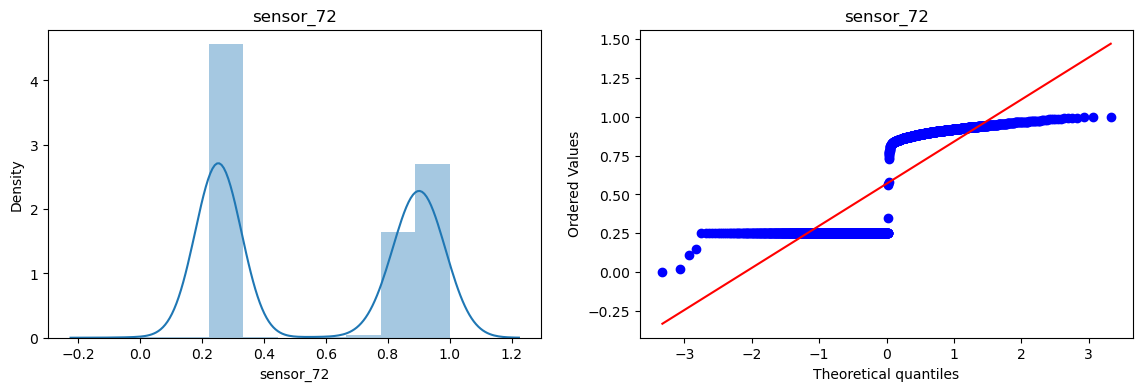

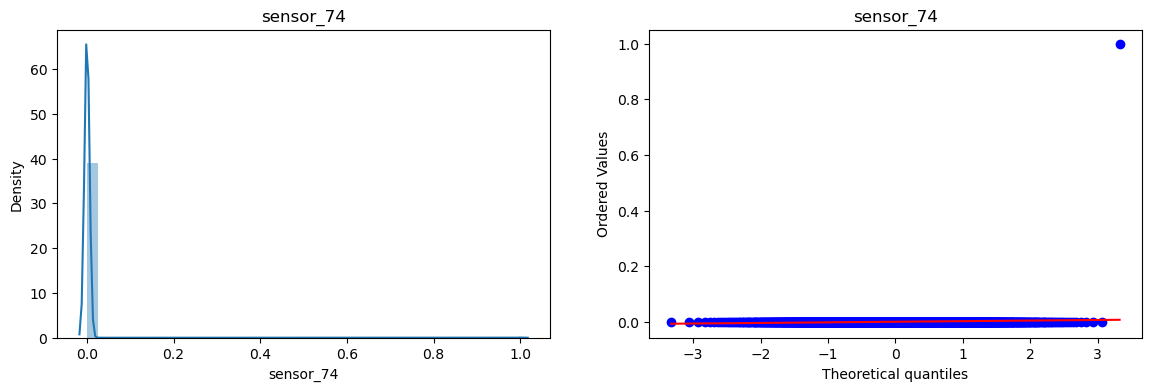

In [13]:
count=0
for col in df_norm.columns:
  count=count+1
  if count<40:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(df_norm[col])
    plt.title(col)

    plt.subplot(122)
    stats.probplot(df_norm[col], dist="norm", plot=plt)
    plt.title(col)

    plt.show()

**Remark 2:**
1. After normilizing with MIn-Max scaler we have change the scale differences of featiuresw and brought all scales between 0 and 1
2. Normilizing doe not treat the skewness. 


**1.3 Standard Scalar: Mean centering and Scaling**

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(sensor)
df_norm=scaler.transform(sensor)
df_norm= pd.DataFrame(df_norm,columns=sensor.columns)

In [15]:
from sklearn.preprocessing import StandardScaler
scaler_1 = StandardScaler()
scaler_1.fit(sensor)
df_std=scaler_1.transform(sensor)
df_std = pd.DataFrame(df_std,columns=sensor.columns)

In [16]:
#df_std.plot(kind='kde', subplots=True,layout=(52,5), fontsize=10, figsize=(15,150));

Text(0.5, 1.0, 'After Standard Scalar')

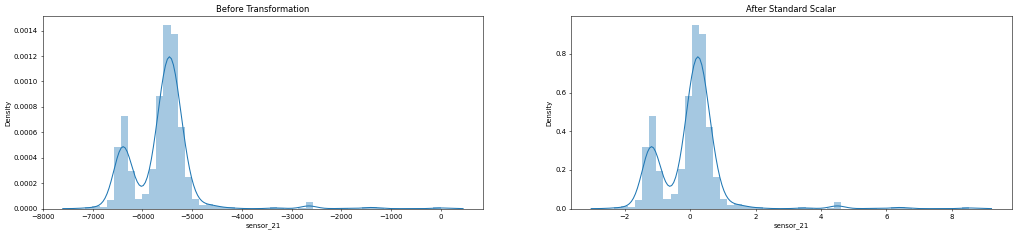

In [17]:
plt.figure(figsize=(25,5),dpi=50)
plt.subplot(121)
sns.distplot(sensor['sensor_21'])
plt.title('Before Transformation')
plt.subplot(122)
sns.distplot(df_std['sensor_21'])
plt.title('After Standard Scalar')

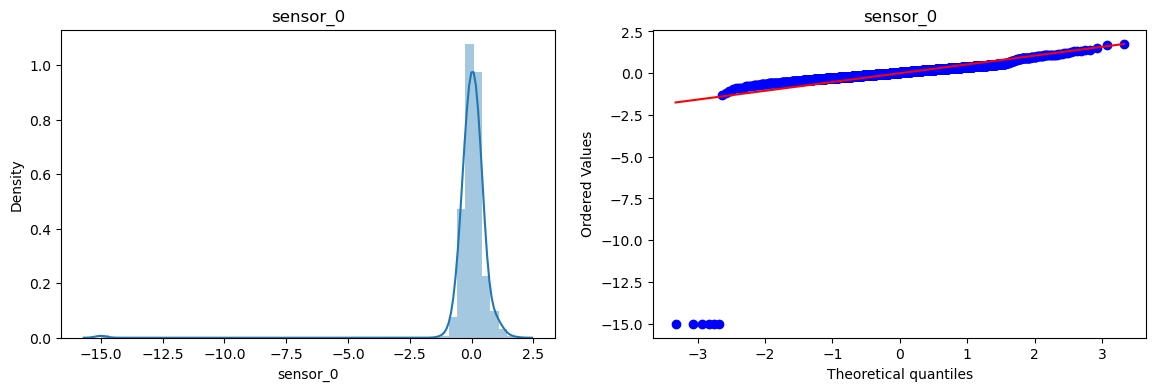

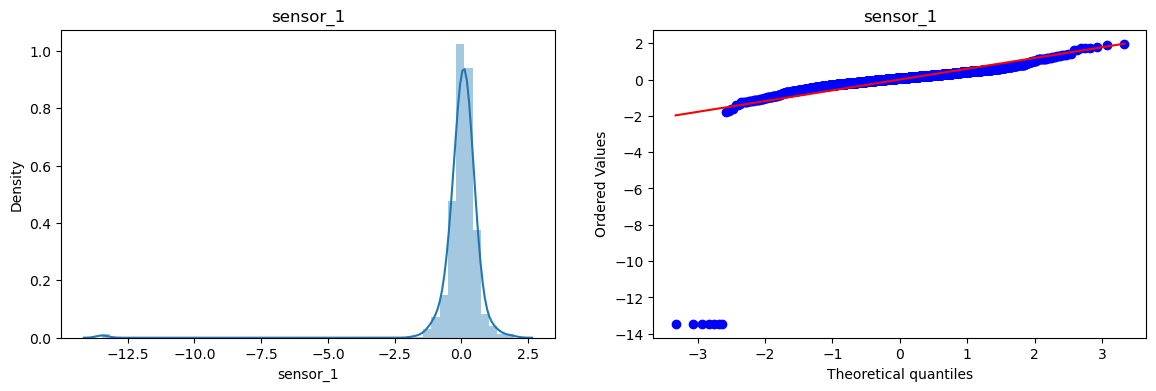

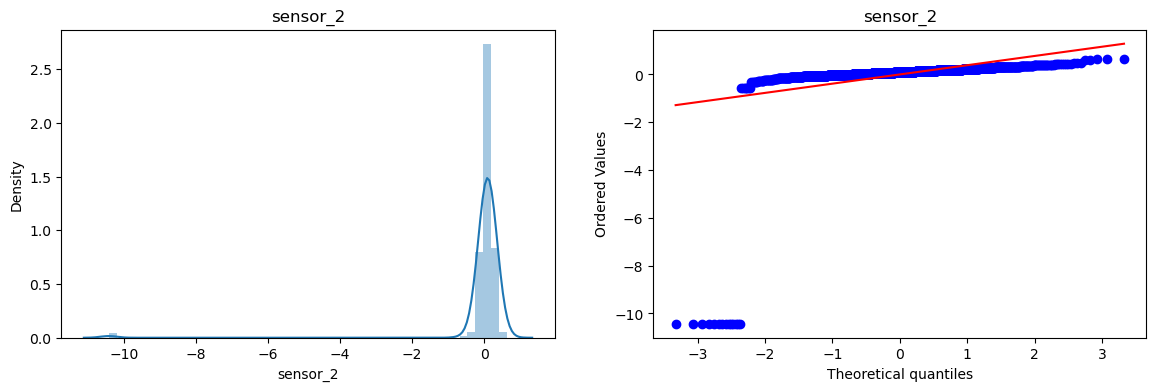

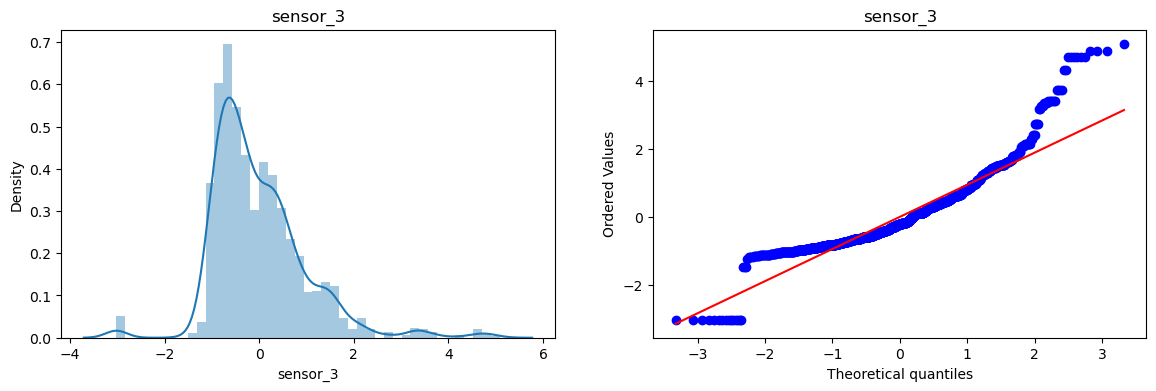

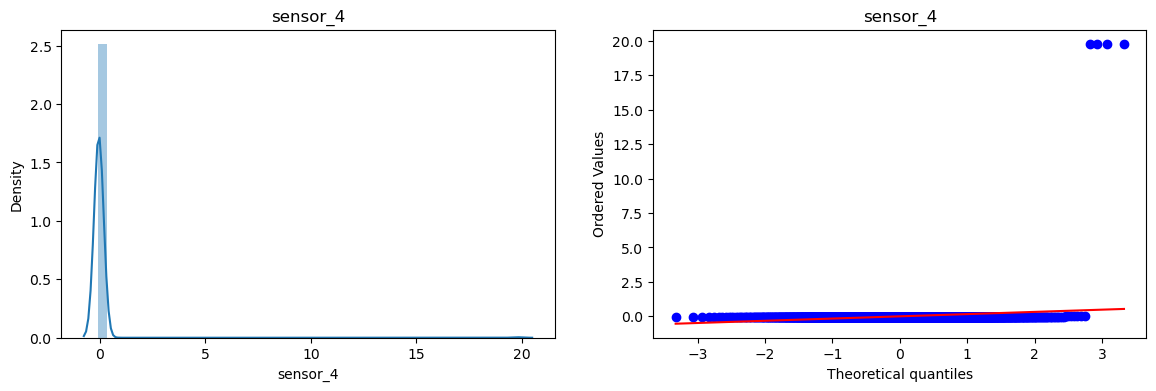

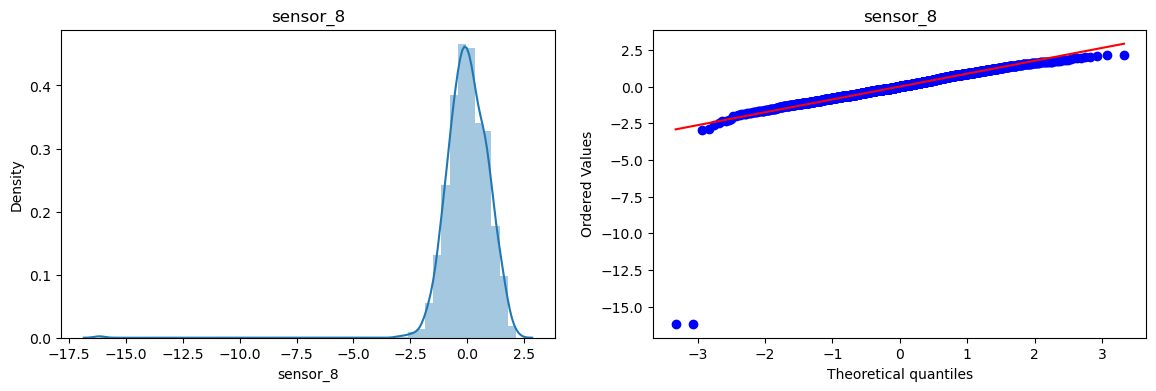

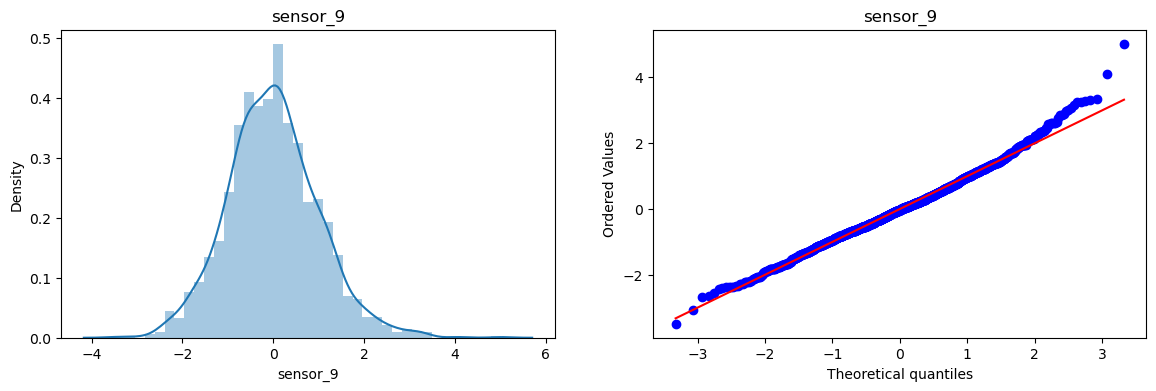

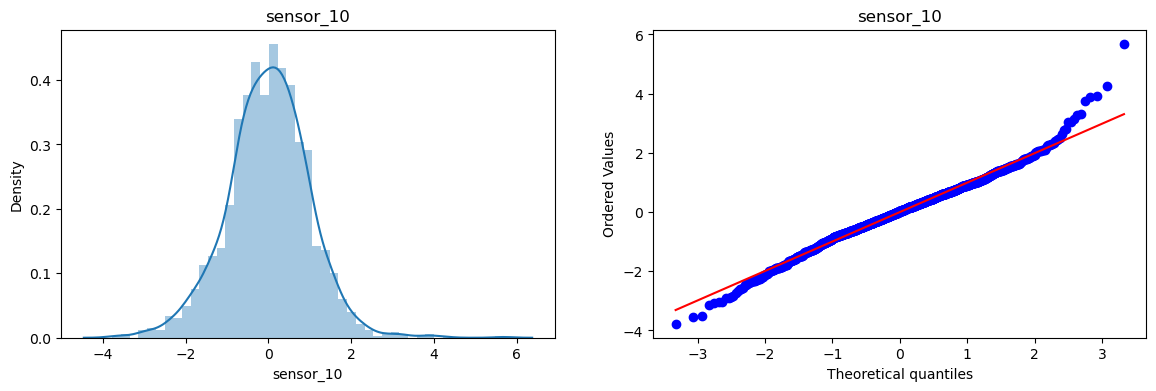

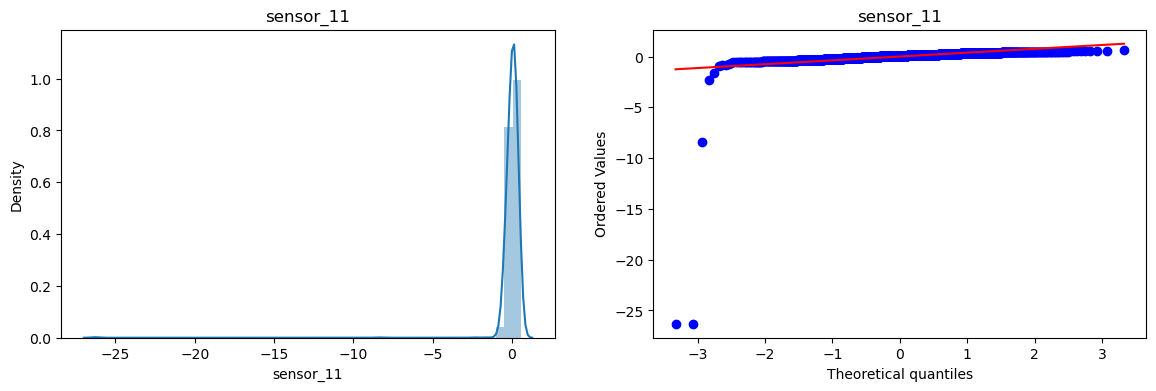

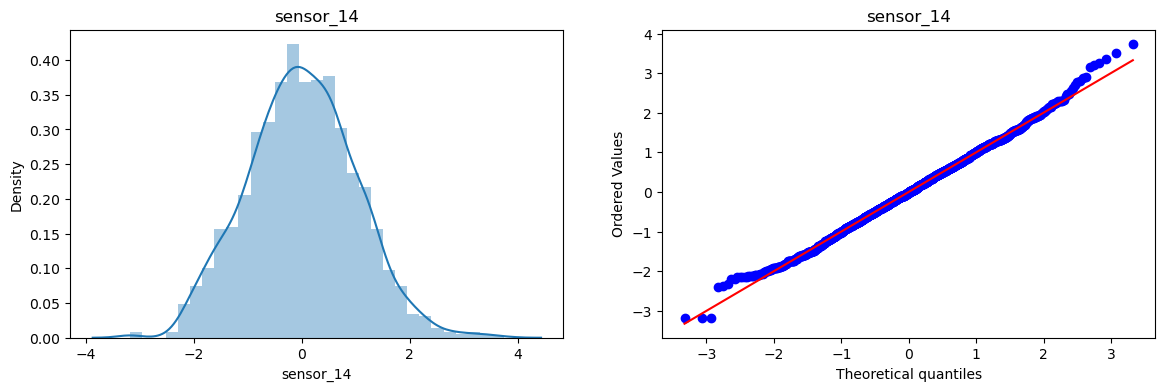

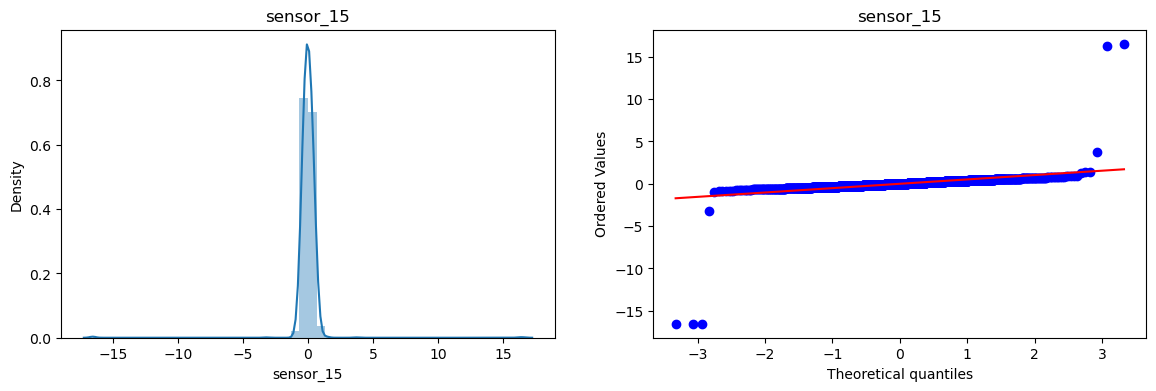

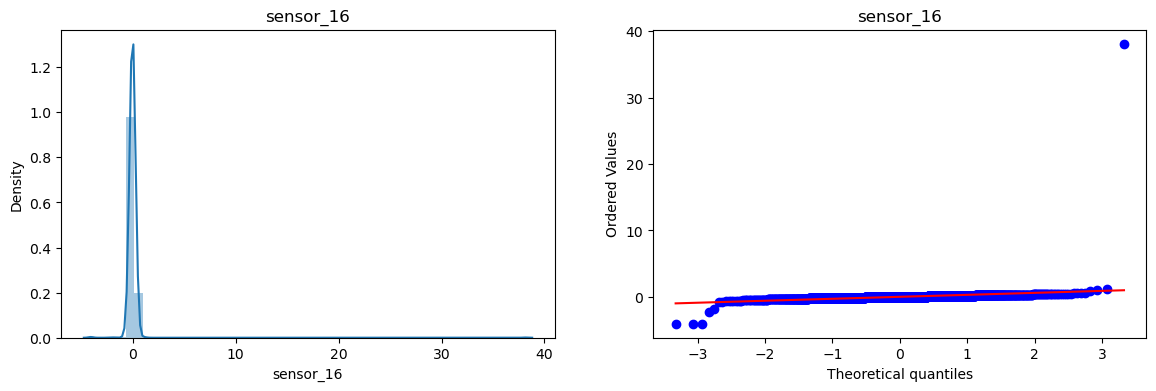

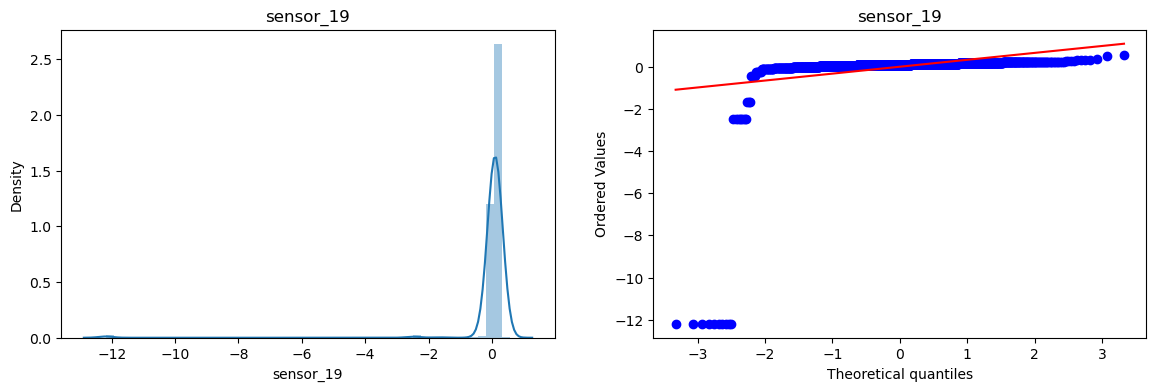

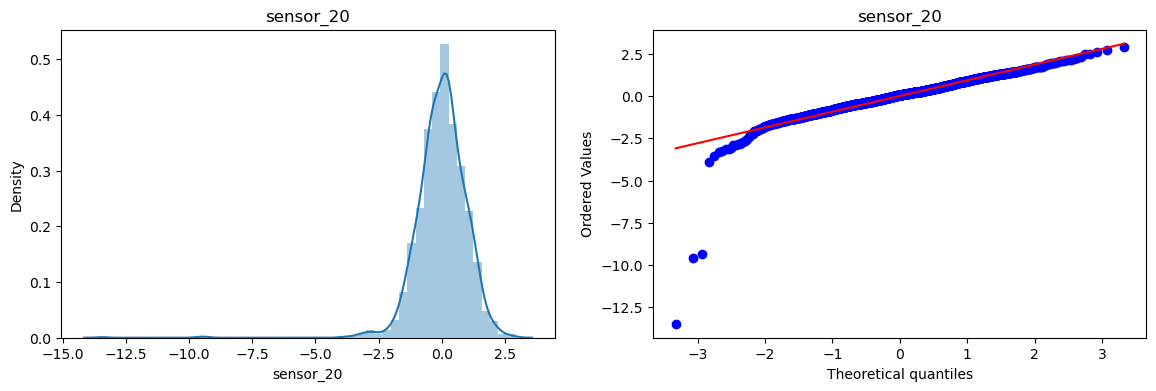

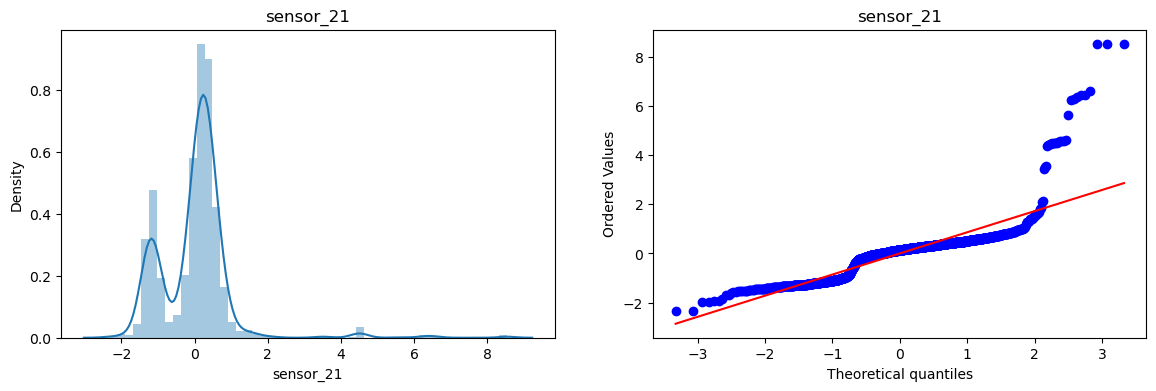

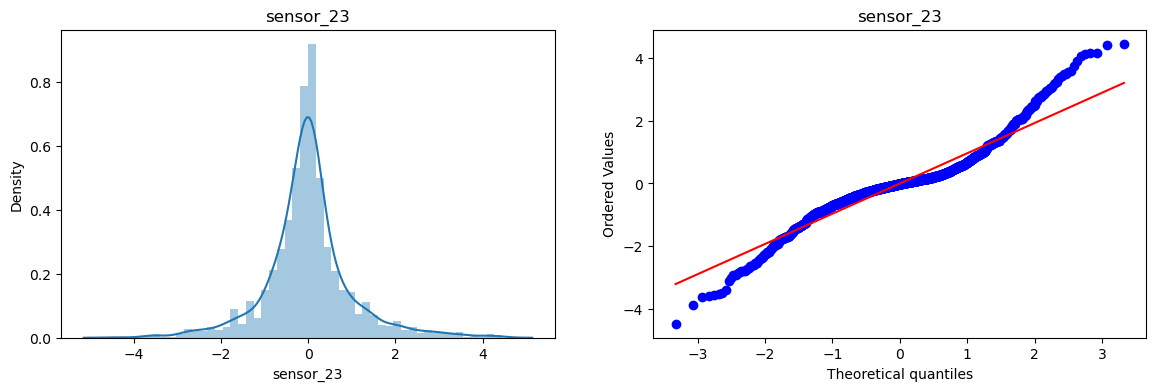

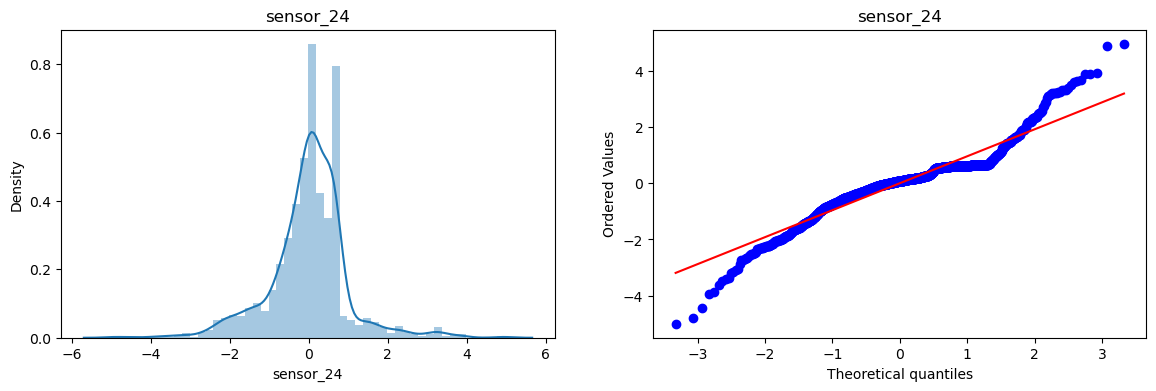

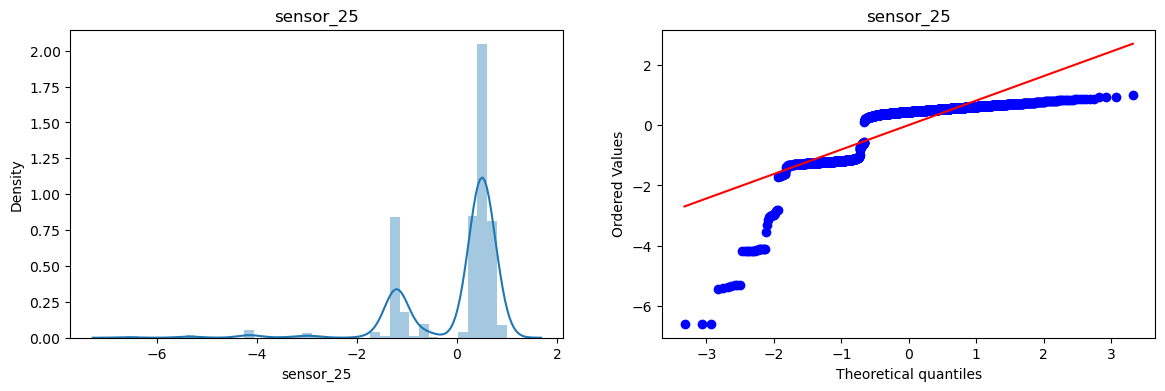

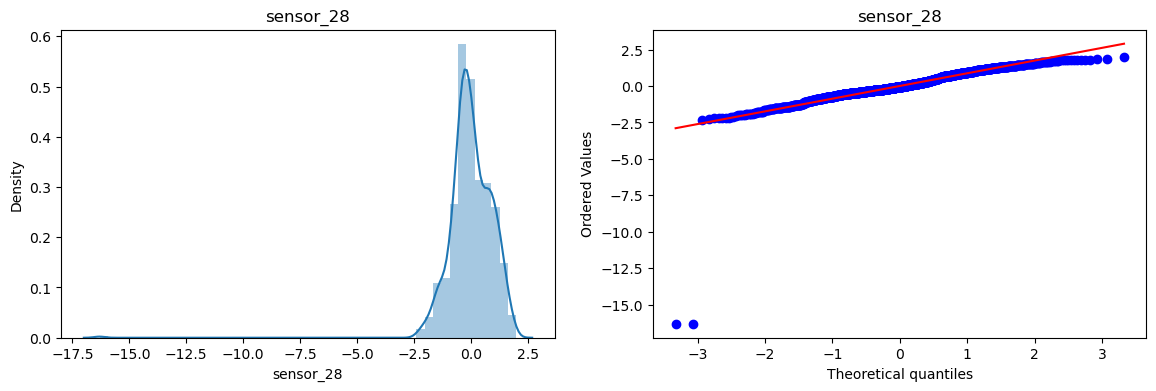

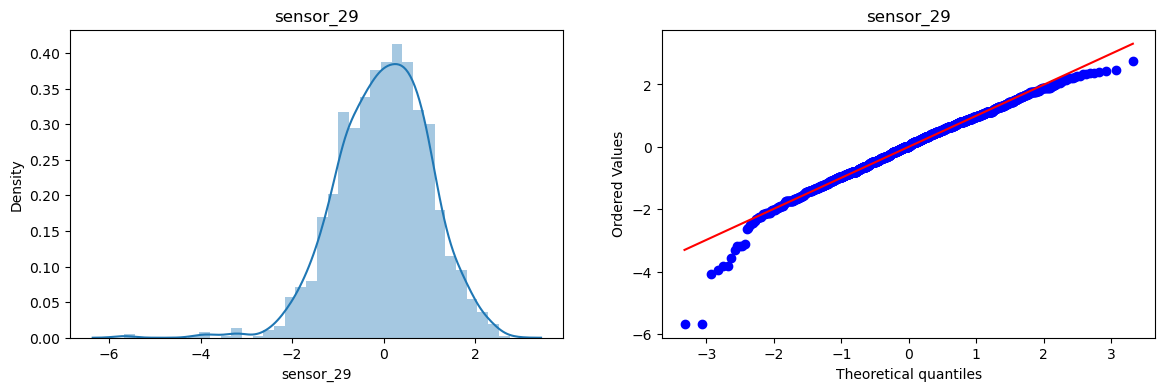

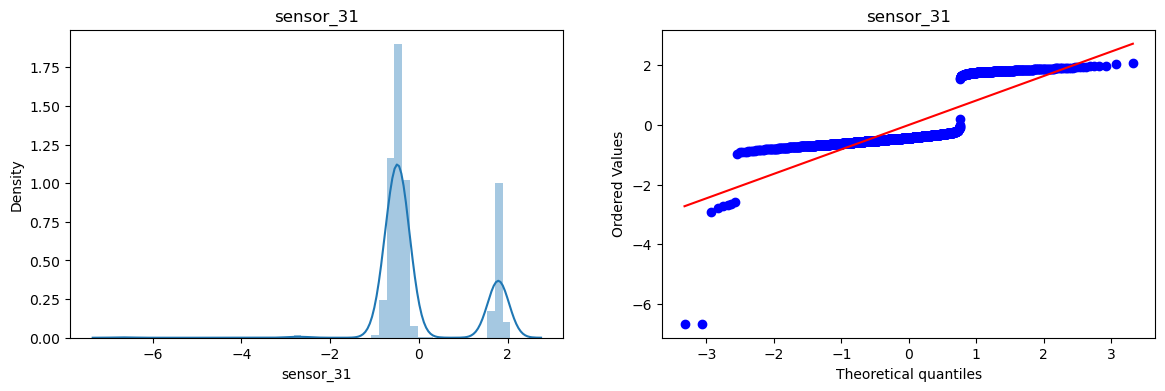

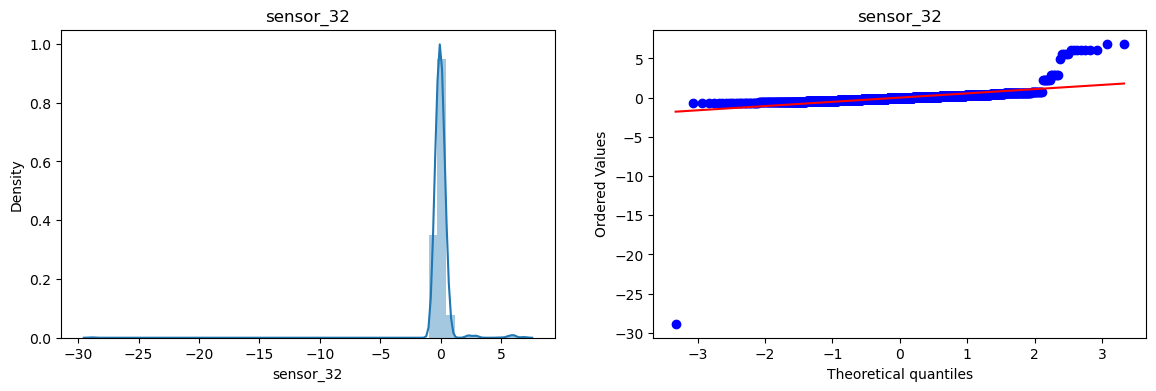

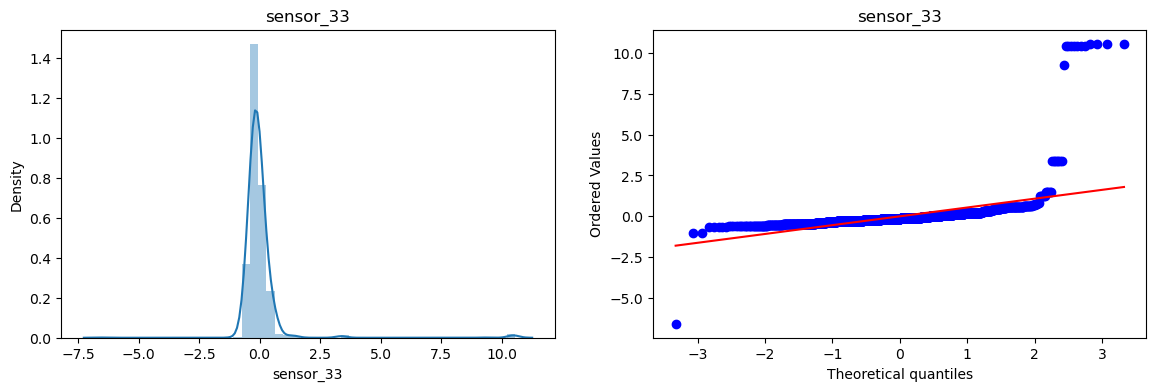

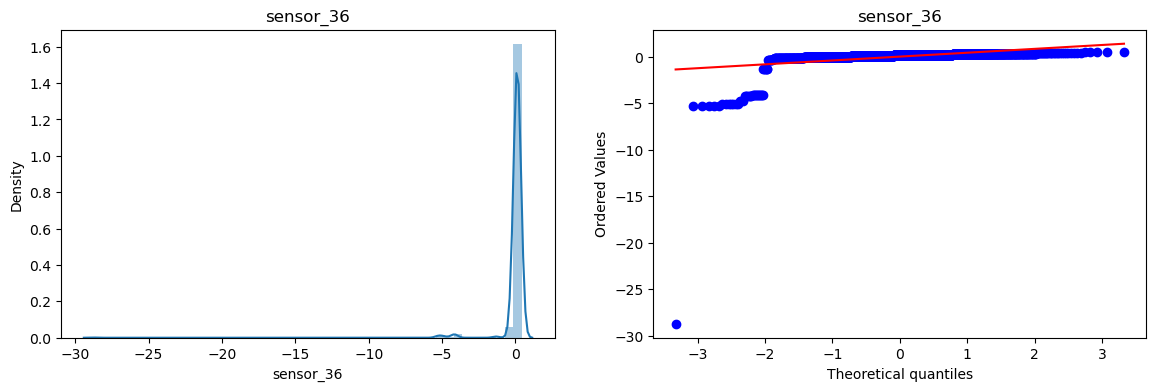

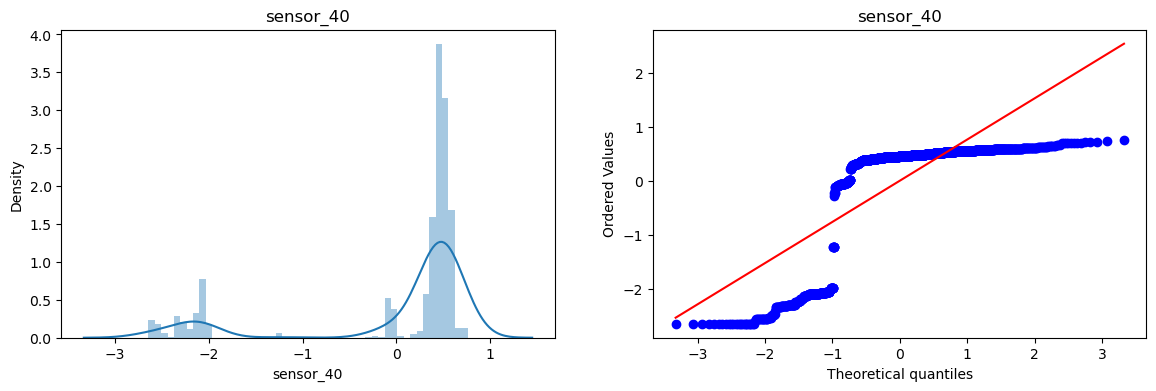

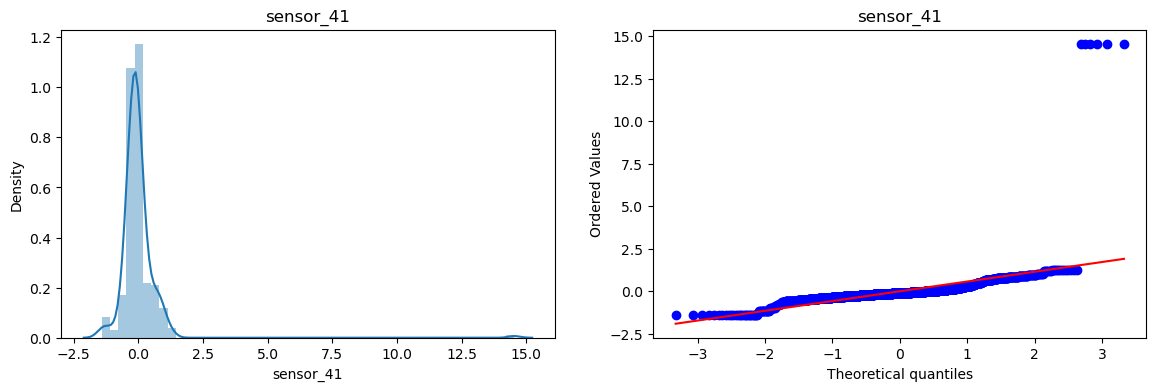

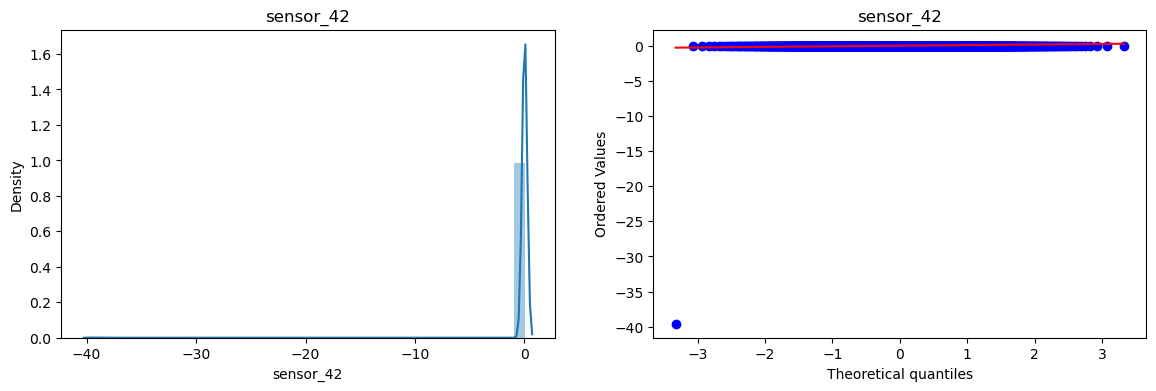

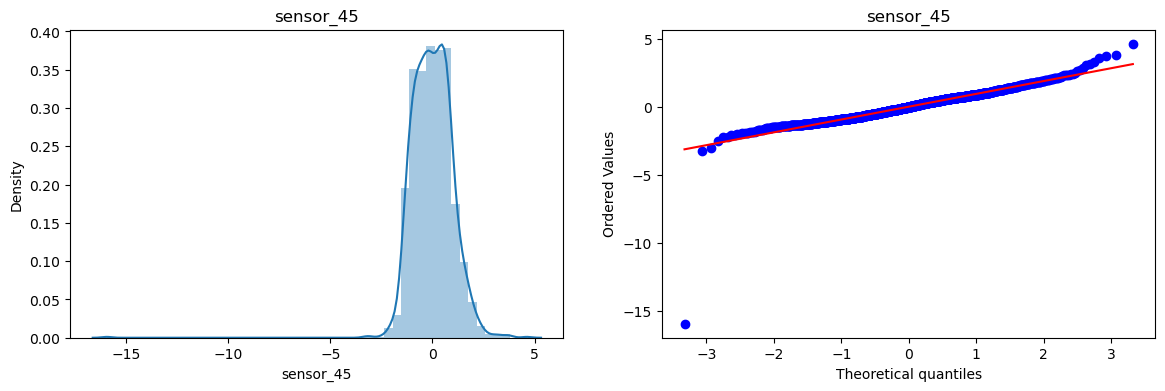

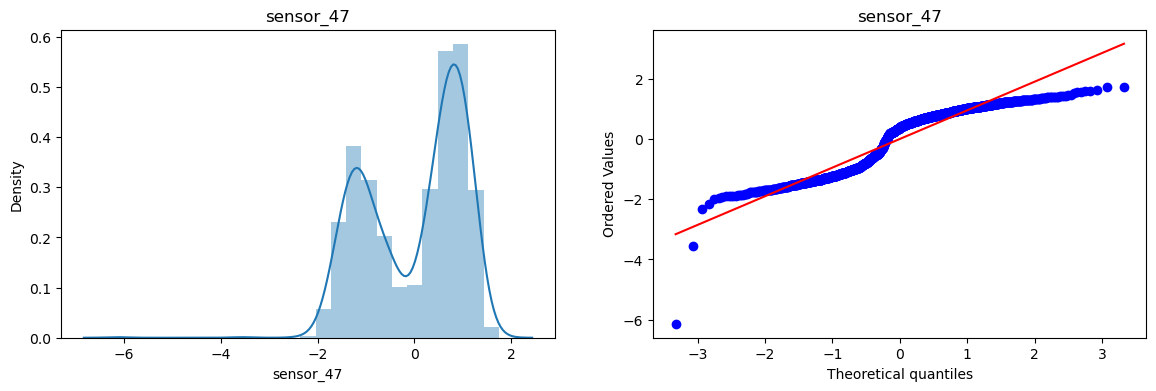

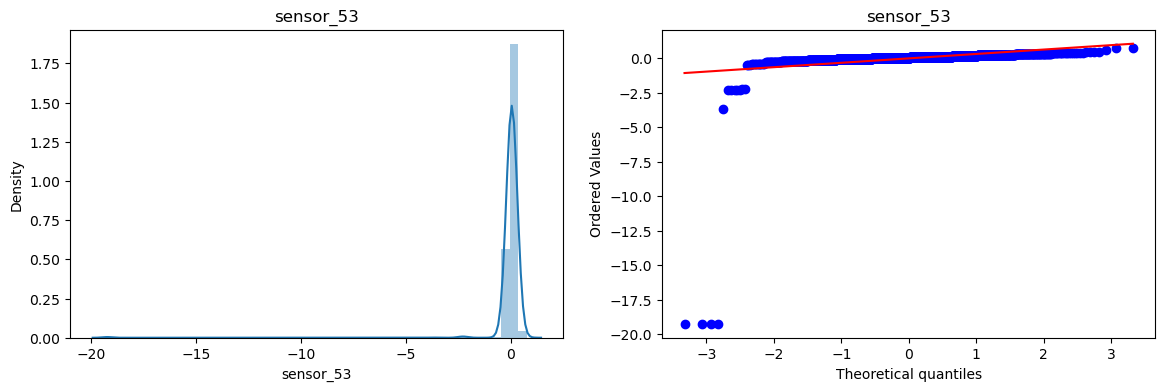

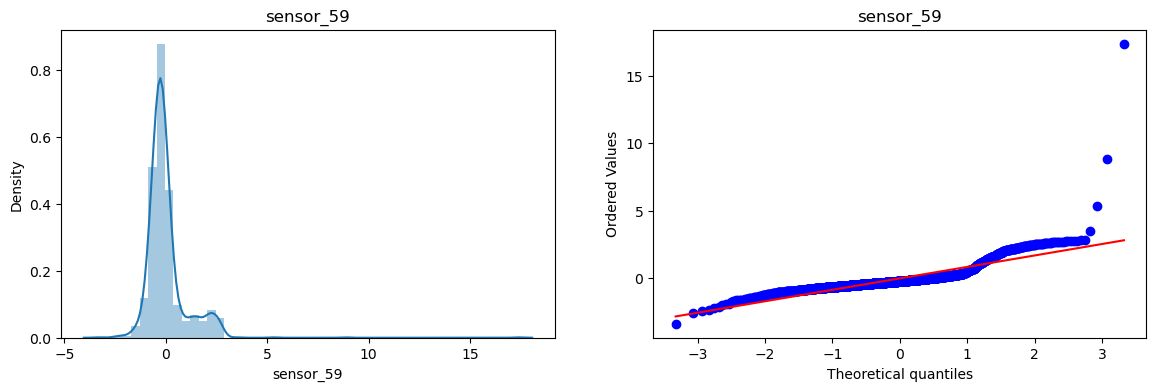

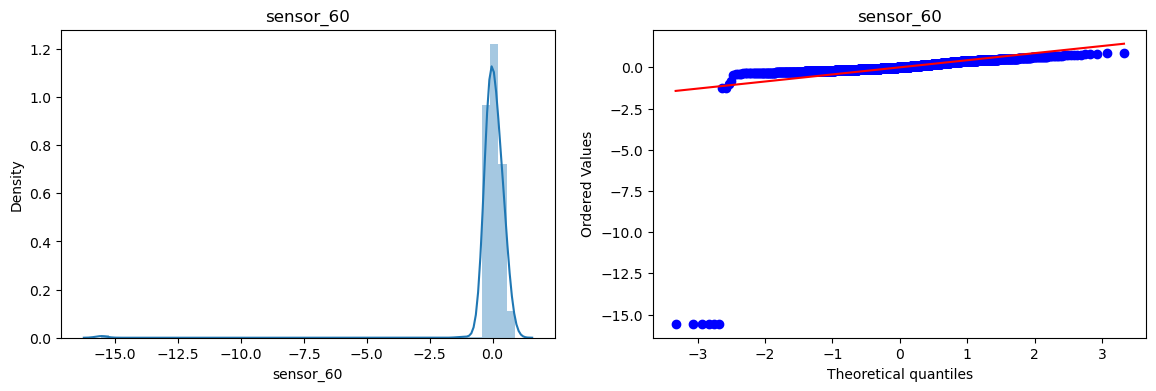

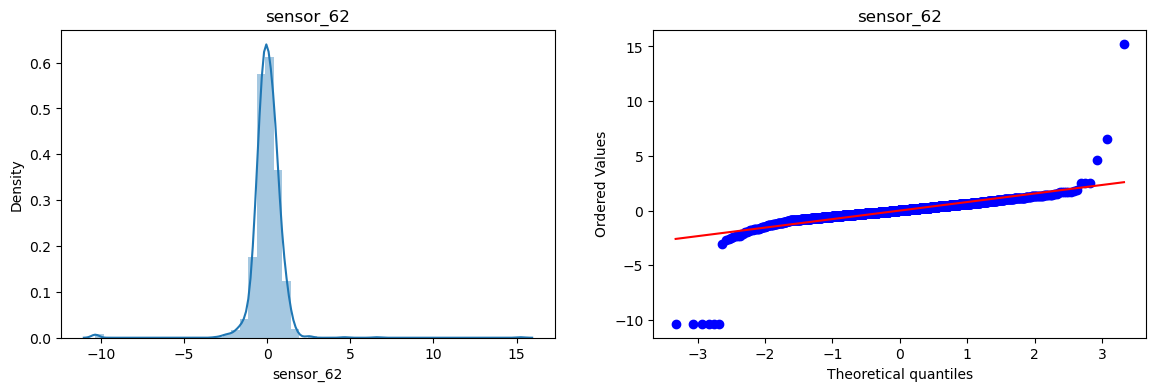

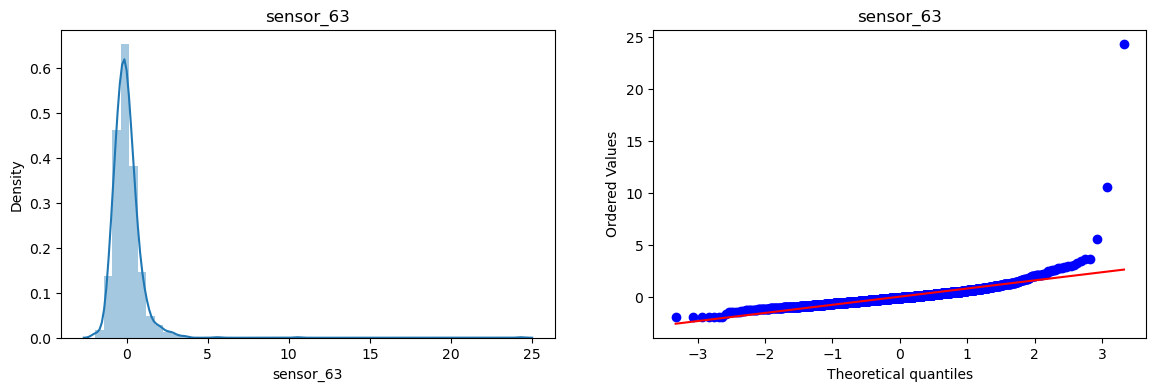

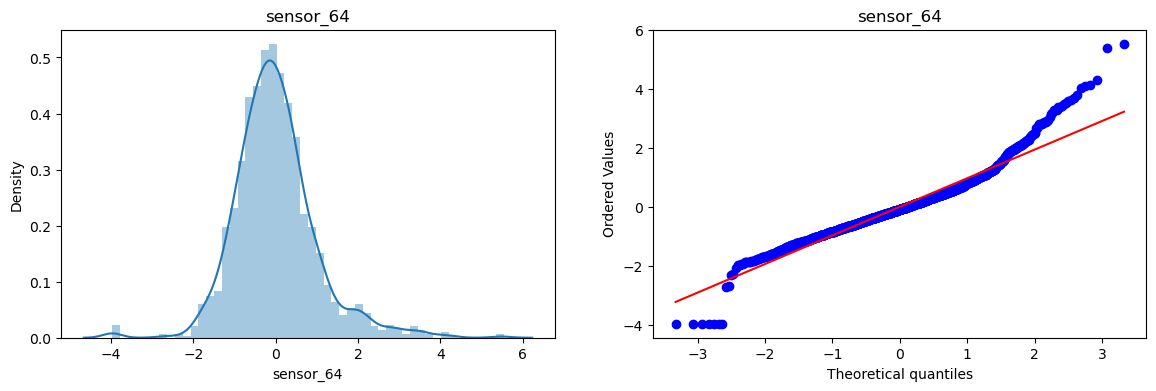

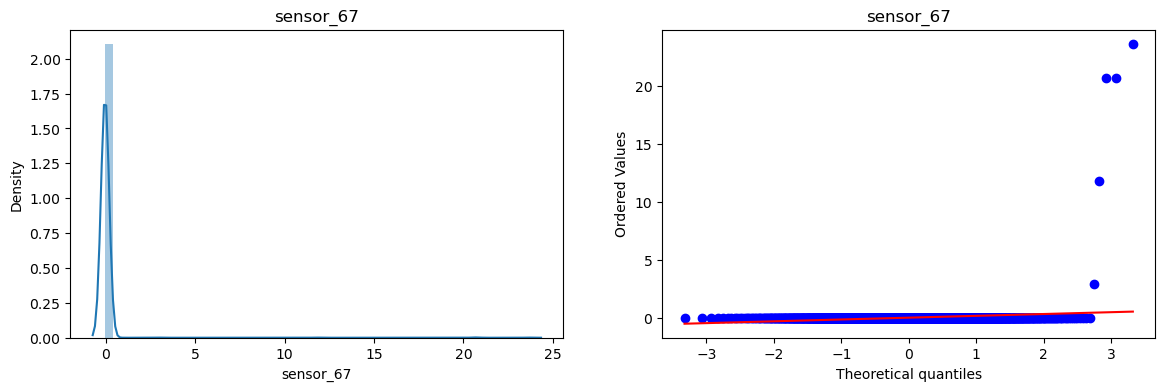

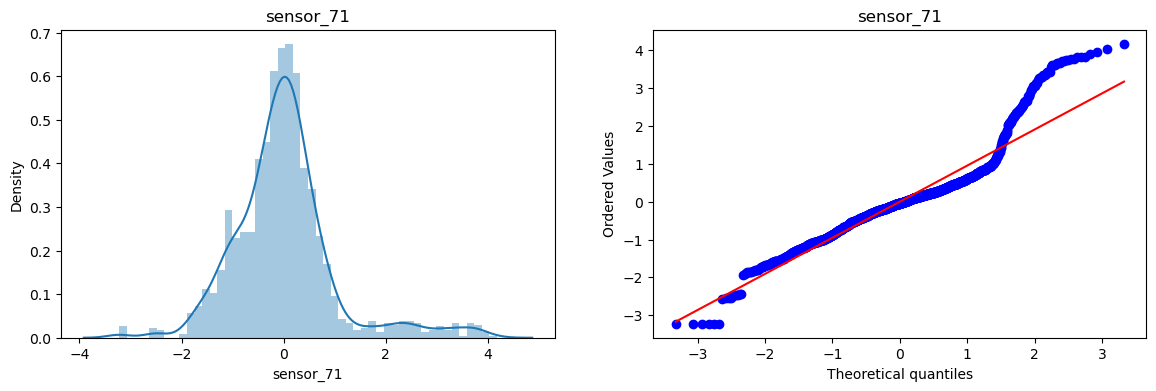

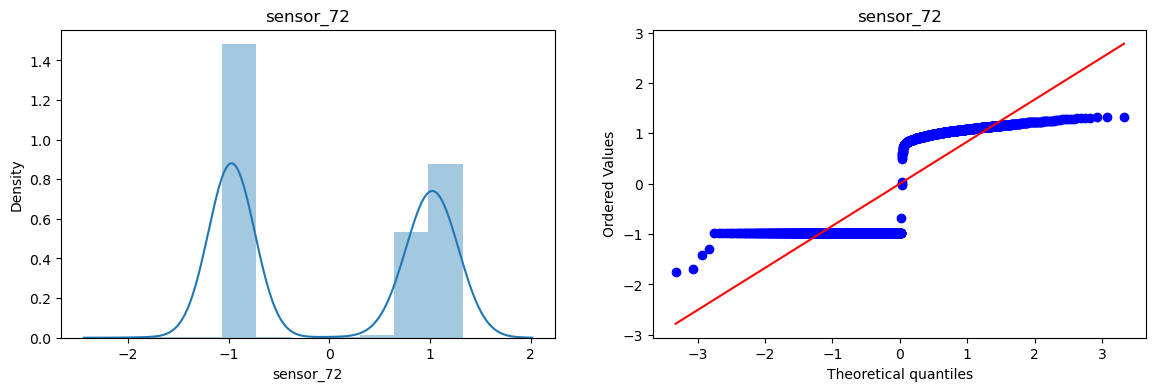

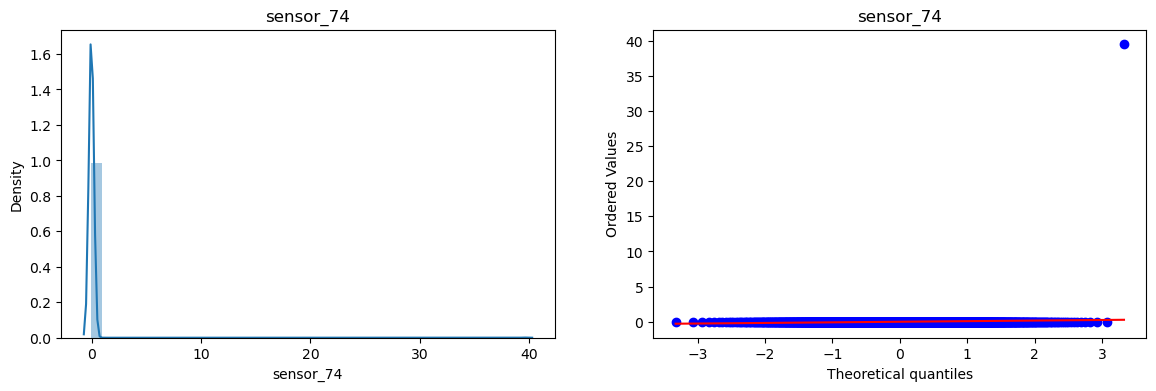

In [18]:
count=0
for col in df_std.columns:
  count=count+1
  if count<40:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(df_std[col])
    plt.title(col)

    plt.subplot(122)
    stats.probplot(df_std[col], dist="norm", plot=plt)
    plt.title(col)

    plt.show()

**Remark : 3**

1. After standerdization all features centring around 0 and scaled with standared deviation of that respective feature.
2. Still we have to employ a distribution transformation techniques to most of the features before giving inputs to linear models.

# **1.3 : Transforming Features :** 
1. Linear models works better when it receves input with normal distributed features.

There are different transformers: 

**1.Log Transformation**: Can not work with lot of  zero values we have most of the columns with zero values

**2.Box-Cox Tranformation**: This tranformations cant work if we do haave negative values in data.

**3. Power Transformers:** We will use 'yeo-johnson' method of transformation. Because it works both Positive and negative values.

**4. Quantile trnaformer:** In this transformation, we trnaform data to normal 

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.QuantileTransformer.html

## **1.3.1Quantile Transformer :**


In [ ]:
from sklearn.preprocessing import QuantileTransformer

In [ ]:
df =df_norm.copy()
quantile_transformer = QuantileTransformer(output_distribution='normal', random_state=42)
df_quant = pd.DataFrame(quantile_transformer.fit_transform(sensor),columns=sensor.columns)

In [ ]:
df_quant.shape

(1567, 194)

In [ ]:
df_quant.head()

sensor_0  sensor_1  sensor_2  sensor_3  sensor_4  sensor_8  sensor_9  \
0  0.258668  1.010721 -0.451772  0.219194  0.213725  0.498924  1.157061   
1  1.304728 -0.492822  1.075207  0.382260 -1.334066  0.455281  0.053973   
2 -1.193877  0.951090 -0.493857  0.916367  0.621364 -0.236799  0.400635   
3 -0.335869 -0.296807 -0.062715 -1.626722  0.045180  0.352765 -0.803958   
4  0.280109  0.079046  1.211173  0.125598  0.718462  0.520661 -0.134645   

   sensor_10  sensor_11  sensor_14  ...  sensor_565  sensor_570  sensor_571  \
0  -0.427976  -1.942703  -0.362860  ...   -5.199338    0.478972   -0.041472   
1  -1.584354  -0.338834   0.402944  ...   -5.199338    0.880496    1.538360   
2   0.106841  -0.439001   0.188832  ...    3.015205    0.882749   -0.435185   
3  -0.414267  -0.313694   0.225876  ...    0.629976   -0.723343   -0.455156   
4  -0.895780  -0.761353   0.570340  ...   -5.199338   -0.155201   -0.438714   

   sensor_572  sensor_578  sensor_582  sensor_583  sensor_586  sensor_587  \
0    0.091712   -0.496390    0.110627   -0.580524   -1.929828   -5.199338   
1   -1.524779    0.392492    0.536531    1.539330   -1.104747    0.655643   
2    1.230006    2.788641   -1.283836    0.497809    2.454949    2.356740   
3    0.330873    0.840906   -0.341493   -1.159515   -0.017565    0.040157   
4    0.053973   -0.496390   -3.065818    5.199338   -0.017565    0.040157   

   sensor_589  
0   -5.199338  
1    1.300264  
2    0.290735  
3    0.038901  
4    0.038901  

[5 rows x 194 columns]

Text(0.5, 1.0, 'After Quantile Transformation')

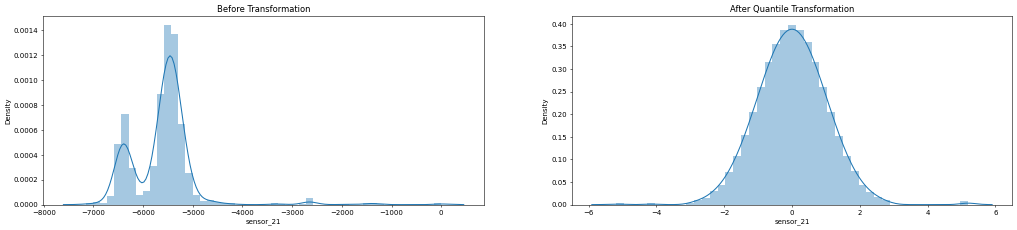

In [ ]:
plt.figure(figsize=(25,5),dpi=50)
plt.subplot(121)
sns.distplot(sensor['sensor_21'])
plt.title('Before Transformation')
plt.subplot(122)
sns.distplot(df_quant['sensor_21'])
plt.title('After Quantile Transformation')

OBS: 1. The Bimodal data transformed in to the normal after applying Quantile transformer

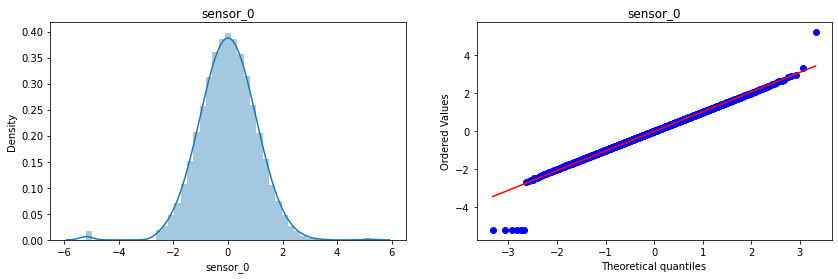

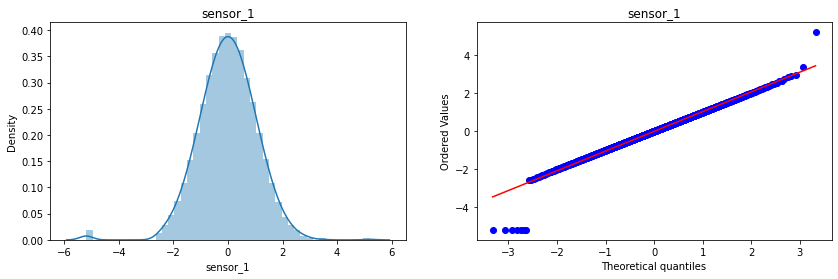

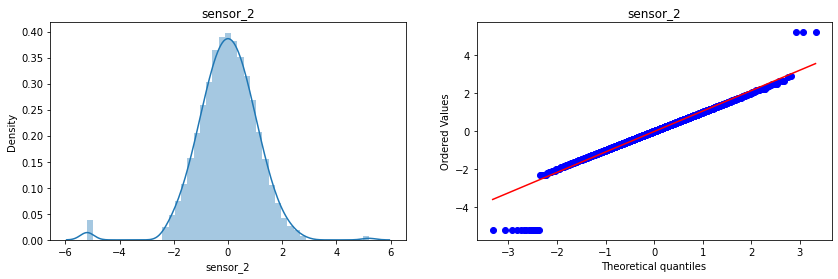

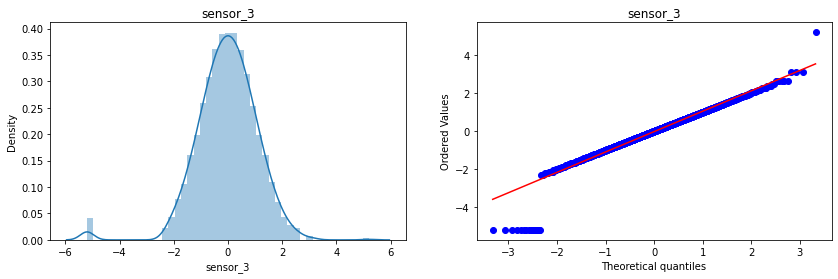

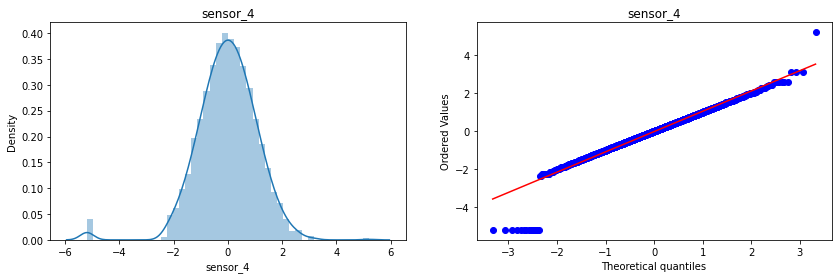

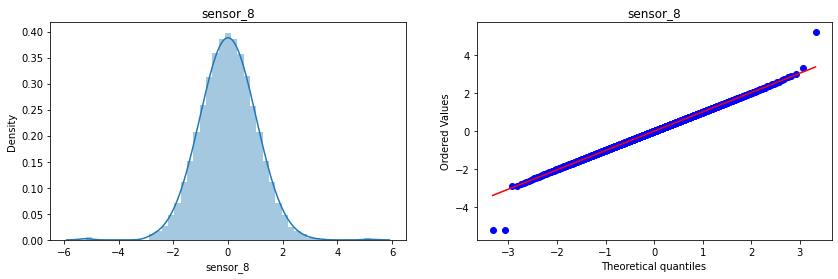

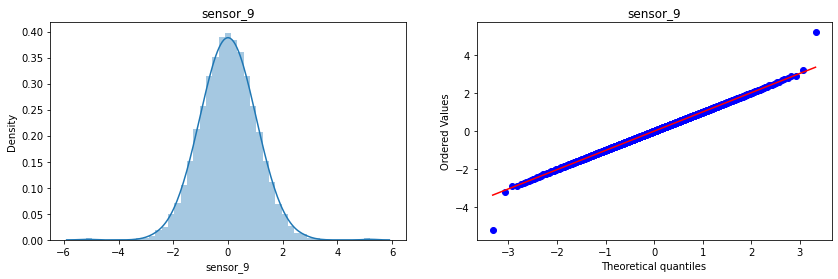

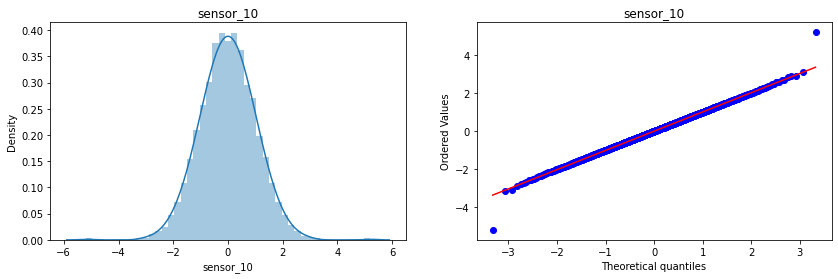

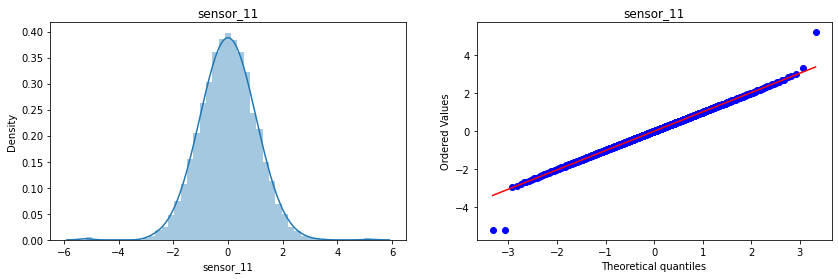

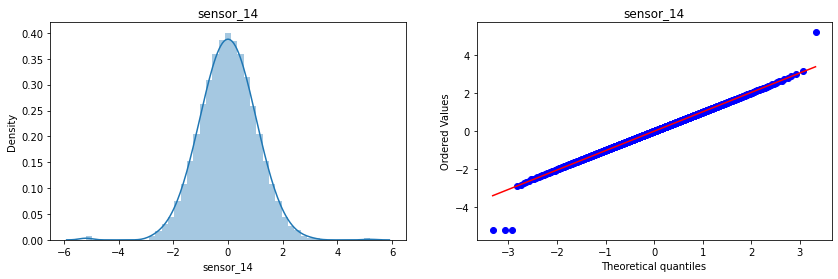

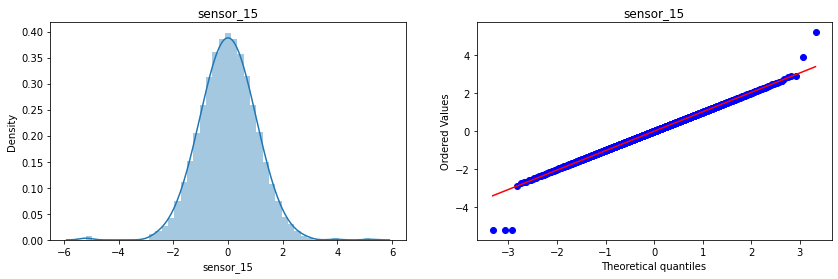

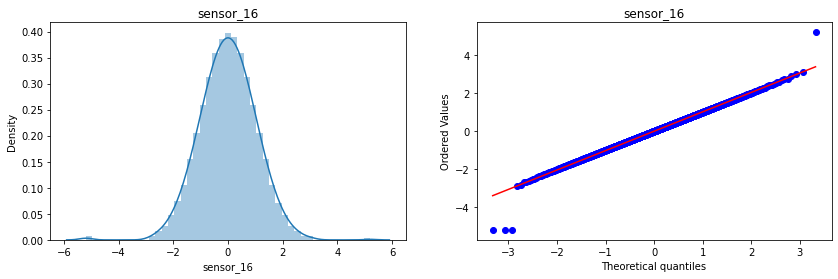

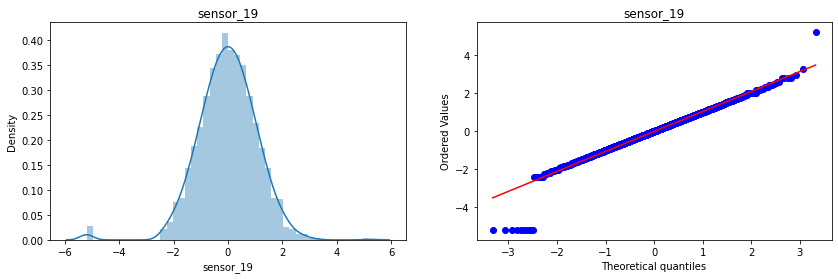

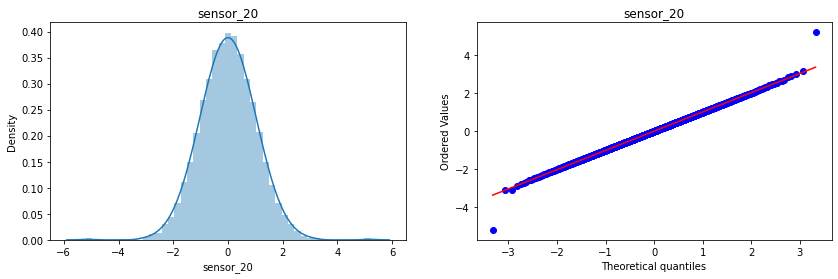

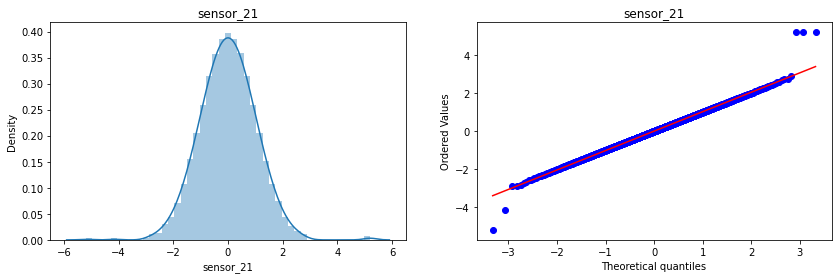

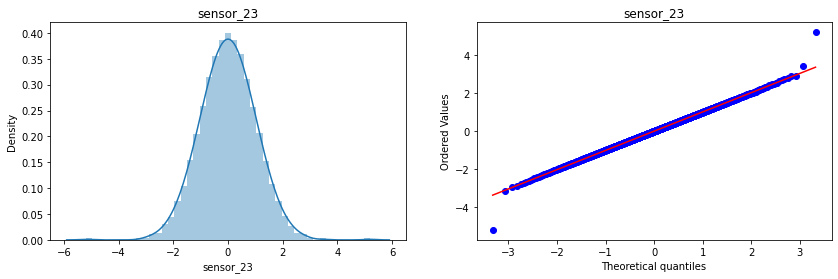

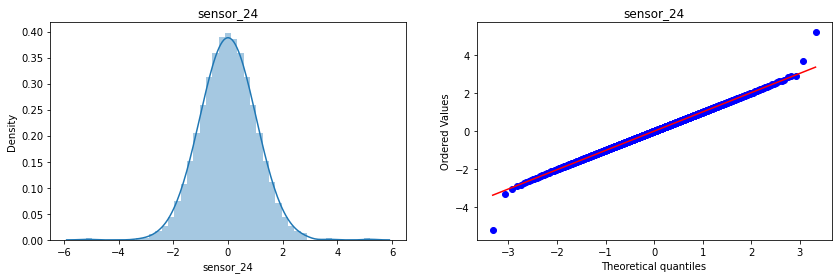

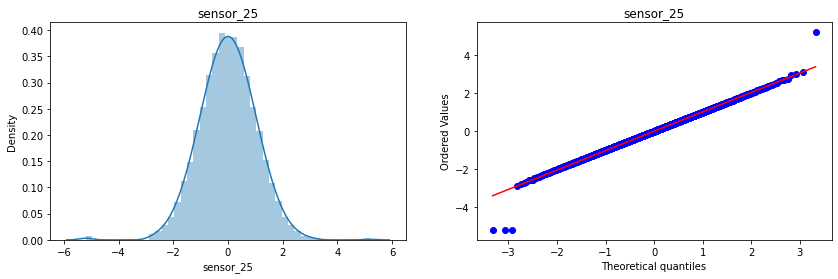

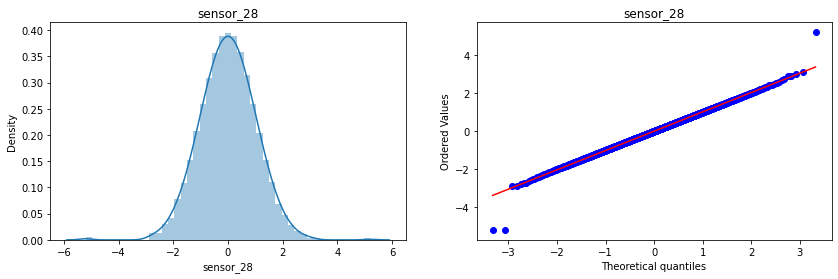

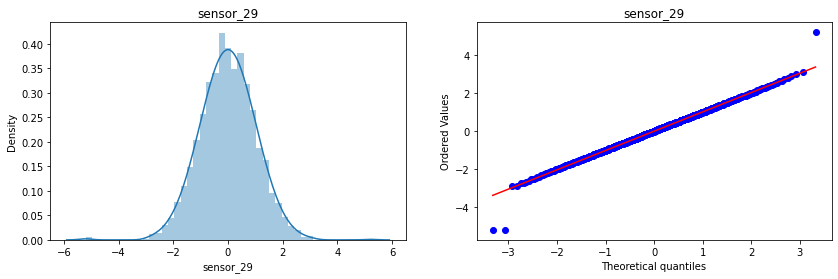

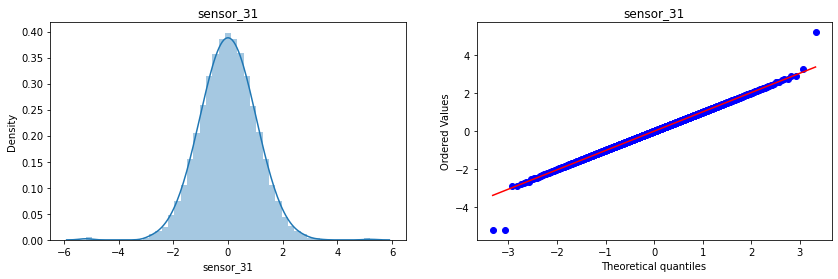

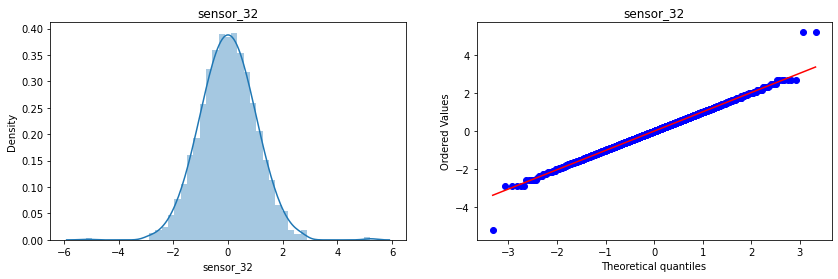

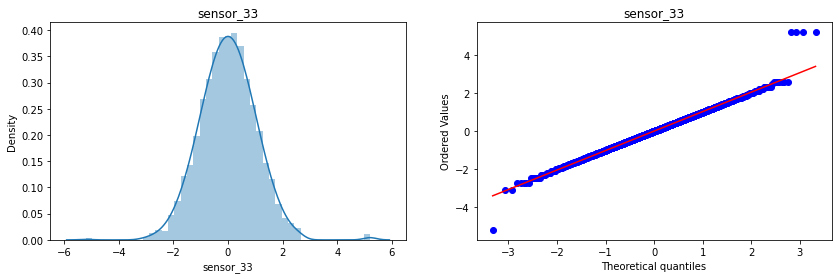

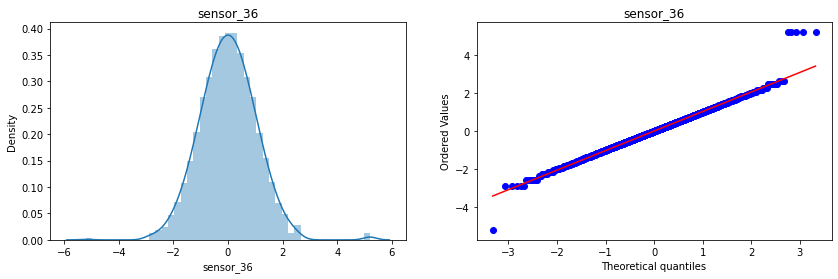

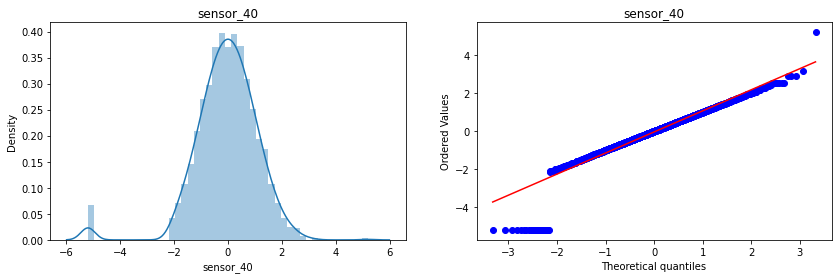

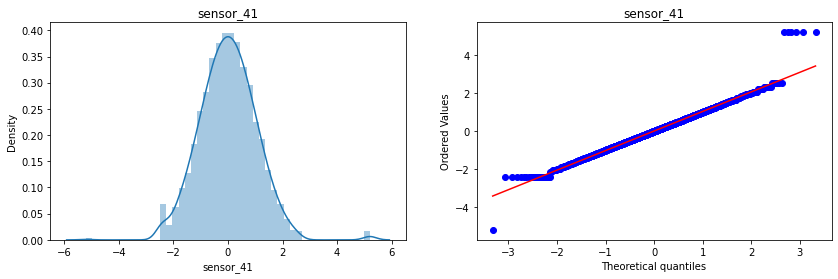

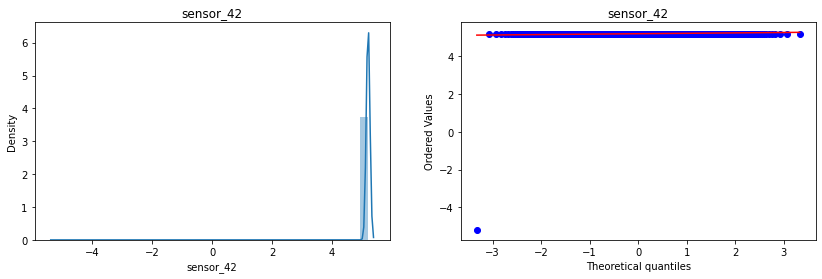

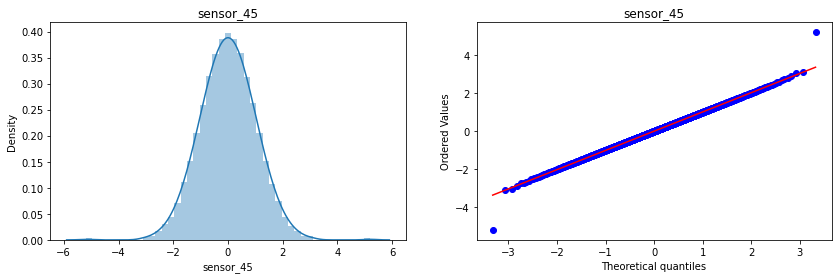

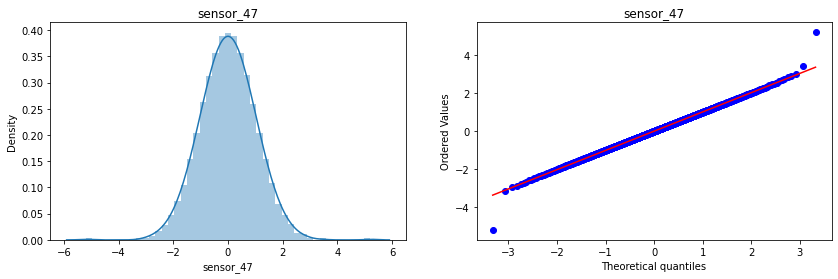

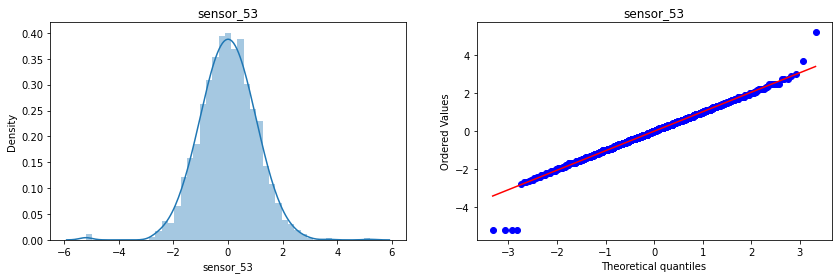

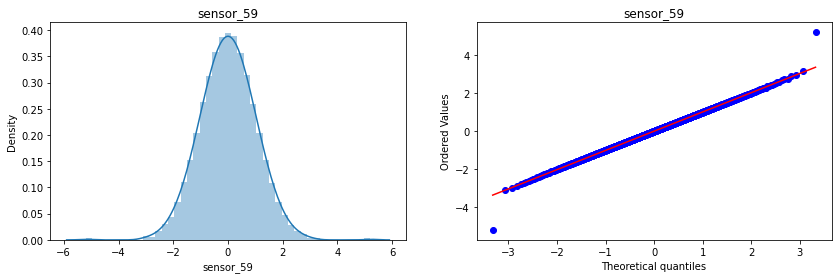

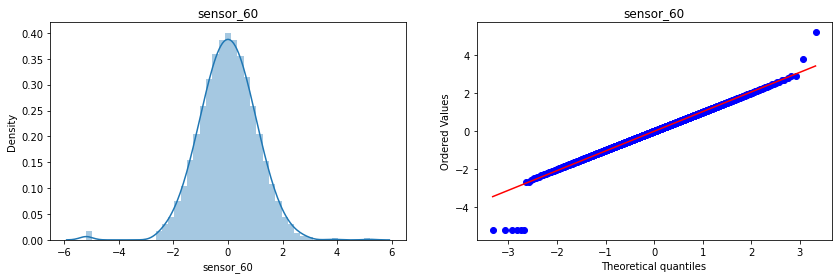

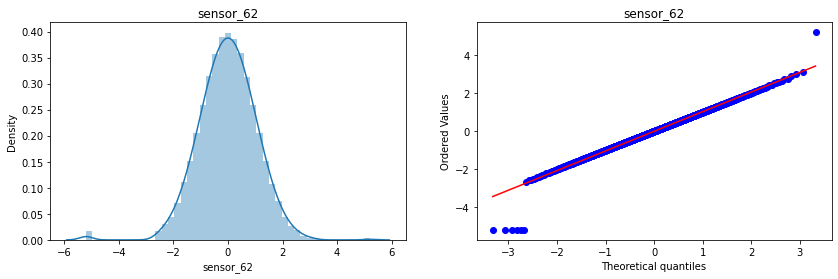

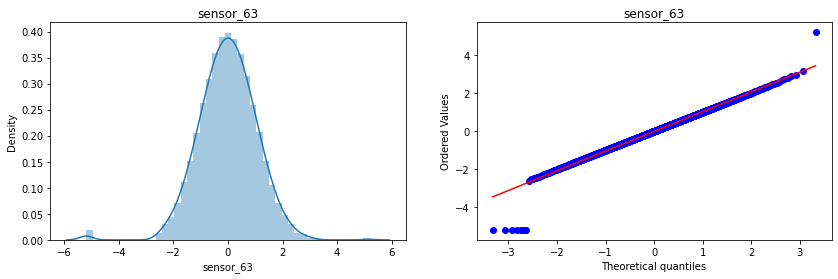

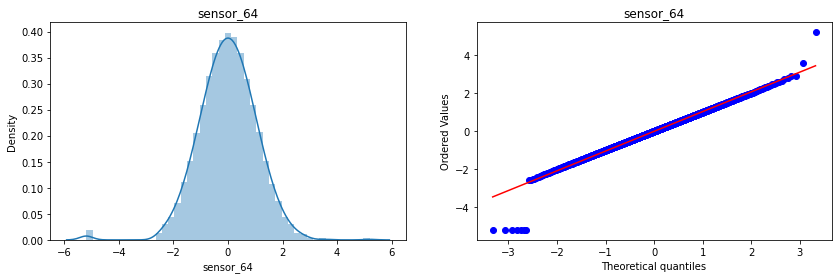

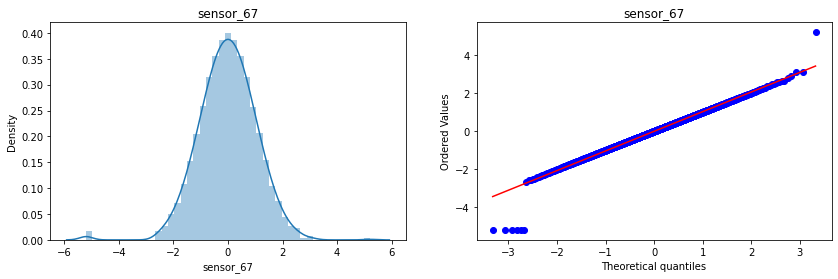

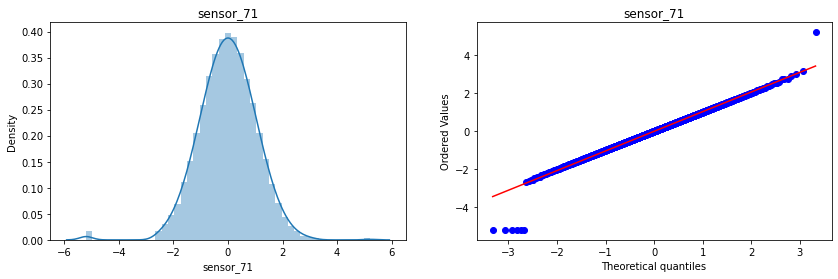

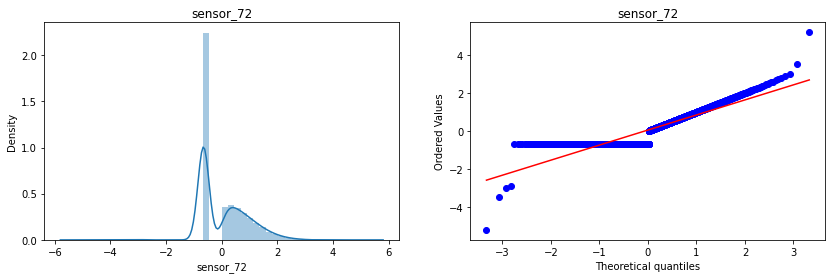

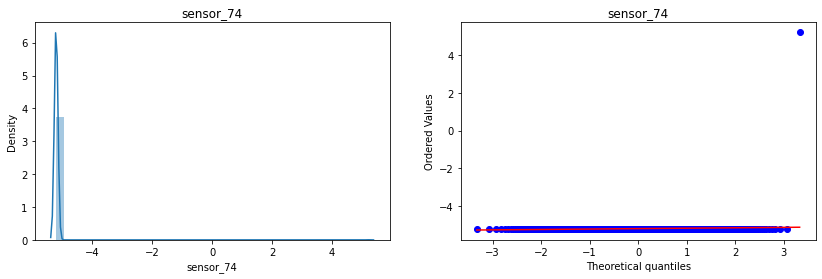

In [ ]:
count=0
for col in df_quant.columns:
  count=count+1
  if count<40: # generate only 40 graph for simplitycy in visualization
      plt.figure(figsize=(14,4))
      plt.subplot(121)
      sns.distplot(df_quant[col])
      plt.title(col)

      plt.subplot(122)
      stats.probplot(df_quant[col], dist="norm", plot=plt)
      plt.title(col)

      plt.show()

**Remark 4:**

1. By emplyoing Quantile transformer we can convert all the feautuers to normally distributed. The distubution can check with Q-Q plot.
2. These Q-Q plots are linear in most of the cases where as the in oproiginal datset it was not the case. So, we can conclude that the transformation is susccfull.
3. However, By emlyoing this technique we need to take care of data leakage as it is not advisible to employ the qualitle trandformation model before spliting data. Here we have applied it onj whole datset just to see and explore effects. but =in reality we will be carefull about this point when tarining the models.
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.quantile_transform.html 
4. However, by performing a rank transformation, it smooths out unusual distributions and is less influenced by outliers than scaling methods. It does, however, distort correlations and distances within and across features.(from Documentation)

# **1.3.2 PowerTransformer :**
 1. By default, zero-mean, unit-variance normalization is applied to the transformed data.

In [ ]:
from sklearn.preprocessing import PowerTransformer

In [ ]:
pt = PowerTransformer(method='yeo-johnson')
tran = pt.fit_transform(sensor)

In [ ]:
df_power = pd.DataFrame(tran,columns=sensor.columns)

In [ ]:
df_power.head()

sensor_0  sensor_1  sensor_2  sensor_3  sensor_4  sensor_8  sensor_9  \
0  0.181651  0.774622 -0.267093  0.110070  0.206643  0.449324  1.125628   
1  0.995931 -0.354052  0.792241  0.223822 -1.139953  0.394047  0.067637   
2 -0.928659  0.725318 -0.297935  0.717373  0.494687 -0.315434  0.369662   
3 -0.312725 -0.194827  0.001198 -1.049781  0.124713  0.276453 -0.753403   
4  0.197434  0.059327  0.870025 -0.075800  0.536539  0.486417 -0.106798   

   sensor_10  sensor_11  sensor_14  ...  sensor_565  sensor_570  sensor_571  \
0  -0.376489  -1.738629  -0.348479  ...   -1.633698    0.220341   -0.107548   
1  -1.618081  -0.290954   0.427200  ...   -1.633698    0.371880    1.439029   
2   0.130123  -0.411378   0.203917  ...    3.046031    0.372945   -0.427718   
3  -0.365678  -0.270562   0.235285  ...    0.632784   -0.186663   -0.442645   
4  -0.788339  -0.843728   0.570047  ...   -1.633698   -0.010627   -0.434443   

   sensor_572  sensor_578  sensor_582  sensor_583  sensor_586  sensor_587  \
0    0.140401   -0.738903    0.057561   -0.606562   -2.172245   -3.497287   
1   -1.644824    0.558748    0.478915    1.587878   -1.035511    0.695669   
2    0.798752    1.859750   -1.200556    0.439739    2.443616    2.273462   
3    0.276176    1.262104   -0.369193   -1.110071    0.004050    0.022035   
4    0.094823   -0.738903   -4.076834    3.164178    0.004050    0.022035   

   sensor_589  
0   -3.140713  
1    1.312256  
2    0.083815  
3   -0.050534  
4   -0.050534  

[5 rows x 194 columns]

Text(0.5, 1.0, 'After Power Transformation')

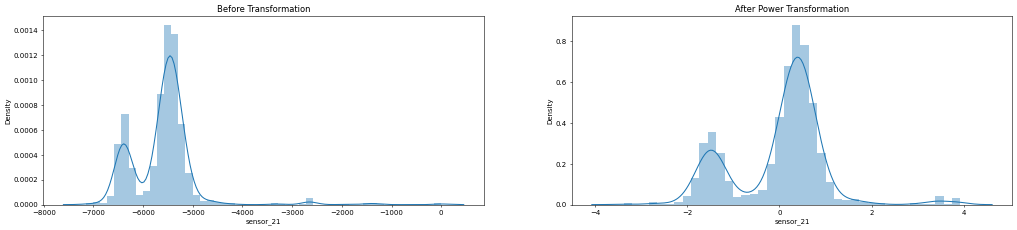

In [ ]:
plt.figure(figsize=(25,5),dpi=50)
plt.subplot(121)
sns.distplot(sensor['sensor_21'])
plt.title('Before Transformation')
plt.subplot(122)
sns.distplot(df_power['sensor_21'])
plt.title('After Power Transformation')

OBS: The original distribution does not change but scaling is changed and 0 centring is done.

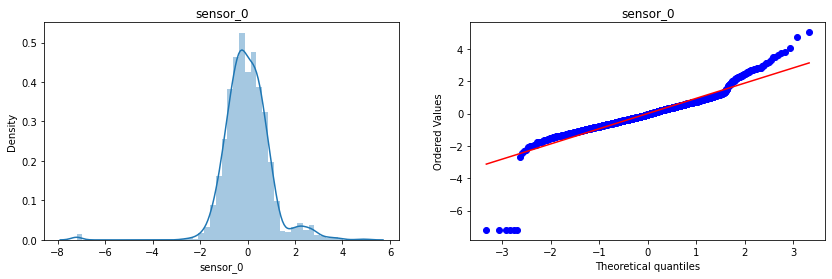

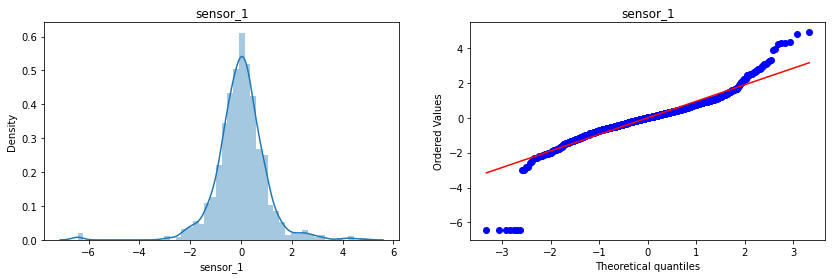

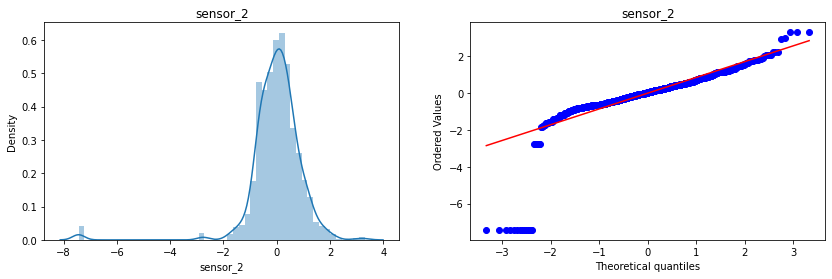

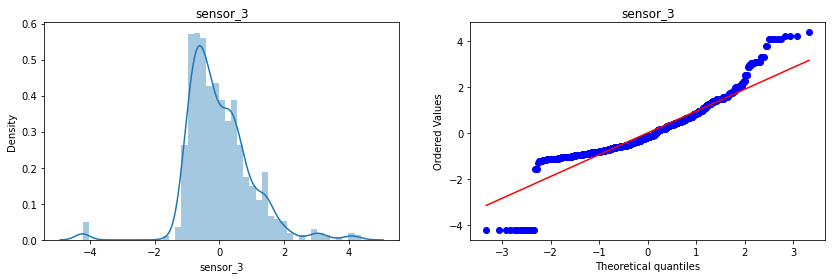

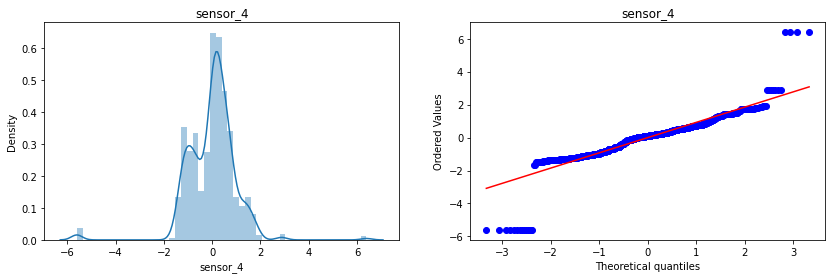

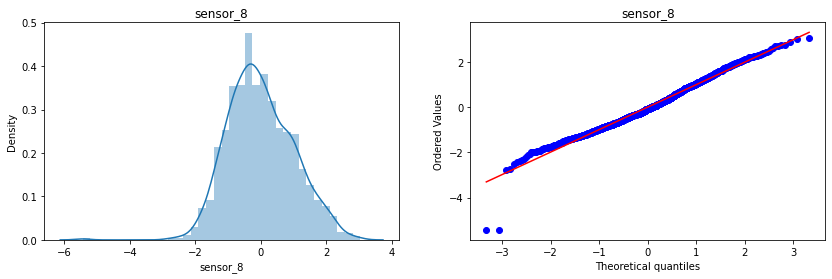

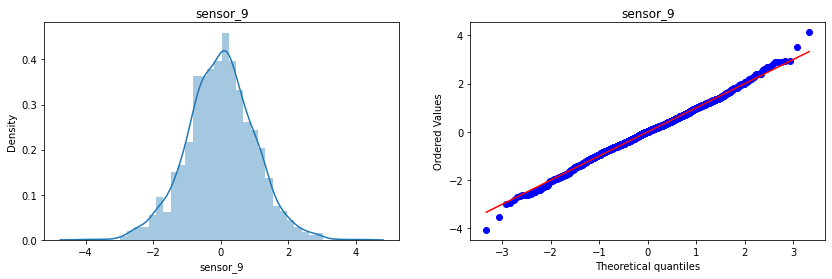

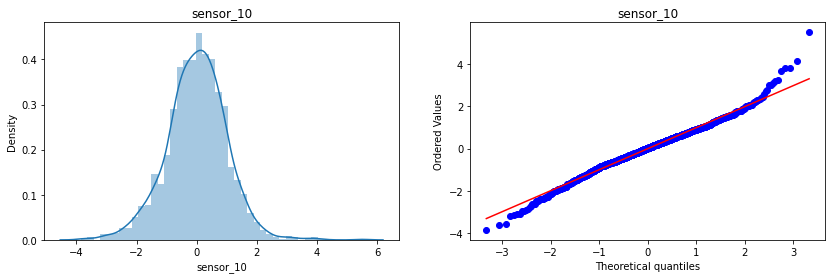

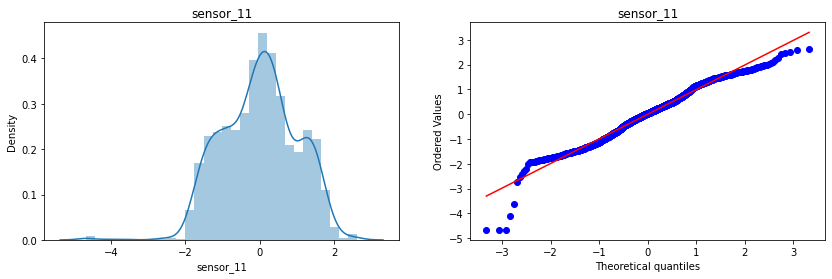

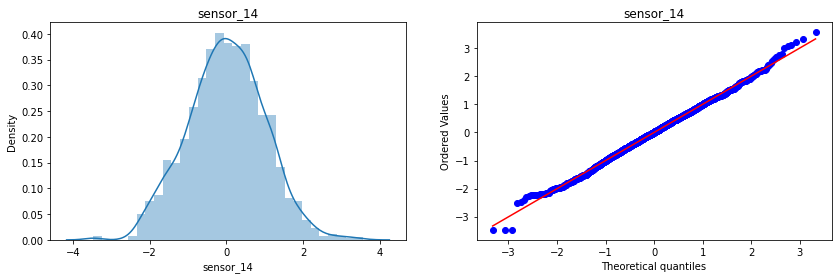

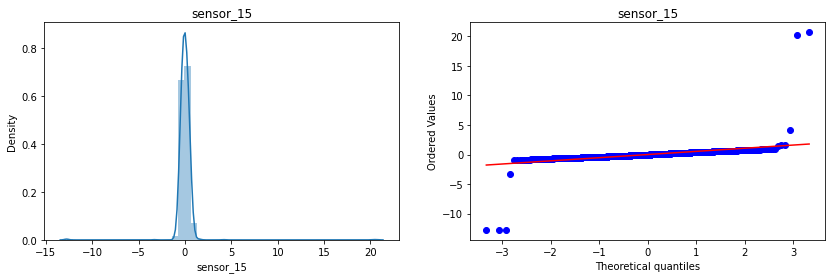

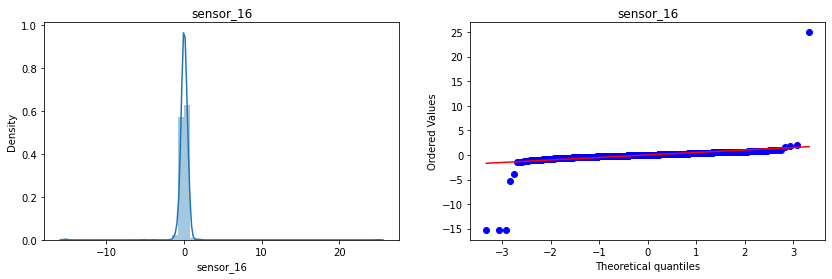

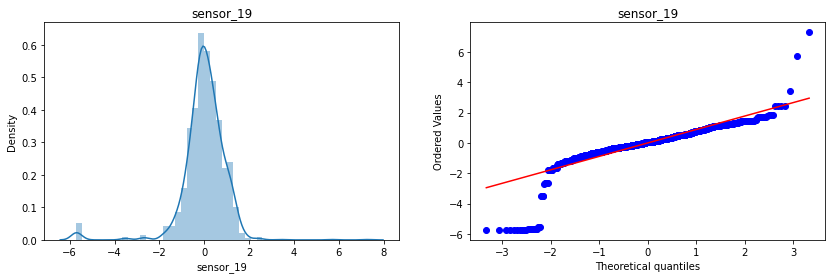

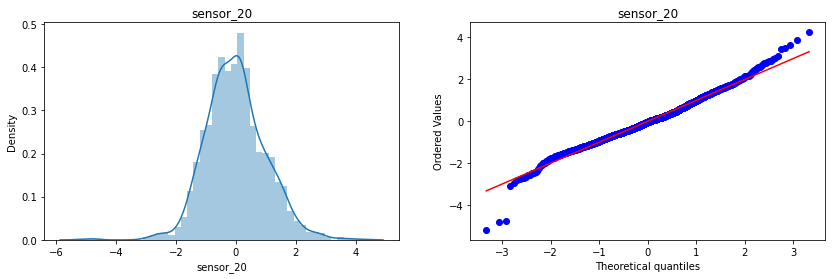

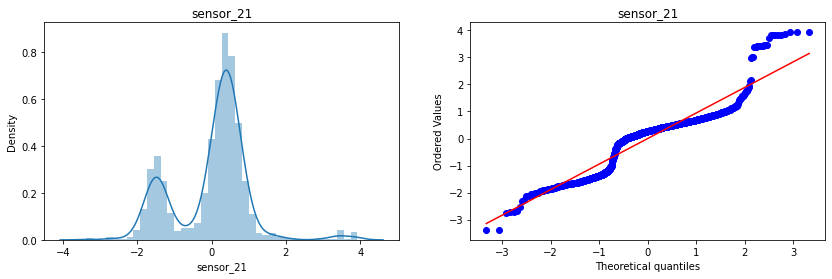

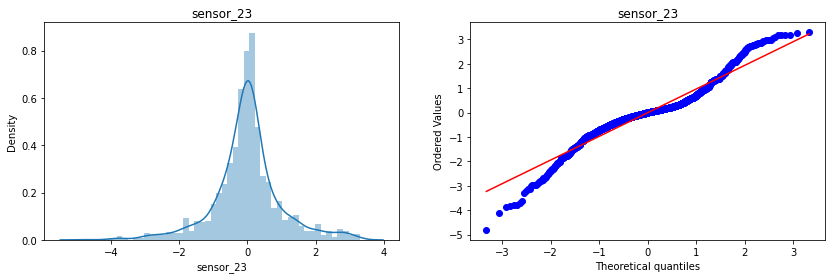

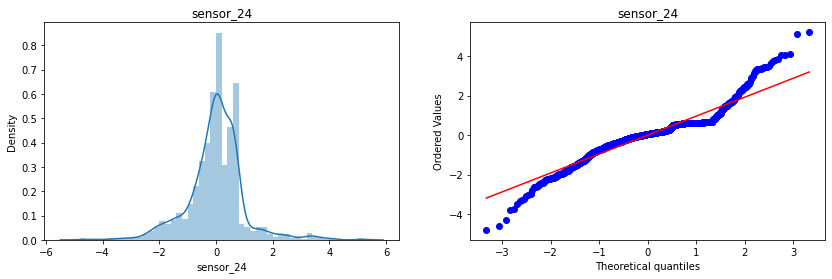

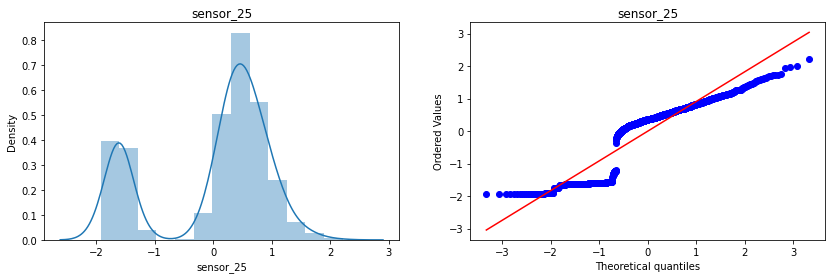

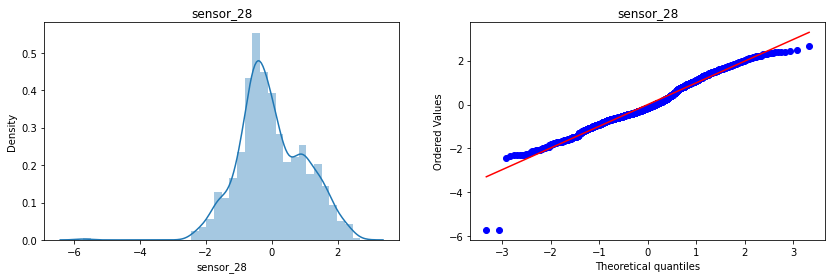

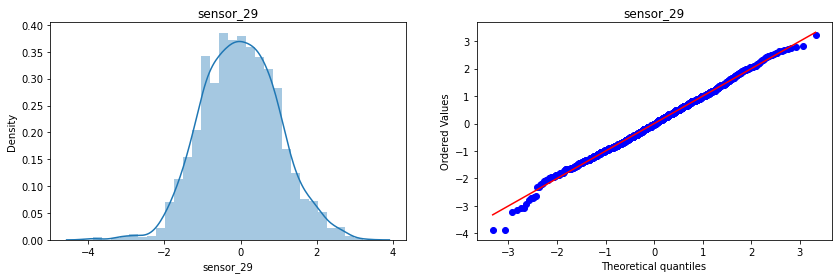

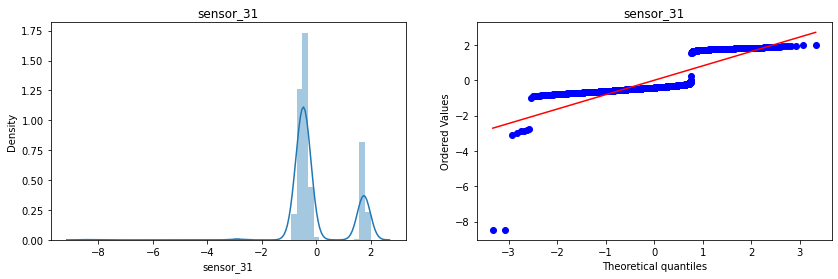

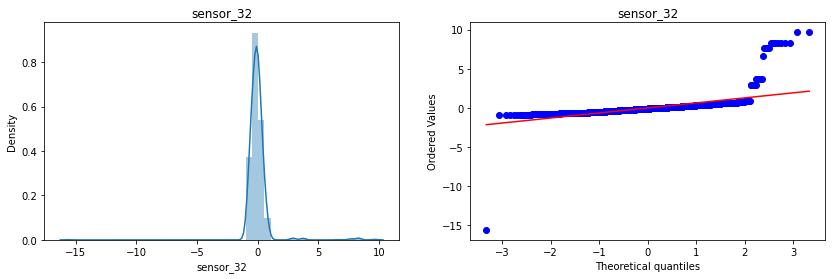

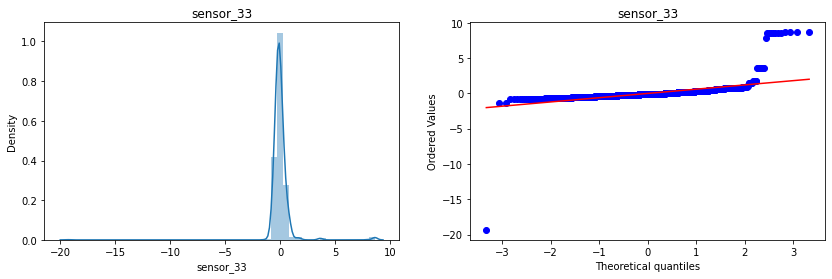

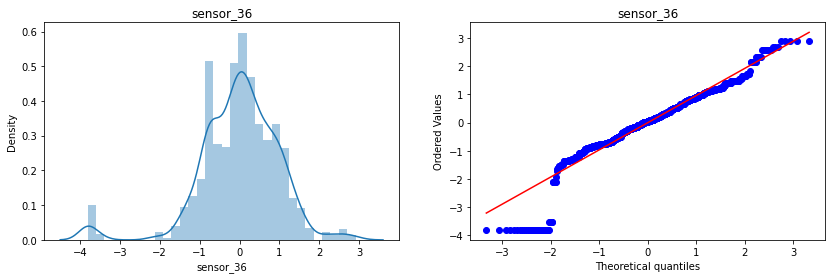

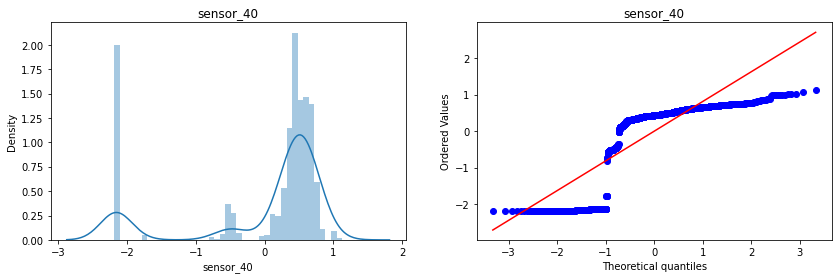

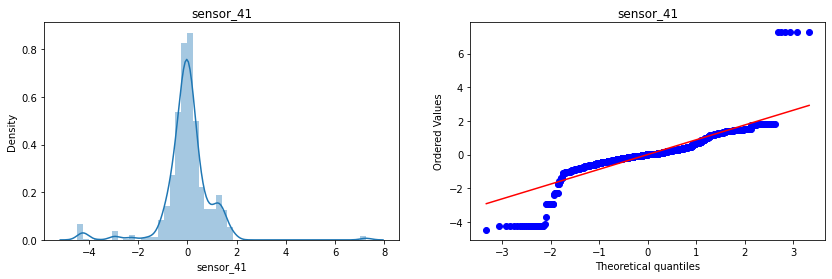

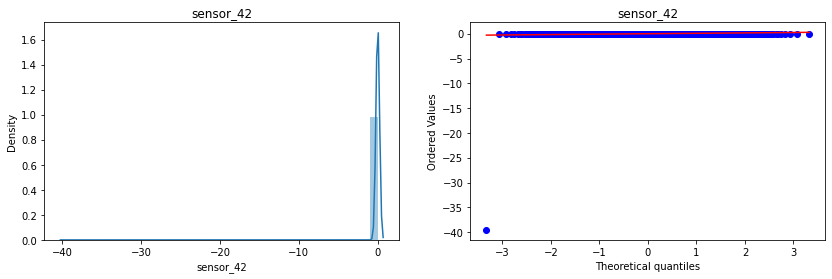

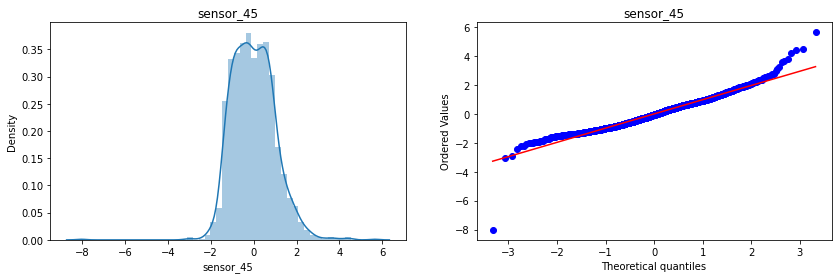

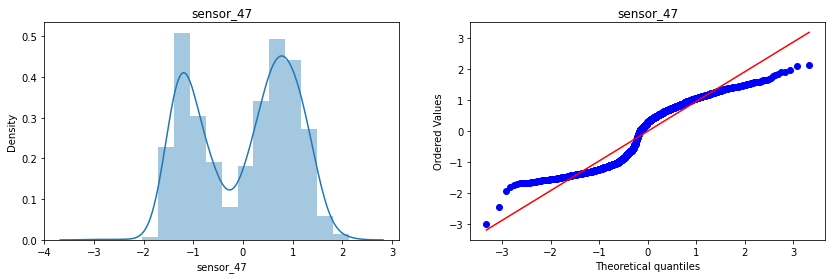

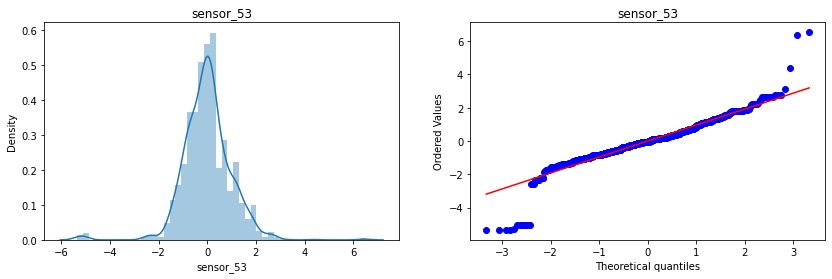

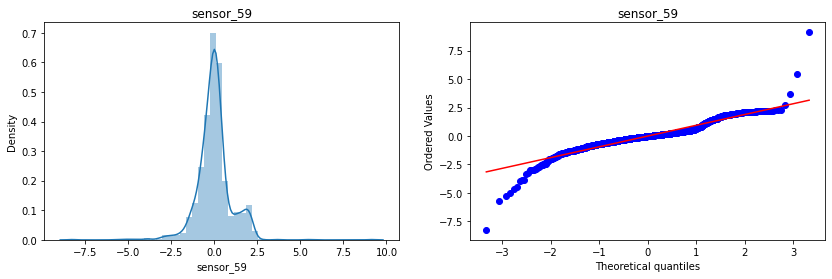

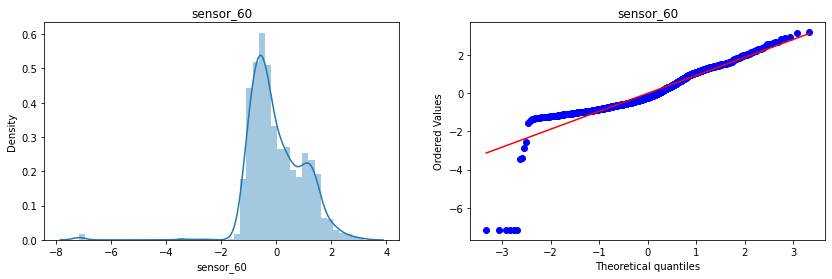

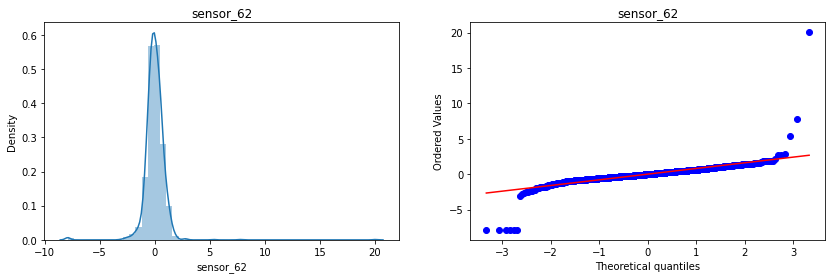

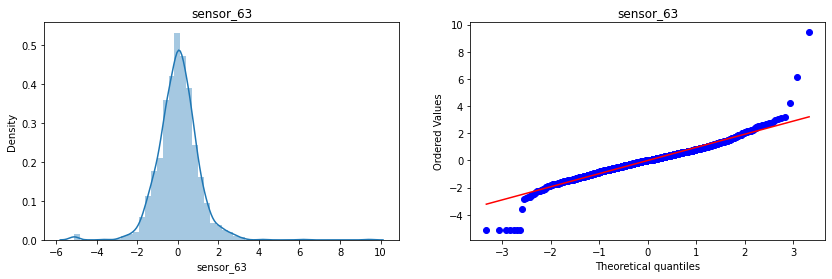

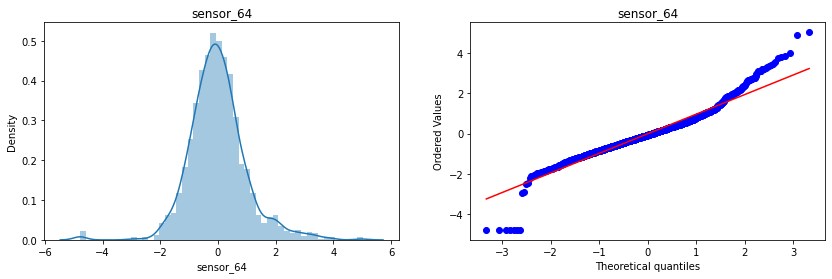

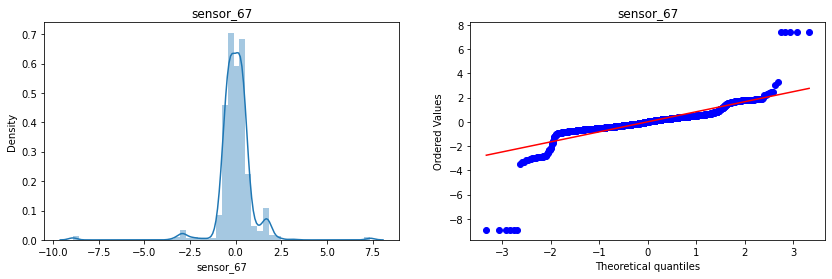

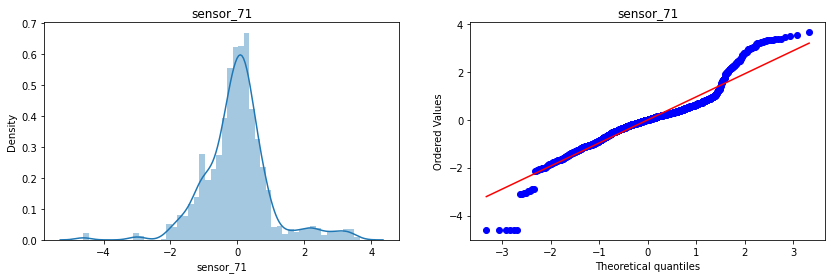

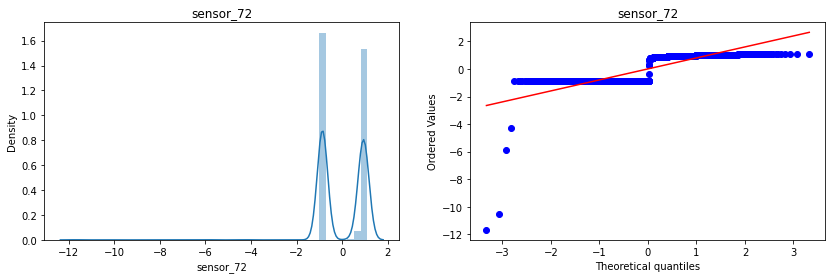

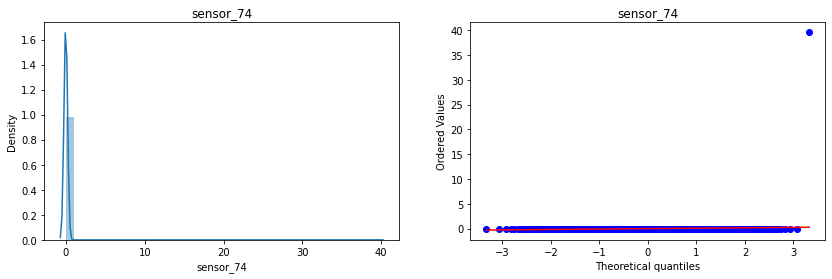

In [ ]:
count=0
for col in df_power.columns:
  count=count+1
  if count <40:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(df_power[col])
    plt.title(col)

    plt.subplot(122)
    stats.probplot(df_power[col], dist="norm", plot=plt)
    plt.title(col)

    plt.show()

1. https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.QuantileTransformer.html 
2. https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html 


**Remark :5**
1.  Power transformers with method Yeo-Johnson is applied to the features. As "Box-Cox requires input data to be strictly positive, while Yeo-Johnson supports both positive or negative data.
2. With this transformation distriubutions does not looks like the normlal as it was in qauntile tranformation. 
3. We can clearly conclude that from power transform QQ plots and original sensor data Q-Q plots, The transformed QQ plots are more linear in nature than the original.So the distributions of the power transform features.


# 3. **PCA For Feature Selections:**

In [ ]:
# find number of features required to capture a given variance (defualt: 95)
def find_pca(data,var=95, verbosity=0):
    var/=100
    for i in range(1,data.shape[1]+1):
        pca = PCA(n_components=i, random_state=42, whiten=True)
        pca_data = pca.fit_transform(data)
        #print(pca.explained_variance_ratio_)
        if np.cumsum(pca.explained_variance_ratio_)[-1] >=var:
            if verbosity == 1:
                evr = np.cumsum(pca.explained_variance_ratio_)
                #print("Overall variances captured: ",evr)
                print('variances: ', pca.explained_variance_ratio_)
                fig = px.area(
                                x=range(1, evr.shape[0] + 1),
                                y=evr,
                                labels={"x": "# Components", "y": "Explained Variance"}
                            )
                fig.show(renderer="colab")
                savefig()

            else:
                print("Overall variances captured: ",np.cumsum(pca.explained_variance_ratio_)[-1])
            break
    return i, pca

In [ ]:
# Find number of features required for capturing 95% variance
p95, _= find_pca(df_std,verbosity=1)
print('Features required: ',p95, '\ni.e. Percentage of features: ',round(p95*100/df_std.shape[1],2),'%')

variances:  [0.04112404 0.02074257 0.0197472  0.01946552 0.01673375 0.01567752
 0.01452615 0.01391817 0.01359155 0.0128492  0.01233976 0.01202822
 0.01168788 0.01138472 0.01124301 0.01092021 0.01062883 0.0104258
 0.01035789 0.01029568 0.01021344 0.0100923  0.00989551 0.00973526
 0.0095665  0.00943842 0.00922338 0.00912626 0.00900614 0.00871727
 0.0086136  0.00846634 0.00842296 0.00829987 0.00820888 0.00817758
 0.00797832 0.00795074 0.00779793 0.00772079 0.00756777 0.00751665
 0.00747107 0.00733193 0.00720813 0.00707532 0.00703407 0.00691339
 0.00685749 0.0067368  0.00667055 0.00661618 0.0064949  0.00647004
 0.00632115 0.00624096 0.00619705 0.00607741 0.00604867 0.00599926
 0.00594317 0.0058963  0.00577778 0.00576252 0.00569612 0.00561519
 0.00557314 0.00548453 0.00539131 0.00533183 0.00527117 0.00524247
 0.00518562 0.00512372 0.00510421 0.00506956 0.00501813 0.00497503
 0.00489081 0.00487431 0.00478088 0.00474895 0.00471142 0.00468176
 0.00465537 0.00458693 0.0045513  0.00448766 0.0044

Features required:  151 
i.e. Percentage of features:  77.84 %


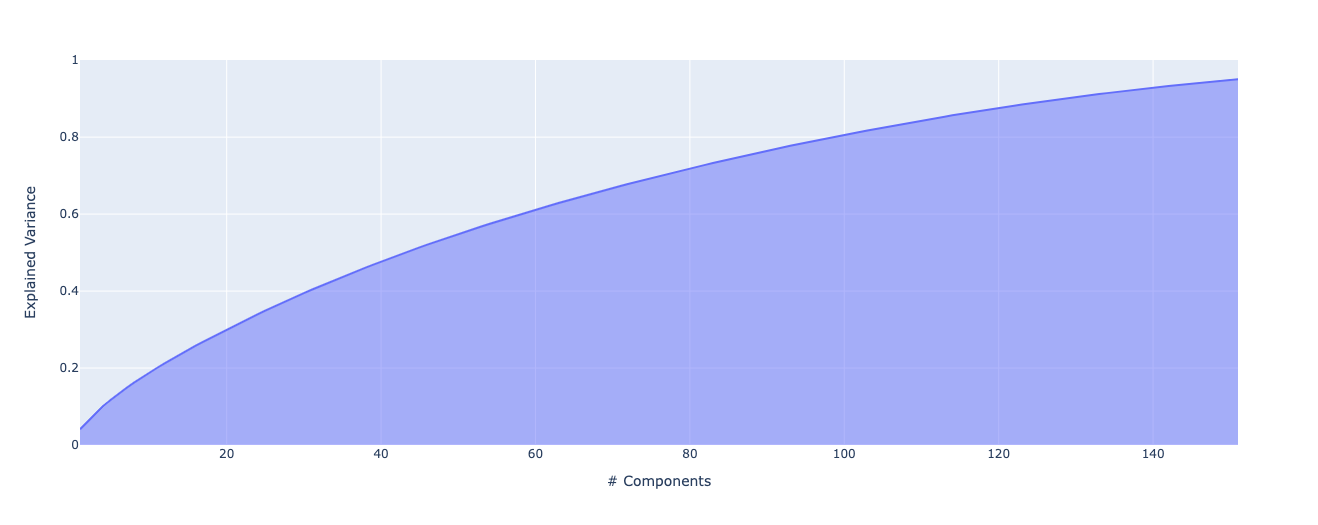

**Remark 6**: 
1. After employing PCA to original dataset, we have found that we can explained the 95% variance  with the help of 151 features out of 194 features.


# **Summary:**

1. All the features are numeric real values with varid distributions and skewness.
2. We have use min max (0-1) normilization, for the fetures to reduce the  scale difference.
3. We have also employed the standard scalar in the dataset,as htere were very different distibution in each of these features. To explore then with zero centring and standarded devuition scales bring them with the scal for best visulization.
3. We have use Q-Q plot to check the normality of features. It is obsereved that not many feature behaves normal, we have to use transoformation (Quantile and Power with Yeo-Johnson method) to convert these highly skewed features to normal. 
4. PCA shows that we can reduce to 151 features out of 194 to capsture 95% variance for the modeling. However, We need to check and conform with the performance of models we are going to train.



Models: XGbooSt

### Preparing dataset:

In [19]:
data.head()

sensor_0  sensor_1   sensor_2   sensor_3  sensor_4  sensor_8  sensor_9  \
0   3030.93   2564.00  2187.7333  1411.1265    1.3602    1.5005    0.0162   
1   3095.78   2465.14  2230.4222  1463.6606    0.8294    1.4966   -0.0005   
2   2932.61   2559.94  2186.4111  1698.0172    1.5102    1.4436    0.0041   
3   2988.72   2479.90  2199.0333   909.7926    1.3204    1.4882   -0.0124   
4   3032.24   2502.87  2233.3667  1326.5200    1.5334    1.5031   -0.0031   

   sensor_10  sensor_11  sensor_14  ...  sensor_570  sensor_571  sensor_572  \
0    -0.0034     0.9455     7.9558  ...    533.8500      2.1113        8.95   
1    -0.0148     0.9627    10.1548  ...    535.0164      2.4335        5.92   
2     0.0013     0.9615     9.5157  ...    535.0245      2.0293       11.21   
3    -0.0033     0.9629     9.6052  ...    530.5682      2.0253        9.33   
4    -0.0072     0.9569    10.5661  ...    532.0155      2.0275        8.83   

   sensor_578  sensor_582  sensor_583  sensor_586  sensor_587  sensor_589  \
0      0.0000      0.5005      0.0118      0.0000      0.0000      0.0000   
1      0.0096      0.5019      0.0223      0.0096      0.0201    208.2045   
2      0.0584      0.4958      0.0157      0.0584      0.0484     82.8602   
3      0.0202      0.4990      0.0103      0.0202      0.0149     73.8432   
4      0.0000      0.4800      0.4766      0.0202      0.0149     73.8432   

   Pass_Fail  
0          1  
1          1  
2          0  
3          1  
4          1  

[5 rows x 195 columns]

In [21]:
y=data['Pass_Fail']

In [25]:
X=data.drop(['Pass_Fail'],axis=1)

In [26]:
X.head()

sensor_0  sensor_1   sensor_2   sensor_3  sensor_4  sensor_8  sensor_9  \
0   3030.93   2564.00  2187.7333  1411.1265    1.3602    1.5005    0.0162   
1   3095.78   2465.14  2230.4222  1463.6606    0.8294    1.4966   -0.0005   
2   2932.61   2559.94  2186.4111  1698.0172    1.5102    1.4436    0.0041   
3   2988.72   2479.90  2199.0333   909.7926    1.3204    1.4882   -0.0124   
4   3032.24   2502.87  2233.3667  1326.5200    1.5334    1.5031   -0.0031   

   sensor_10  sensor_11  sensor_14  ...  sensor_565  sensor_570  sensor_571  \
0    -0.0034     0.9455     7.9558  ...      0.0000    533.8500      2.1113   
1    -0.0148     0.9627    10.1548  ...      0.0000    535.0164      2.4335   
2     0.0013     0.9615     9.5157  ...      0.6219    535.0245      2.0293   
3    -0.0033     0.9629     9.6052  ...      0.1630    530.5682      2.0253   
4    -0.0072     0.9569    10.5661  ...      0.0000    532.0155      2.0275   

   sensor_572  sensor_578  sensor_582  sensor_583  sensor_586  sensor_587  \
0        8.95      0.0000      0.5005      0.0118      0.0000      0.0000   
1        5.92      0.0096      0.5019      0.0223      0.0096      0.0201   
2       11.21      0.0584      0.4958      0.0157      0.0584      0.0484   
3        9.33      0.0202      0.4990      0.0103      0.0202      0.0149   
4        8.83      0.0000      0.4800      0.4766      0.0202      0.0149   

   sensor_589  
0      0.0000  
1    208.2045  
2     82.8602  
3     73.8432  
4     73.8432  

[5 rows x 194 columns]

In [33]:
X_train , X_test , y_train , y_test = train_test_split(X, y, random_state = 42 , test_size = 0.2, stratify = y )

In [34]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1253, 194), (314, 194), (1253,), (314,))

## SMOTE imbalanced data

In [35]:
oversample = SMOTE()
X_train_smote, y_train_smote = oversample.fit_resample(X_train, y_train)

In [36]:
X_train_smote.shape , y_train_smote.shape

((2340, 194), (2340,))

Counter({1: 1170, 0: 1170})


##  XgBoost on without SMOTE: 

In [40]:
clf_xbg = XGBClassifier( seed = 42 , objective = 'binary:logistic', missing = 0)

In [42]:
clf_xbg.fit( X_train, y_train,
            verbose = True,
            early_stopping_rounds = 10,
            eval_metric = 'error',  
            eval_set = [(X_test, y_test)])

[0]	validation_0-error:0.09873
[1]	validation_0-error:0.06688
[2]	validation_0-error:0.07325
[3]	validation_0-error:0.07006
[4]	validation_0-error:0.07325
[5]	validation_0-error:0.07325
[6]	validation_0-error:0.07006
[7]	validation_0-error:0.06369
[8]	validation_0-error:0.07006
[9]	validation_0-error:0.07006
[10]	validation_0-error:0.07006
[11]	validation_0-error:0.07006
[12]	validation_0-error:0.07006
[13]	validation_0-error:0.07006
[14]	validation_0-error:0.07006
[15]	validation_0-error:0.07006
[16]	validation_0-error:0.07006
[17]	validation_0-error:0.06688


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=0, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [43]:
unique_elements, counts_elements = np.unique(y_test, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the said array:
[[  0   1]
 [ 21 293]]


In [50]:
from sklearn.metrics import ConfusionMatrixDisplay


In [51]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

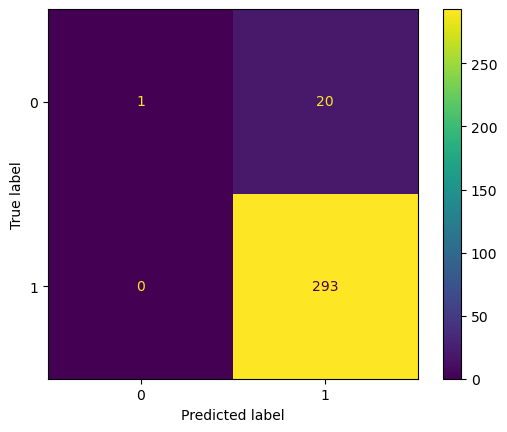

In [56]:
predictions = clf_xbg.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf_xbg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                           display_labels=clf_xbg.classes_)
disp.plot()

plt.show()

In [57]:
y_prediction = clf_xbg.predict(X_test)

In [58]:
print("Accuracy of XGBoost :- ", clf_xbg.score(X_test,y_test)*100)

Accuracy of XGBoost :-  93.63057324840764


# Hyperparameter Tunning

In [63]:
param_grid = {
    'max_depth' : [2,3],
    'learning_rate' : [ 0.05, 0.1],
    'gamma' : [0, 0.25],
    'reg_lambda' : [0, 0.25],
    'scale_pos_weight' : [1, 3]
}

In [64]:
optimal_params = GridSearchCV(
    estimator = XGBClassifier(objective = 'binary:logistic',
                                  seed = 42,
                                  subsample = 0.9,
                                  colsample_bytree = 0.5),
                              param_grid = param_grid,
                              scoring = 'max_error',
                              verbose = 0,
                              n_jobs = 10,
                              cv = 3
)

In [65]:
optimal_params.fit(X_train,
                   y_train,
                   early_stopping_rounds = 25,
                   eval_set = [(X_test,y_test)],
                   verbose = True
                   )

[0]	validation_0-logloss:0.65644
[1]	validation_0-logloss:0.62250
[2]	validation_0-logloss:0.59166
[3]	validation_0-logloss:0.56364
[4]	validation_0-logloss:0.53827
[5]	validation_0-logloss:0.51539
[6]	validation_0-logloss:0.49424
[7]	validation_0-logloss:0.47454
[8]	validation_0-logloss:0.45697
[9]	validation_0-logloss:0.44030
[10]	validation_0-logloss:0.42501
[11]	validation_0-logloss:0.41021
[12]	validation_0-logloss:0.39705
[13]	validation_0-logloss:0.38465
[14]	validation_0-logloss:0.37324
[15]	validation_0-logloss:0.36273
[16]	validation_0-logloss:0.35324
[17]	validation_0-logloss:0.34400
[18]	validation_0-logloss:0.33547
[19]	validation_0-logloss:0.32785
[20]	validation_0-logloss:0.32043
[21]	validation_0-logloss:0.31348
[22]	validation_0-logloss:0.30718
[23]	validation_0-logloss:0.30143
[24]	validation_0-logloss:0.29624
[25]	validation_0-logloss:0.29117
[26]	validation_0-logloss:0.28691
[27]	validation_0-logloss:0.28254
[28]	validation_0-logloss:0.27883
[29]	validation_0-loglos

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.5,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, m...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=10,
             param_grid={'gamma': [0, 0.25], 'learning_rate': [0.05, 0.1],
                         'max_depth': [2, 3], 'reg_lambda': [0, 0.25],
                         'scale_pos_weight': [1, 3]},
             scoring='max_error')

In [66]:
print(optimal_params.best_params_)

{'gamma': 0, 'learning_rate': 0.05, 'max_depth': 2, 'reg_lambda': 0, 'scale_pos_weight': 1}


In [67]:
clf_xbg =XGBClassifier( seed = 42,
                            objective = 'binary:logistic',
                            gamma = 0,
                            learning_rate = 0.05,
                            max_depth = 2,
                            reg_lambda = 0,
                            scale_pos_weight = 1,
                            subsample = 0.9,
                            colsample_bytree = 0.5)

In [68]:
clf_xbg.fit(X_train, y_train,
            verbose = True,
            early_stopping_rounds = 5,
            eval_metric = 'error',
            eval_set = [(X_test,y_test)])

[0]	validation_0-error:0.08280
[1]	validation_0-error:0.06688
[2]	validation_0-error:0.06688
[3]	validation_0-error:0.06688
[4]	validation_0-error:0.06688
[5]	validation_0-error:0.06688
[6]	validation_0-error:0.06688


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

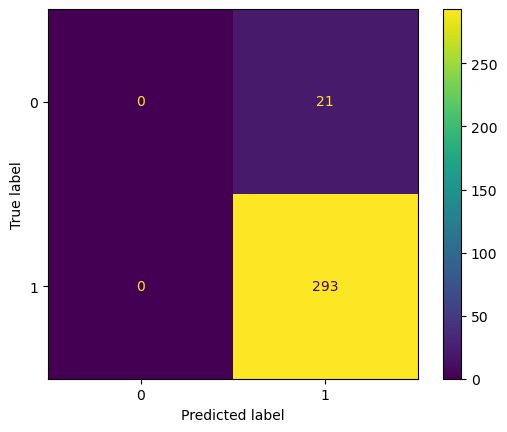

In [69]:
predictions = clf_xbg.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf_xbg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                           display_labels=clf_xbg.classes_)
disp.plot()

plt.show()

In [70]:
y_prediction = clf_xbg.predict(X_test)
print("Accuracy of XGBoost :- ", clf_xbg.score(X_test,y_test)*100)

Accuracy of XGBoost :-  93.31210191082803


In [80]:
from sklearn.metrics import recall_score,precision_score,f1_score

In [81]:
recall_score(y_true = y_test, y_pred = y_prediction)

1.0

In [82]:
precision_score(y_true = y_test, y_pred = y_prediction)

0.9331210191082803

In [83]:
f1_score(y_true = y_test, y_pred = y_prediction)

0.9654036243822076

# XGboost on SMOTE dataset:

In [84]:
oversample = SMOTE()
X_train_smote, y_train_smote = oversample.fit_resample(X_train, y_train)

In [85]:
X_train_smote.shape , y_train_smote.shape

((2340, 194), (2340,))

In [86]:
counter = Counter(y_train_smote)
print(counter)

Counter({1: 1170, 0: 1170})


In [87]:
clf_xbg_smote = XGBClassifier( seed = 42 , objective = 'binary:logistic', missing = 0)

In [88]:
clf_xbg_smote.fit( X_train_smote, y_train_smote,
            verbose = True,
            early_stopping_rounds = 5,
            eval_metric = 'error',  
            eval_set = [(X_test, y_test)])

[0]	validation_0-error:0.13057
[1]	validation_0-error:0.10828
[2]	validation_0-error:0.11146
[3]	validation_0-error:0.10191
[4]	validation_0-error:0.09236
[5]	validation_0-error:0.08917
[6]	validation_0-error:0.08917
[7]	validation_0-error:0.08599
[8]	validation_0-error:0.08599
[9]	validation_0-error:0.08280
[10]	validation_0-error:0.08599
[11]	validation_0-error:0.07643
[12]	validation_0-error:0.07962
[13]	validation_0-error:0.07962
[14]	validation_0-error:0.07643
[15]	validation_0-error:0.08599


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=0, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [89]:
unique_elements, counts_elements = np.unique(y_test, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the said array:
[[  0   1]
 [ 21 293]]


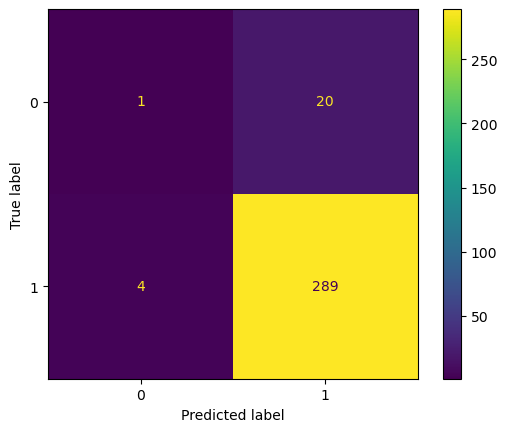

In [90]:
predictions = clf_xbg_smote.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf_xbg_smote.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                           display_labels=clf_xbg_smote.classes_)
disp.plot()

plt.show()

In [91]:
print("Accuracy of XGBoost :- ", clf_xbg_smote.score(X_test,y_test)*100)

Accuracy of XGBoost :-  92.35668789808918


# Hyperparameter tunning for SMOTE

In [92]:
param_grid = {
    'max_depth' : [2,3],
    'learning_rate' : [ 0.05, 0.1],
    'gamma' : [0, 0.25],
    'reg_lambda' : [0, 0.25],
    'scale_pos_weight' : [1, 3]
}

In [93]:
optimal_params = GridSearchCV( estimator = XGBClassifier(objective = 'binary:logistic',
                                  seed = 42,
                                  subsample = 0.9,
                                  colsample_bytree = 0.5),
                              param_grid = param_grid,
                              scoring = 'max_error',
                              verbose = 0,
                              n_jobs = 10,
                              cv = 3)

In [94]:
optimal_params.fit(X_train_smote,
                   y_train_smote,
                   early_stopping_rounds = 25,
                   eval_set = [(X_test,y_test)],
                   verbose = True
                   )

[0]	validation_0-logloss:0.67861
[1]	validation_0-logloss:0.66557
[2]	validation_0-logloss:0.65392
[3]	validation_0-logloss:0.64294
[4]	validation_0-logloss:0.63068
[5]	validation_0-logloss:0.61820
[6]	validation_0-logloss:0.60975
[7]	validation_0-logloss:0.59834
[8]	validation_0-logloss:0.58781
[9]	validation_0-logloss:0.57849
[10]	validation_0-logloss:0.56921
[11]	validation_0-logloss:0.56207
[12]	validation_0-logloss:0.55603
[13]	validation_0-logloss:0.54952
[14]	validation_0-logloss:0.54361
[15]	validation_0-logloss:0.53475
[16]	validation_0-logloss:0.52893
[17]	validation_0-logloss:0.52170
[18]	validation_0-logloss:0.51603
[19]	validation_0-logloss:0.51233
[20]	validation_0-logloss:0.50815
[21]	validation_0-logloss:0.50232
[22]	validation_0-logloss:0.49720
[23]	validation_0-logloss:0.49372
[24]	validation_0-logloss:0.48979
[25]	validation_0-logloss:0.48575
[26]	validation_0-logloss:0.48145
[27]	validation_0-logloss:0.47762
[28]	validation_0-logloss:0.47339
[29]	validation_0-loglos

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.5,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, m...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=10,
             param_grid={'gamma': [0, 0.25], 'learning_rate': [0.05, 0.1],
                         'max_depth': [2, 3], 'reg_lambda': [0, 0.25],
                         'scale_pos_weight': [1, 3]},
             scoring='max_error')

In [95]:
print(optimal_params.best_params_)

{'gamma': 0, 'learning_rate': 0.05, 'max_depth': 2, 'reg_lambda': 0, 'scale_pos_weight': 1}


In [98]:
clf_xbg_smote_optimal = XGBClassifier( seed = 42,
                            objective = 'binary:logistic',
                            gamma = 0,
                            learning_rate = 0.05,
                            max_depth = 2,
                            reg_lambda = 0,
                            scale_pos_weight = 1,
                            subsample = 0.9,
                            colsample_bytree = 0.5)

In [99]:
clf_xbg_smote_optimal.fit(X_train_smote, y_train_smote,
            verbose = True,
            early_stopping_rounds = 5,
            eval_metric = 'error',
            eval_set = [(X_test,y_test)])

[0]	validation_0-error:0.21975
[1]	validation_0-error:0.26752
[2]	validation_0-error:0.25159
[3]	validation_0-error:0.27389
[4]	validation_0-error:0.23567
[5]	validation_0-error:0.20064
[6]	validation_0-error:0.17834
[7]	validation_0-error:0.17197
[8]	validation_0-error:0.16561
[9]	validation_0-error:0.15287
[10]	validation_0-error:0.14968
[11]	validation_0-error:0.15287
[12]	validation_0-error:0.15924
[13]	validation_0-error:0.15605
[14]	validation_0-error:0.15924
[15]	validation_0-error:0.16561


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

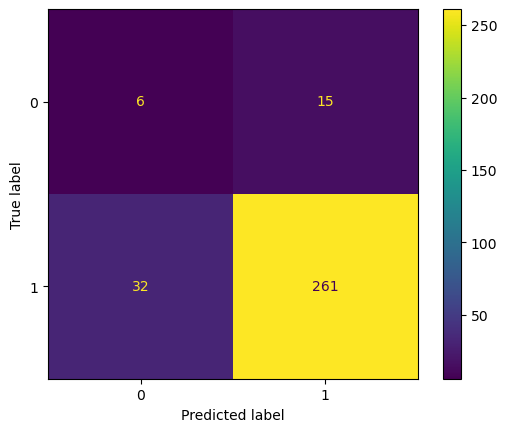

In [100]:
predictions = clf_xbg_smote_optimal.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf_xbg_smote.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                           display_labels=clf_xbg_smote.classes_)
disp.plot()

plt.show()

In [115]:

print("Accuracy of XGBoost :- ", clf_xbg_smote_optimal.score(X_test,y_test)*100)

Accuracy of XGBoost :-  85.03184713375796


In [116]:
y_prediction = clf_xbg_smote_optimal.predict(X_test)
recall_score(y_true = y_test, y_pred = y_prediction)

0.8907849829351536

In [117]:
precision_score(y_true = y_test, y_pred = y_prediction)

0.9456521739130435

In [118]:
f1_score(y_true = y_test, y_pred = y_prediction)

0.9173989455184534